# **Problem Statement**
In an increasingly dynamic financial landscape, XYZ Financial Services, a leading commercial bank, faces the critical challenge of accurately predicting credit risk. The goal of this project is to develop a predictive model that estimates the probability of credit default based on credit card owners' characteristics, such as age, gender, education, marital status, credit limit, and payment history. By accurately predicting default probabilities, XYZ Financial Services can make informed lending decisions, optimize risk management strategies, and enhance financial stability.

## **Dataset Information**
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

- **Dataset Name and Source**
    - **Name:** UCI_Credit_Card.csv
    - **Source:** This dataset is originally from the UCI Machine Learning Repository. ([Dataset source link](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset))
    - **Number of Instances (Rows):** 30,000
    - **Number of Attributes (Columns):** 25

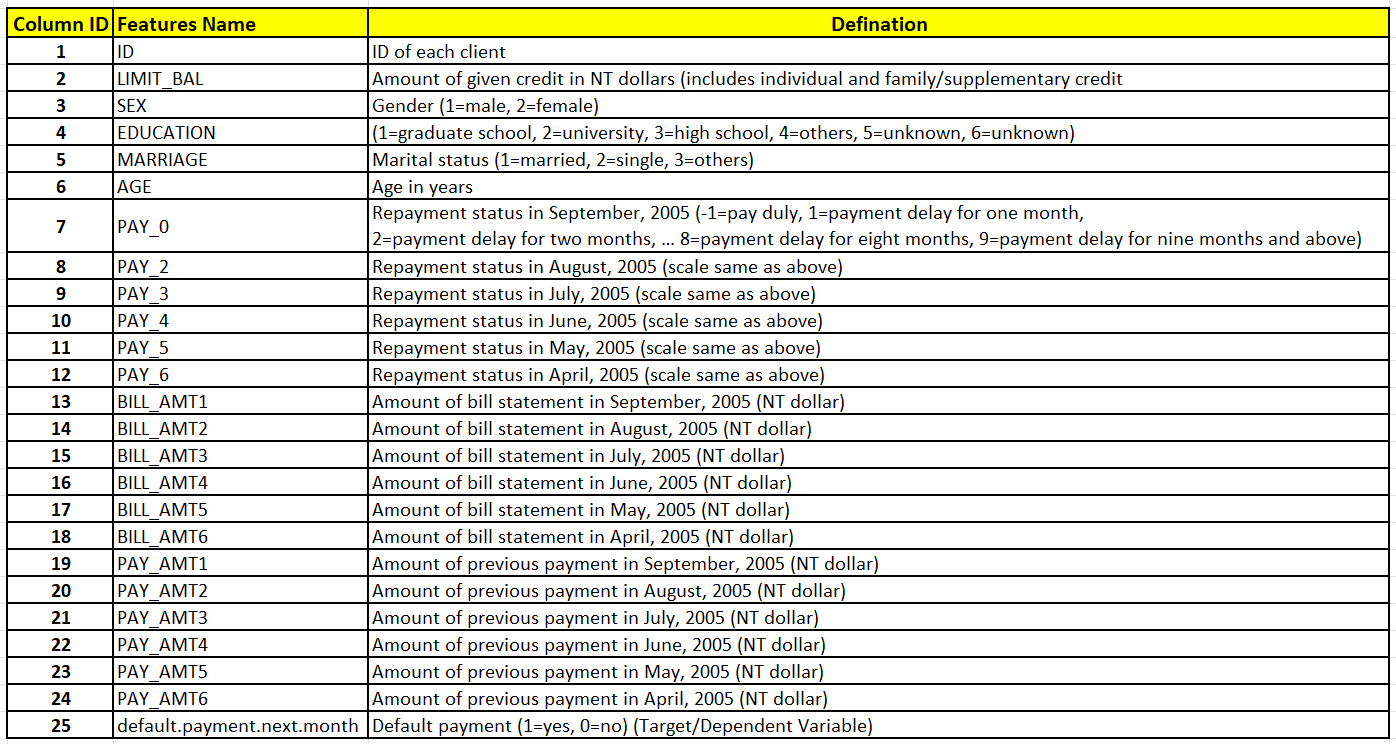

In [1]:
# Displaying all features information
import os
from IPython.display import Image

data_dir = "datasets"
image_path = os.path.join(data_dir, "Dataset Information.png")
Image(filename=image_path)

## **Target Variable**
- **default.payment.next.month**: A binary variable indicating whether a credit card owner will default on their payment in the next month (1 = default, 0 = no default), as provided in the UCI Credit Card dataset.

## **Requirements**
- **Binary Classification**: The model should classify credit card clients into two categories: those who will default on their payment in the next month and those who will not.
- **Performance Metrics**: The model's performance should be evaluated using appropriate metrics for binary classification, such as Accuracy, Precision, Recall, F1-Score, ROC-AUC, and Confusion Matrix, to ensure a comprehensive understanding of its effectiveness in identifying defaults while minimizing false negatives.
- **Business Goal**: The predictions should enable XYZ Financial Services to identify high-risk credit clients and tailor risk mitigation strategies, such as adjusting credit limits or offering targeted financial counseling, to reduce default rates and improve portfolio health.

In [2]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# **1. Understanding the Data**
In this section, we will load the dataset and explore its structure to understand the features and target

## **1.1 Loading the Dataset**

In [3]:
# Defining the path to the datasets folder
dataset_path = os.path.join(data_dir, "UCI_Credit_Card.csv")

# Loading the CSV file into a DataFrame
df = pd.read_csv(dataset_path)

# Displaying the first few rows to confirm loading
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

## **1.2 Inspecting Dataset**

In [4]:
# Checking the number of rows and columns
df.shape

(30000, 25)

- The dataset is correctly loaded and contains 30,000 rows and 25 columns which exactly matches the expected dimensions given in the dataset information.

In [5]:
# Checking column names
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

- All the column names are displayed correctly, and they match the expected names from the dataset information.

In [6]:
# Checking summary of data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

- All the columns have 30,000 non-null values, indicating that there are no missing values in the dataset.
- All columns have the correct data types, with 13 float64 columns, 12 int64 columns, which is consistent with the expected data types for the given attributes.

In [7]:
# Checking for duplicate rows
df.duplicated().sum()

np.int64(0)

- There are no duplicate rows in the dataset as we have `ID` column which is unique for each row.

## **Key observations from Dataset**
Based on the dataset and inspected structure:

The dataset contains `30000 credit card clients` with `25 attributes`, including demographic information, credit history, and payment behavior. The target variable is `default.payment.next.month`, indicating whether a client will default on their payment in the next month (1 = default, 0 = no default). The dataset has `no missing values` or `duplicate rows`, and all columns have the `correct data types`.

# **2. Understanding Variables**

In [8]:
# Renaming Columns names for clarity and consistency
column_renames = {
    'ID': 'ID',
    'LIMIT_BAL': 'Credit_Limit',
    'SEX': 'Gender',
    'EDUCATION': 'Education_Level',
    'MARRIAGE': 'Marital_Status',
    'AGE': 'Age',
    'PAY_0': 'Sept_Pay',
    'PAY_2': 'Aug_Pay',
    'PAY_3': 'July_Pay',
    'PAY_4': 'June_Pay',
    'PAY_5': 'May_Pay',
    'PAY_6': 'Apr_Pay',
    'BILL_AMT1': 'Sept_Bill_Amt',
    'BILL_AMT2': 'Aug_Bill_Amt',
    'BILL_AMT3': 'July_Bill_Amt',
    'BILL_AMT4': 'June_Bill_Amt',
    'BILL_AMT5': 'May_Bill_Amt',
    'BILL_AMT6': 'Apr_Bill_Amt',
    'PAY_AMT1': 'Sept_Pay_Amt',
    'PAY_AMT2': 'Aug_Pay_Amt',
    'PAY_AMT3': 'July_Pay_Amt',
    'PAY_AMT4': 'June_Pay_Amt',
    'PAY_AMT5': 'May_Pay_Amt',
    'PAY_AMT6': 'Apr_Pay_Amt',
    'default.payment.next.month': 'default_payment_next_month'
}

# Renaming the columns in the DataFrame
df = df.rename(columns=column_renames)

# Verifying the new column names
df.columns

Index(['ID', 'Credit_Limit', 'Gender', 'Education_Level', 'Marital_Status',
       'Age', 'Sept_Pay', 'Aug_Pay', 'July_Pay', 'June_Pay', 'May_Pay',
       'Apr_Pay', 'Sept_Bill_Amt', 'Aug_Bill_Amt', 'July_Bill_Amt',
       'June_Bill_Amt', 'May_Bill_Amt', 'Apr_Bill_Amt', 'Sept_Pay_Amt',
       'Aug_Pay_Amt', 'July_Pay_Amt', 'June_Pay_Amt', 'May_Pay_Amt',
       'Apr_Pay_Amt', 'default_payment_next_month'],
      dtype='object')

In [9]:
# Inspecting 10 random rows
df.sample(10)

ID  Credit_Limit  Gender  Education_Level  Marital_Status  Age  \
7609    7610      160000.0       2                2               1   35   
19185  19186       70000.0       2                2               1   24   
6292    6293      470000.0       2                1               2   40   
24315  24316       20000.0       1                3               1   32   
17254  17255       80000.0       2                1               2   29   
19801  19802       10000.0       2                3               1   41   
4346    4347       30000.0       2                3               1   44   
9762    9763       90000.0       2                1               2   26   
24912  24913      110000.0       1                1               1   33   
11684  11685       30000.0       2                2               2   24   

       Sept_Pay  Aug_Pay  July_Pay  June_Pay  ...  June_Bill_Amt  \
7609         -1       -1        -2        -2  ...            0.0   
19185         0        0         0         0  ...        30155.0   
6292          0        0         0         0  ...        15615.0   
24315         1        3         2         2  ...        15953.0   
17254         2        2         0         0  ...        29157.0   
19801        -1        2        -1        -1  ...         2034.0   
4346         -1       -1         2         0  ...         4050.0   
9762         -1       -1        -1        -2  ...            0.0   
24912         0        0         0        -2  ...         -200.0   
11684        -1       -1        -1        -2  ...            0.0   

       May_Bill_Amt  Apr_Bill_Amt  Sept_Pay_Amt  Aug_Pay_Amt  July_Pay_Amt  \
7609         1893.0           0.0           0.0          0.0           0.0   
19185       14298.0        1579.0       10096.0       3000.0        1005.0   
6292        16261.0       16969.0        1243.0       1300.0         600.0   
24315       16190.0       16777.0           0.0       2000.0           0.0   
17254       28389.0       29036.0           0.0       3000.0        2780.0   
19801        2069.0        1891.0           0.0        179.0        2034.0   
4346         3660.0        3660.0        4440.0          0.0           0.0   
9762         1980.0         170.0        7380.0          0.0           0.0   
24912        -200.0        -200.0        5000.0          0.0           0.0   
11684           0.0           0.0        4200.0       1000.0           0.0   

       June_Pay_Amt  May_Pay_Amt  Apr_Pay_Amt  default_payment_next_month  
7609         1893.0          0.0        177.0                           0  
19185        2000.0       1579.0       2882.0                           0  
6292          900.0       1000.0       1324.0                           1  
24315         800.0       1000.0       1000.0                           1  
17254           0.0       1100.0       1500.0                           1  
19801         214.0          0.0        283.0                           1  
4346            0.0          0.0          0.0                           0  
9762         1980.0        170.0       1397.0                           1  
24912           0.0          0.0       1000.0                           1  
11684           0.0          0.0          0.0                           0  

[10 rows x 25 columns]

- **ID**: Unique identifier (we will not use for modeling).
- **Credit_Limit**: Credit limit (continuous, float64).
- **Gender, Education_Level, Marital_Status**: Categorical variables encoded as integers.
- **Age**: Continuous, integer.
- **Sept_Pay to Apr_Pay**: Payment status (ordinal, e.g., -1, 0, 1, 2 indicating months of delay or paid).
- **Sept_Bill_Amt to Apr_Bill_Amt**: Bill amounts for six months (float64).
- **Sept_Pay_Amt to Apr_Pay_Amt**: Payment amounts for six months (float64).
- **default_payment_next_month**: Target variable (0 = no default, 1 = default, int64).

## **2.1 Numerical Features**

In [10]:
# Defineing numerical columns based on dataset information
numerical_columns = ['Credit_Limit', 'Age', 'Sept_Bill_Amt', 'Aug_Bill_Amt', 'July_Bill_Amt', 'June_Bill_Amt', 'May_Bill_Amt', 'Apr_Bill_Amt', 'Sept_Pay_Amt', 'Aug_Pay_Amt', 'July_Pay_Amt', 'June_Pay_Amt', 'May_Pay_Amt', 'Apr_Pay_Amt']

# Displaying summary statistics for numerical variables
df[numerical_columns].describe().astype(int)

Credit_Limit    Age  Sept_Bill_Amt  Aug_Bill_Amt  July_Bill_Amt  \
count         30000  30000          30000         30000          30000   
mean         167484     35          51223         49179          47013   
std          129747      9          73635         71173          69349   
min           10000     21        -165580        -69777        -157264   
25%           50000     28           3558          2984           2666   
50%          140000     34          22381         21200          20088   
75%          240000     41          67091         64006          60164   
max         1000000     79         964511        983931        1664089   

       June_Bill_Amt  May_Bill_Amt  Apr_Bill_Amt  Sept_Pay_Amt  Aug_Pay_Amt  \
count          30000         30000         30000         30000        30000   
mean           43262         40311         38871          5663         5921   
std            64332         60797         59554         16563        23040   
min          -170000        -81334       -339603             0            0   
25%             2326          1763          1256          1000          833   
50%            19052         18104         17071          2100         2009   
75%            54506         50190         49198          5006         5000   
max           891586        927171        961664        873552      1684259   

       July_Pay_Amt  June_Pay_Amt  May_Pay_Amt  Apr_Pay_Amt  
count         30000         30000        30000        30000  
mean           5225          4826         4799         5215  
std           17606         15666        15278        17777  
min               0             0            0            0  
25%             390           296          252          117  
50%            1800          1500         1500         1500  
75%            4505          4013         4031         4000  
max          896040        621000       426529       528666

- Credit_Limit ranges from 10,000 to 1,000,000 NTD, indicating a wide range of credit limits.
- Age ranges from 21 to 79, which is reasonable.
- Sept_Bill_Amt to Apr_Bill_Amt can be negative (overpayments) or very large (high credit usage).
- Sept_Pay_Amt to Apr_Pay_Amt include zero (no payment) and large values, suggesting varied payment behaviors.
- July_Bill_Amt has some values greater than maximum credit limit (1,000,000 NTD), indicating some type of error or bank fees or interest charges are applied.

In [11]:
# Createing output directory to save all the visualizations
visualization_outputs = os.path.join(os.getcwd(), "visualization_outputs")
os.makedirs(visualization_outputs, exist_ok=True)

### **Visualizing Distributions of Numerical Variables**

In [12]:
# Createing numerical visualization outputs directory
numerical_visualization_outputs = os.path.join(visualization_outputs, "numerical_distributions")
os.makedirs(numerical_visualization_outputs, exist_ok=True)

#### **Credit Limit Distribution**

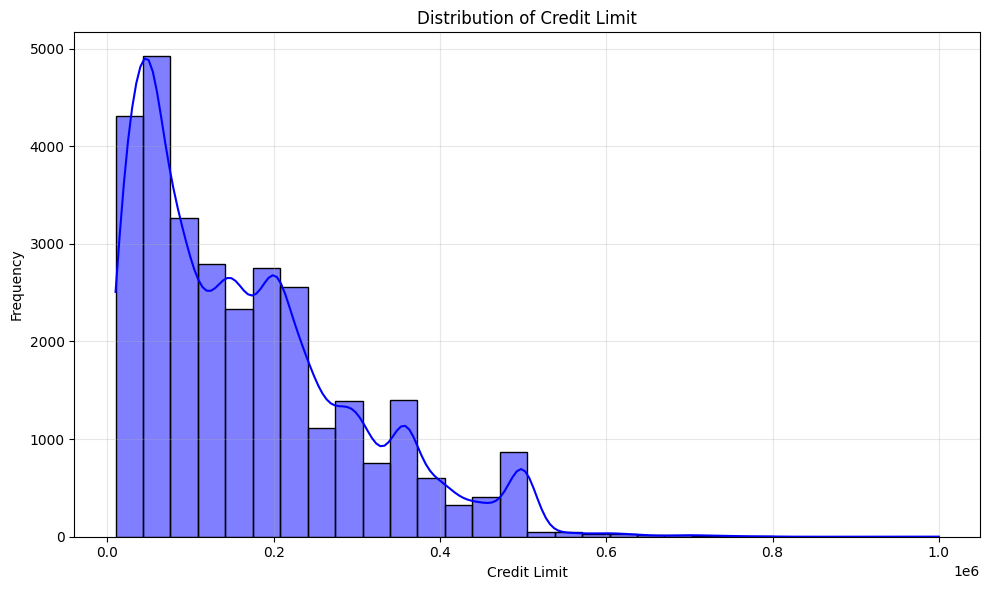

In [13]:
# Distributions of Credit Limit
plt.figure(figsize=(10, 6))
sns.histplot(df['Credit_Limit'], bins=30, kde=True, color='blue')
plt.title('Distribution of Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(numerical_visualization_outputs, 'credit_limit_distribution.png'))
plt.show()

- Credit Limit has a right-skewed distribution, indicating that most clients have credit limits below 250,000 NTD, with a long tail suggesting some clients have very high credit limits.

#### **Age Distribution**

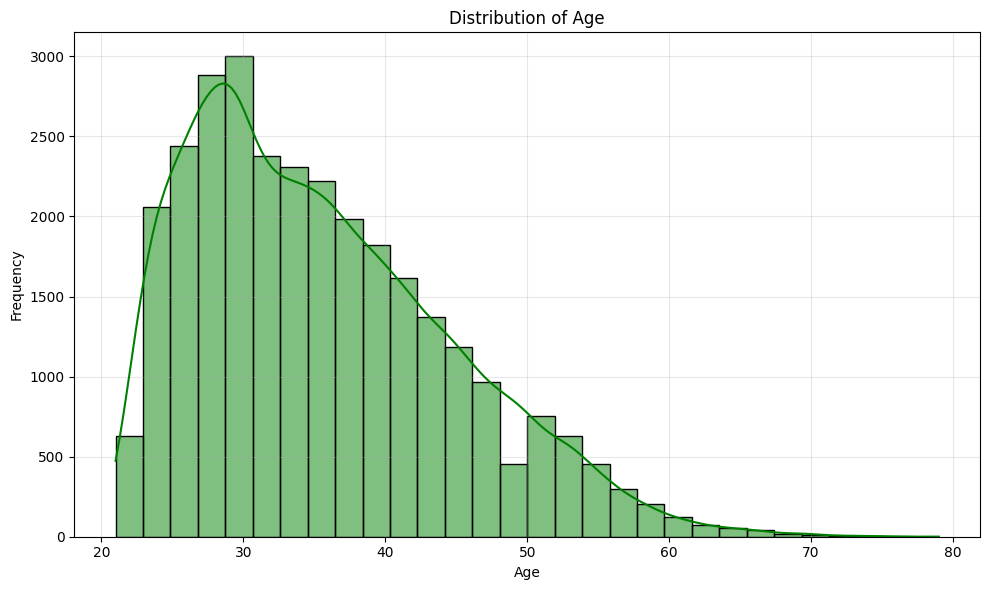

In [14]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='green')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(numerical_visualization_outputs, 'age_distribution.png'))
plt.show()

- Age distribution shows a peak around 25-40 years, with a long tail extending to older ages, indicating most clients are relatively young, but there are also older clients.

#### **Bill Amounts Distributions**

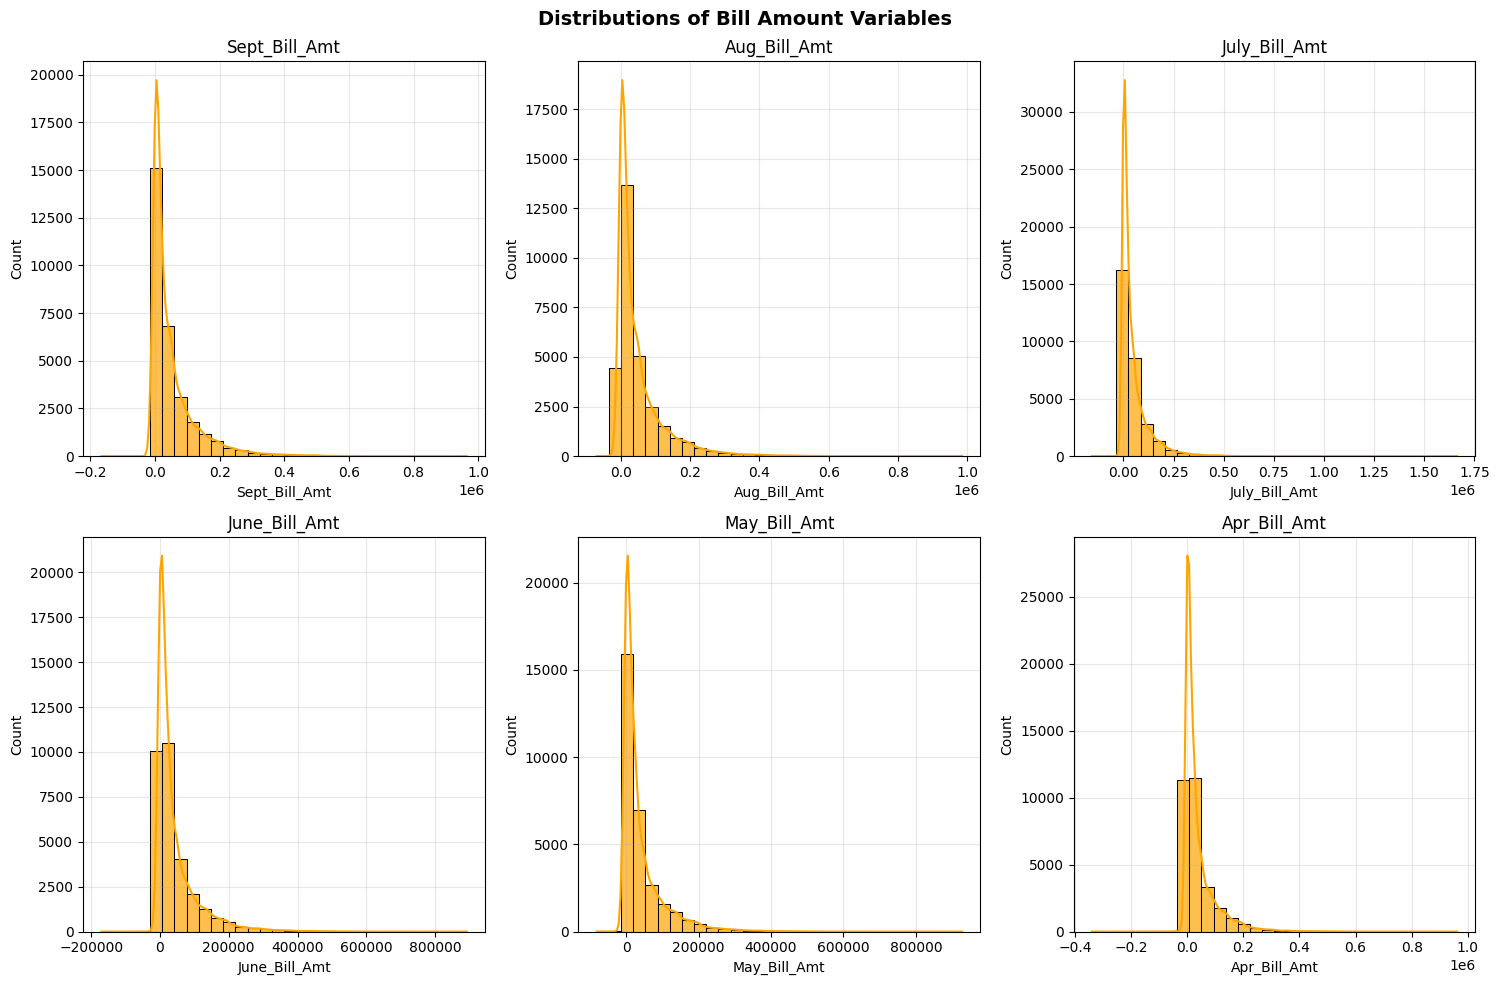

In [15]:
# Grouping bill amounts for visualization
bill_amt_columns = ['Sept_Bill_Amt', 'Aug_Bill_Amt', 'July_Bill_Amt', 'June_Bill_Amt', 'May_Bill_Amt', 'Apr_Bill_Amt']

# Distribution of Bill Amounts
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distributions of Bill Amount Variables', fontsize=14, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(bill_amt_columns):
    sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i], color='orange', alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(numerical_visualization_outputs, 'bill_amounts_distributions.png'))
plt.show()

- The Bill Amounts (Sept_Bill_Amt to Apr_Bill_Amt) shows a right-skewed distribution, with most clients having bill amounts below 50,000 NTD, but some clients have very high bills, indicating potential outliers or high credit usage.
- Sept_Bill_Amt and June_Bill_Amt have some negative values, indicating overpayments or refunds, while the other months have positive values, suggesting normal billing cycles.
- July_Bill_Amt have some values greater than maximum credit limit (1,000,000 NTD), indicating clients may have defaulted and intrest charges or fees applied.

#### **Payment Amounts Distributions**

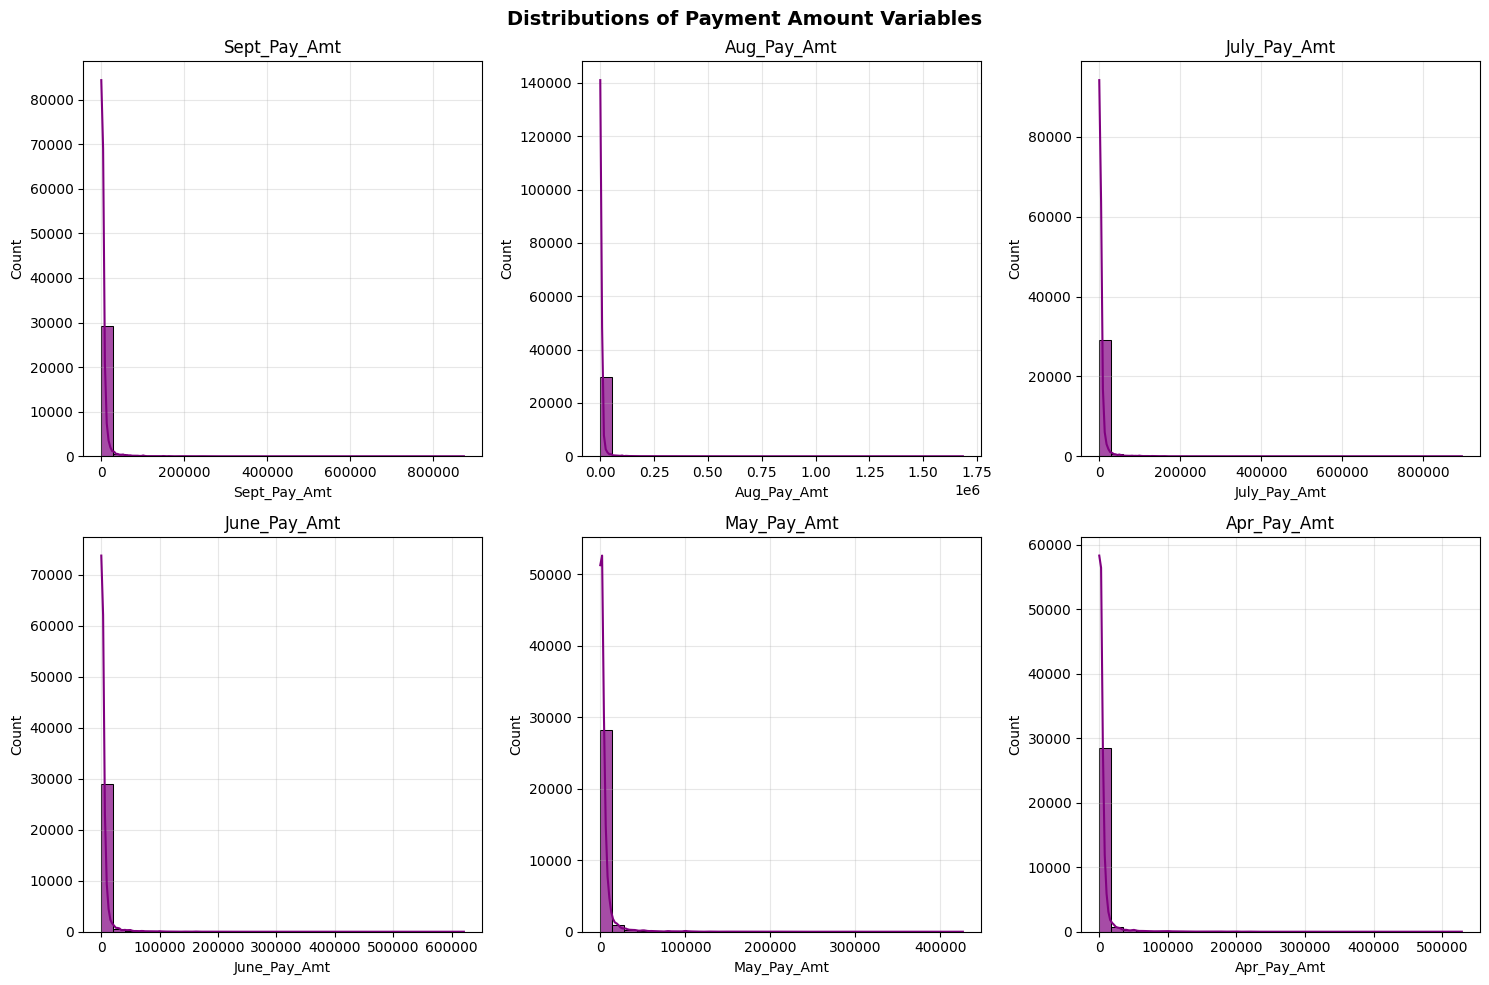

In [16]:
# Grouping payment amounts for visualization
pay_amt_columns = ['Sept_Pay_Amt', 'Aug_Pay_Amt', 'July_Pay_Amt', 'June_Pay_Amt', 'May_Pay_Amt', 'Apr_Pay_Amt']

# Distribution of Payment Amounts
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distributions of Payment Amount Variables', fontsize=14, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(pay_amt_columns):
    sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i], color='purple', alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(numerical_visualization_outputs, 'payment_amounts_distributions.png'))
plt.show()

- Pay Amounts also has a Right-skewed distribution, with most clients making payments below 10,000 NTD, but some clients have very high payments, indicating potential outliers or high credit usage.
- Aug_Pay_Amt have some very high values, indicating clients may have made large payments to reduce their credit usage or pay off their bills.

### **Key Observations from Numerical Features**

- **Credit Limit**
    - Credit_Limit ranges from 10,000 to 1,000,000 NTD, with a median around 150,000 NTD indicating 50% of clients have credit limits below this value.
    - Credit Limit has a right-skewed distribution, indicating that most clients have credit limits below 250,000 NTD, with a long tail suggesting some clients have very high credit limits.

- **Age**
    - Age ranges from 21 to 79, with a median around 35 years, indicating that 50% of clients are below this age.
    - Age distribution shows a peak around 25-40 years, with a long tail extending to older ages, indicating most clients are relatively young, but there are also older clients.

- **Bill Amounts**
    - The Bill Amounts (Sept_Bill_Amt to Apr_Bill_Amt) shows a right-skewed distribution, with most clients having bill amounts below 50,000 NTD, but some clients have very high bills, indicating potential outliers or high credit usage.
    - Sept_Bill_Amt and June_Bill_Amt have some negative values, indicating overpayments or refunds, while the other months have positive values, suggesting normal billing cycles.
    - July_Bill_Amt has some values greater than maximum credit limit (1,000,000 NTD), indicating some type of error or bank fees or interest charges are applied.
- **Payment Amounts**
    - Pay Amounts also has a Right-skewed distribution, with most clients making payments below 10,000 NTD, but some clients have very high payments, indicating potential outliers or high credit usage.
    - Aug_Pay_Amt have some very high values, indicating clients may have made large payments to reduce their credit usage or pay off their bills.

## **2.2 Categorical Features**

In [17]:
# Defining categorical columns based on dataset information
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Sept_Pay', 'Aug_Pay', 'July_Pay', 'June_Pay', 'May_Pay', 'Apr_Pay']

# Displaying unique values in each categorical column
for col in categorical_columns:
    print(f"{col}: {df[col].unique().tolist()}")

Gender: [2, 1]
Education_Level: [2, 1, 3, 5, 4, 6, 0]
Marital_Status: [1, 2, 3, 0]
Sept_Pay: [2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6]
Aug_Pay: [2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8]
July_Pay: [-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8]
June_Pay: [-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8]
May_Pay: [-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]
Apr_Pay: [-2, 2, 0, -1, 3, 6, 4, 7, 8, 5]


- Education_Level has unexpected value (0) that may need cleaning.
- Marital_Status includes 0, which may represent missing or undefined status.
- Sept_Pay to Apr_Pay columns include values like -2 and 0, which may need clarification. As it is not defined in the dataset information.

### **Visualizing Distributions of Categorical Variables**

In [18]:
# Createing categorical visualization outputs directory
categorical_visualization_outputs = os.path.join(visualization_outputs, "categorical_distributions")
os.makedirs(categorical_visualization_outputs, exist_ok=True)

#### **Demographic Variables Distribution**

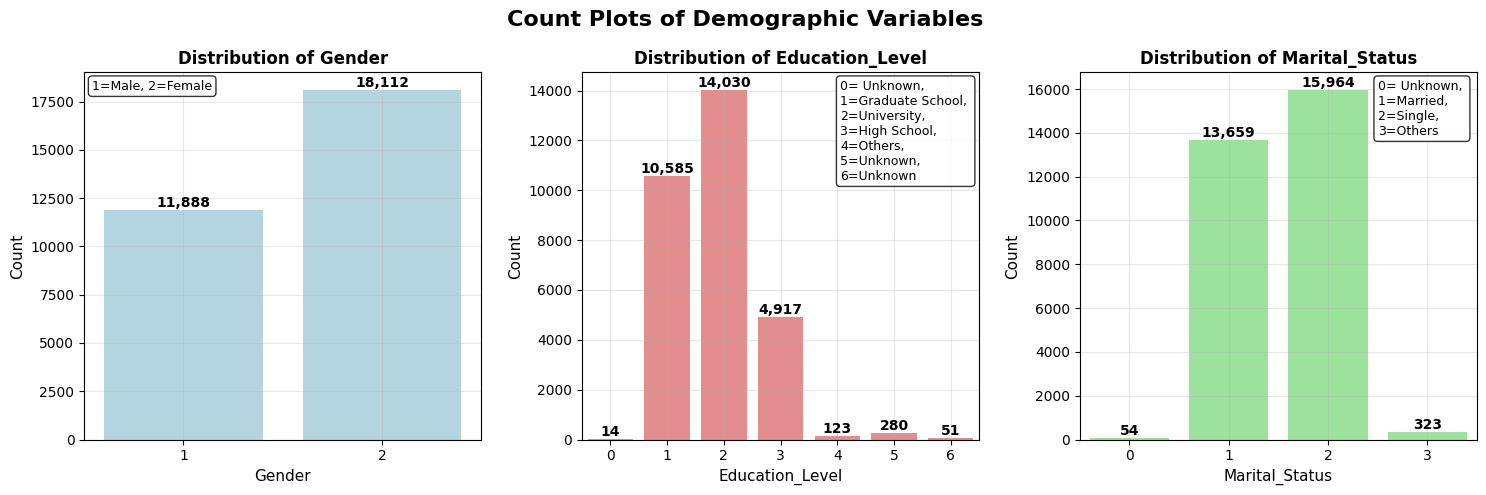

In [19]:
# Grouping demographic variables for visualization
demographic_columns = ['Gender', 'Education_Level', 'Marital_Status']

# Count plots for Demographic Variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Count Plots of Demographic Variables', fontsize=16, fontweight='bold')

colors_demo = ['lightblue', 'lightcoral', 'lightgreen']

# Define information for each demographic variable
info_boxes = {
    'Gender': '1=Male, 2=Female',
    'Education_Level': '0= Unknown, \n1=Graduate School, \n2=University,\n3=High School,\n4=Others,\n5=Unknown, \n6=Unknown',
    'Marital_Status': '0= Unknown, \n1=Married, \n2=Single, \n3=Others'
}

for i, col in enumerate(demographic_columns):
    sns.countplot(data=df, x=col, ax=axes[i], color=colors_demo[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel('Count', fontsize=11)
    axes[i].grid(True, alpha=0.3)
    
    # Add count values on top of bars
    for p in axes[i].patches:
        height = int(p.get_height())
        axes[i].annotate(f'{height:,}', 
                       (p.get_x() + p.get_width()/2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Add information box for each variable with custom positioning
    if col == 'Gender':
        # Keep Gender info box at top-left
        pos_x, pos_y = 0.02, 0.98
    elif col == 'Education_Level':
        # Education_Level info box to top-right
        pos_x, pos_y = 0.65, 0.98
    else:  # Marital_Status
        # Move Marital_Status info box further right in top-right corner
        pos_x, pos_y = 0.75, 0.98
        
    axes[i].text(pos_x, pos_y, info_boxes[col], 
                transform=axes[i].transAxes, 
                fontsize=9, 
                verticalalignment='top',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8, edgecolor='black'))

plt.tight_layout()
plt.savefig(os.path.join(categorical_visualization_outputs, 'demographic_variables_distributions.png'))
plt.show()

- Gender Distribution shows that most of the credit card owners are females (around 60%) compared to males (around 40%).
- Education Level Distribution shows that most credit card owners have university education level or graduate school, with a small percentage having high school or lower education levels.
- Marital Status Distribution shows that most credit card owners are single, followed by married. A small percentage have undefined marital status.

#### **Payment Status Distribution**

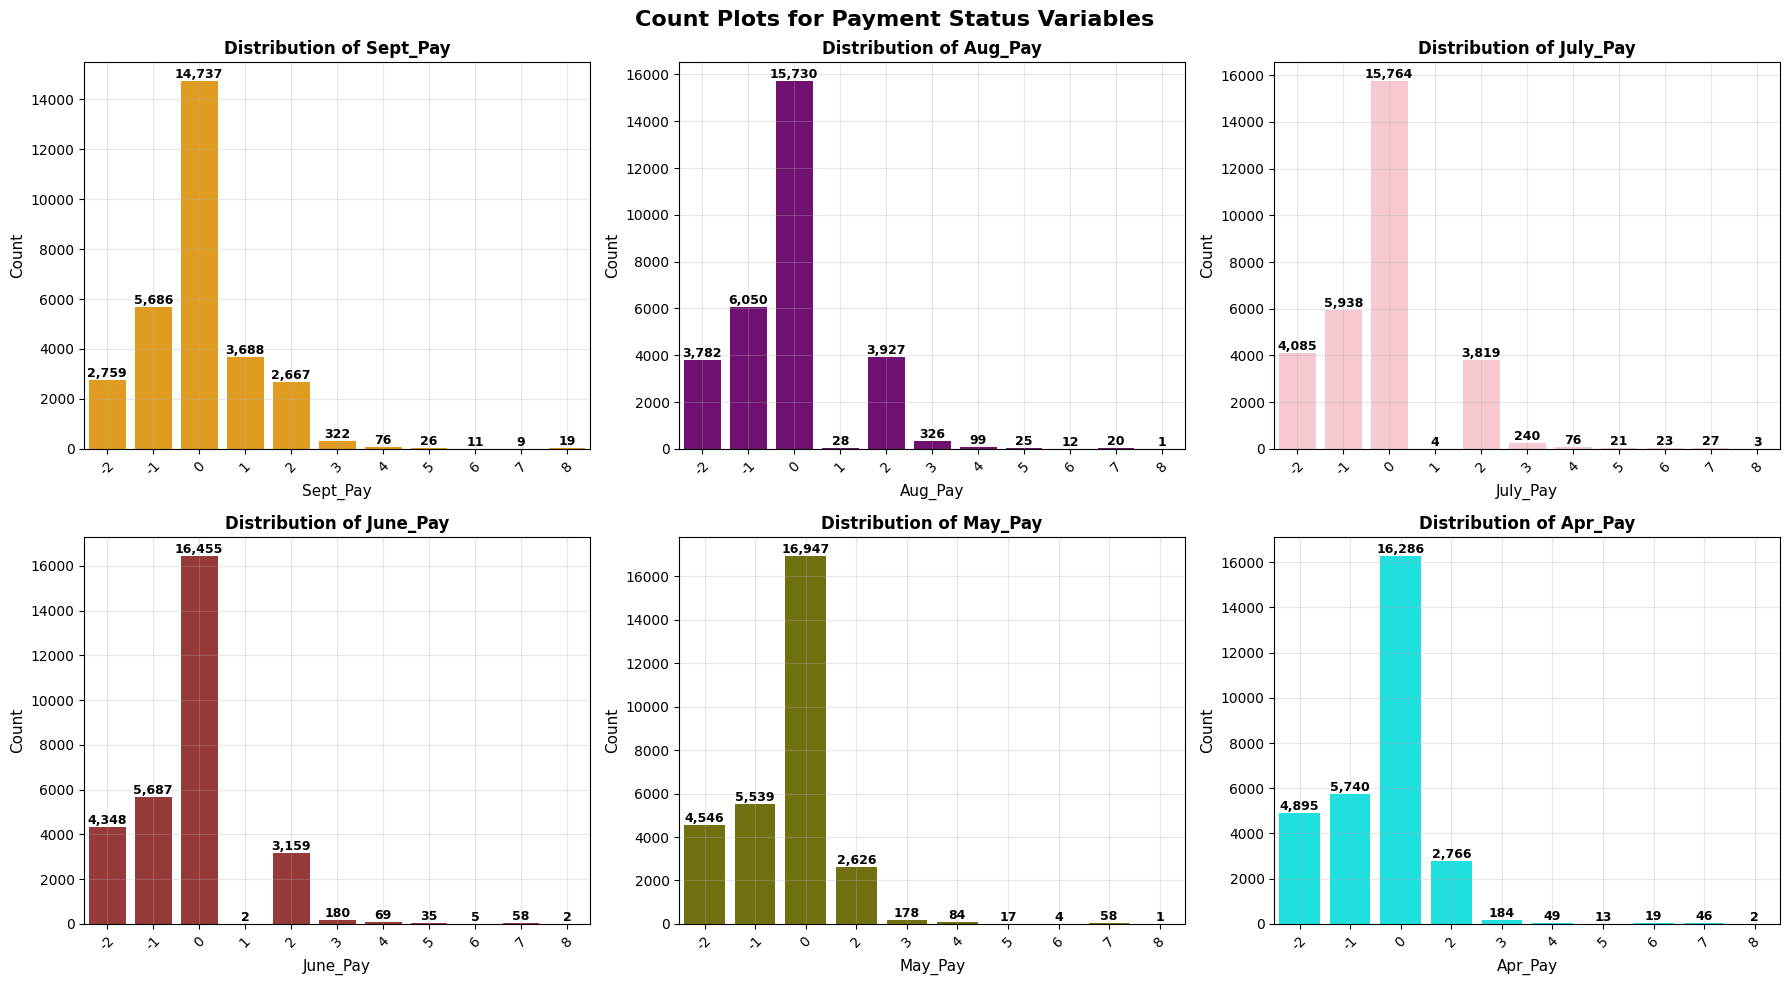

In [20]:
# Grouping payment status variables for visualization
payment_status_columns = ['Sept_Pay', 'Aug_Pay', 'July_Pay', 'June_Pay', 'May_Pay', 'Apr_Pay']

# Count plots for Payment Status Variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Count Plots for Payment Status Variables', fontsize=16, fontweight='bold')

# Flatten axes for easier iteration
axes = axes.flatten()
colors_payment = ['orange', 'purple', 'pink', 'brown', 'olive', 'cyan']

for i, col in enumerate(payment_status_columns):
    sns.countplot(data=df, x=col, ax=axes[i], color=colors_payment[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel('Count', fontsize=11)
    axes[i].grid(True, alpha=0.3)
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add count values on top of bars
    for p in axes[i].patches:
        height = int(p.get_height())
        axes[i].annotate(f'{height:,}', 
                       (p.get_x() + p.get_width()/2., p.get_height()), 
                       ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(categorical_visualization_outputs, 'payment_status_distributions.png'))
plt.show()

- All months payment status show that most clients pay on time (-1, 0). Payment delays of 1-2 months are common (1, 2).
- The presence of -2 values indicates "no consumption" periods, which may need clarification.
- Payment patterns are relatively consistent across months, with most of the clients are maintaining good payment behavior.

### **Key Observations from Categorical Features**

- **Demographic Variables:**
    - Gender Distribution shows that most of the credit card owners are females (around 60%) compared to males (around 40%).
    - Education Level Distribution shows that most credit card owners have university education level or graduate school, with a small percentage having high school or lower education levels.
    - Marital Status Distribution shows that most credit card owners are single, followed by married. A small percentage have undefined marital status.

- **Payment Status Variables (Sept_Pay to Apr_Pay):**
    - All months payment status show that most clients pay on time (-1, 0). Payment delays of 1-2 months are common (1, 2).
    - The presence of -2 values indicates "no consumption" periods, which may need clarification.
    - Payment patterns are relatively consistent across months, with most of the clients are maintaining good payment behavior.

## **2.3 Target Variable**

In [21]:
# Defining target column
target_column = 'default_payment_next_month'

# Displaying the distribution of the target variable
df[target_column].value_counts(normalize=True) * 100

default_payment_next_month
0    77.88
1    22.12
Name: proportion, dtype: float64

- default_payment_next_month (target variable) is imbalanced with 77.88% 0s and 22.12% 1s, suggesting a need for handling imbalance later.

### **Visualizing Distributions of Target Variable**

In [22]:
# Createing target visualization outputs directory
target_visualization_outputs = os.path.join(visualization_outputs, "target_distributions")
os.makedirs(target_visualization_outputs, exist_ok=True)

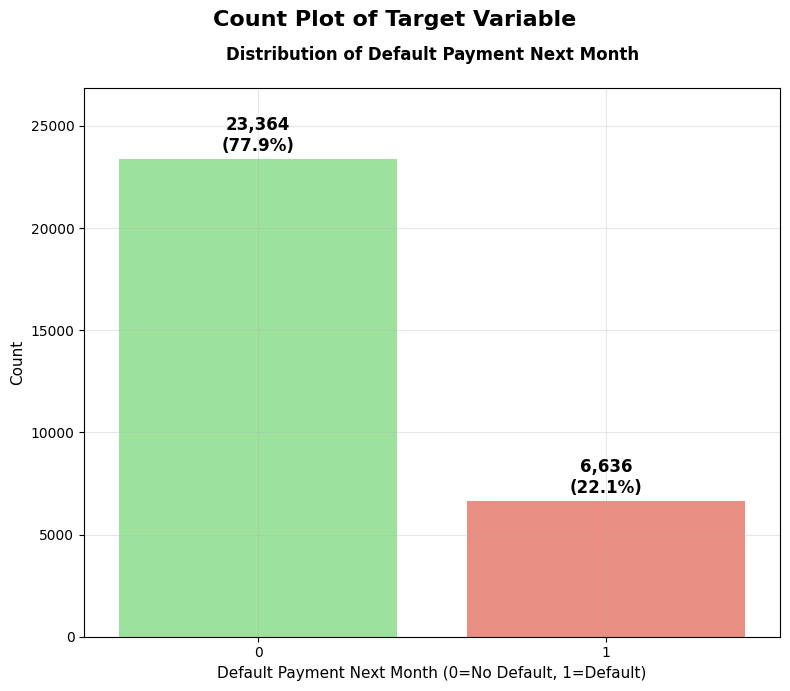

In [23]:
# Count plot for Target Variable
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
fig.suptitle('Count Plot of Target Variable', fontsize=16, fontweight='bold')

sns.countplot(data=df, x=target_column, ax=ax, palette=['lightgreen', 'salmon'])
ax.set_title('Distribution of Default Payment Next Month', fontsize=12, fontweight='bold', pad=20)
ax.set_xlabel('Default Payment Next Month (0=No Default, 1=Default)', fontsize=11)
ax.set_ylabel('Count', fontsize=11)
ax.grid(True, alpha=0.3)

# Add count values and percentages on top of bars
total_count = len(df)
for p in ax.patches:
    height = int(p.get_height())
    percentage = (height / total_count) * 100
    ax.annotate(f'{height:,}\n({percentage:.1f}%)', 
               (p.get_x() + p.get_width()/2., p.get_height() + 200), 
               ha='center', va='bottom', fontsize=12, fontweight='bold')

# Adjust y-axis limit to accommodate annotations
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.15)

plt.tight_layout()
plt.savefig(os.path.join(target_visualization_outputs, 'target_variable_distribution.png'))
plt.show()

- The target variable is binary, with 0 indicating no default and 1 indicating default, which is consistent with the expected format for binary classification tasks.
- The distribution of target variable default payment next month shows that 77.9% of clients do not default (0) and 22.1% do default (1), indicating a significant class imbalance.
- This imbalance may affect model performance, so techniques like oversampling, undersampling, and using appropriate evaluation metrics will be necessary.

## **Key Observations from Understanding Variables**

- **Variable Overview**:
    - **ID**: Unique identifier (we will not use for modeling).
    - **Credit_Limit**: Credit limit (continuous, float64).
    - **Gender, Education_Level, Marital_Status**: Categorical variables encoded as integers.
    - **Age**: Continuous, integer.
    - **Sept_Pay to Apr_Pay**: Payment status (ordinal, e.g., -1, 0, 1, 2 indicating months of delay or paid).
    - **Sept_Bill_Amt to Apr_Bill_Amt**: Bill amounts for six months (float64).
    - **Sept_Pay_Amt to Apr_Pay_Amt**: Payment amounts for six months (float64).
    - **default_payment_next_month**: Target variable (0 = no default, 1 = default, int64).

- **Numerical Variables**:
    - **Credit Limit**
        - Credit_Limit ranges from 10,000 to 1,000,000 NTD, with a median around 150,000 NTD indicating 50% of clients have credit limits below this value.
        - Credit Limit has a right-skewed distribution, indicating that most clients have credit limits below 250,000 NTD, with a long tail suggesting some clients have very high credit limits.

    - **Age**
        - Age ranges from 21 to 79, with a median around 35 years, indicating that 50% of clients are below this age.
        - Age distribution shows a peak around 25-40 years, with a long tail extending to older ages, indicating most clients are relatively young, but there are also older clients.

    - **Bill Amounts (Sept_Bill_Amt to Apr_Bill_Amt)**
        - The Bill Amounts (Sept_Bill_Amt to Apr_Bill_Amt) shows a right-skewed distribution, with most clients having bill amounts below 50,000 NTD, but some clients have very high bills, indicating potential outliers or high credit usage.
        - Sept_Bill_Amt and June_Bill_Amt have some negative values, indicating overpayments or refunds, while the other months have positive values, suggesting normal billing cycles.
        - July_Bill_Amt has some values greater than maximum credit limit (1,000,000 NTD), indicating some type of error or bank fees or interest charges are applied.

    - **Payment Amounts (Sept_Pay_Amt to Apr_Pay_Amt)**
        - Pay Amounts also has a Right-skewed distribution, with most clients making payments below 10,000 NTD, but some clients have very high payments, indicating potential outliers or high credit usage.
        - Aug_Pay_Amt have some very high values, indicating clients may have made large payments to reduce their credit usage or pay off their bills.

- **Categorical Variables**: 
    - **Demographic Variables:**
        - Gender Distribution shows that most of the credit card owners are females (around 60%) compared to males (around 40%).
        - Education Level Distribution shows that most credit card owners have university education level or graduate school, with a small percentage having high school or lower education levels.
        - Marital Status Distribution shows that most credit card owners are single, followed by married. A small percentage have undefined marital status.

    - **Payment Status Variables (Sept_Pay to Apr_Pay):**
        - All months payment status show that most clients pay on time (-1, 0). Payment delays of 1-2 months are common (1, 2).
        - The presence of -2 values indicates "no consumption" periods, which may need clarification.
        - Payment patterns are relatively consistent across months, with most of the clients are maintaining good payment behavior.

- **Target Variable**:
    - The target variable is binary, with 0 indicating no default and 1 indicating default, which is consistent with the expected format for binary classification tasks.
    - The distribution of target variable default payment next month shows that 77.9% of clients do not default (0) and 22.1% do default (1), indicating a significant class imbalance.
    - This imbalance may affect model performance, so techniques like oversampling, undersampling, and using appropriate evaluation metrics will be necessary.

# **3. Identifying Outliers**

In [24]:
# Detecting Outliers in Numerical Variables using IQR Method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

# Checking for outliers in each numerical column
for col in numerical_columns:
    outlier_count, lower, upper = detect_outliers(df, col)
    total_count = len(df[col])
    outlier_percentage = (outlier_count / total_count) * 100
    print(f"\n{col}: {outlier_count} outliers ({outlier_percentage:.2f}%) \n[Lower bound: {round(lower)}, Upper bound: {round(upper)}]")


Credit_Limit: 167 outliers (0.56%) 
[Lower bound: -235000, Upper bound: 525000]

Age: 272 outliers (0.91%) 
[Lower bound: 8, Upper bound: 60]

Sept_Bill_Amt: 2400 outliers (8.00%) 
[Lower bound: -91740, Upper bound: 162389]

Aug_Bill_Amt: 2395 outliers (7.98%) 
[Lower bound: -88548, Upper bound: 155538]

July_Bill_Amt: 2469 outliers (8.23%) 
[Lower bound: -83582, Upper bound: 146412]

June_Bill_Amt: 2622 outliers (8.74%) 
[Lower bound: -75942, Upper bound: 132775]

May_Bill_Amt: 2725 outliers (9.08%) 
[Lower bound: -70878, Upper bound: 122832]

Apr_Bill_Amt: 2693 outliers (8.98%) 
[Lower bound: -70657, Upper bound: 121112]

Sept_Pay_Amt: 2745 outliers (9.15%) 
[Lower bound: -5009, Upper bound: 11015]

Aug_Pay_Amt: 2714 outliers (9.05%) 
[Lower bound: -5418, Upper bound: 11250]

July_Pay_Amt: 2598 outliers (8.66%) 
[Lower bound: -5782, Upper bound: 10678]

June_Pay_Amt: 2994 outliers (9.98%) 
[Lower bound: -5280, Upper bound: 9589]

May_Pay_Amt: 2945 outliers (9.82%) 
[Lower bound: -54

- **Low Outlier Percentages:** Credit_Limit (0.56%) and Age (0.91%) have minimal outliers, suggesting good data integrity overall.
- **High Outlier Percentages:** BILL_AMT (8–9%) and PAY_AMT (8.66–9.98%) have significant outliers, reflecting the dataset’s natural variability in credit usage and payments.
- **Negative Values:**
    - Negative BILL_AMT outliers are valid (overpayments).
- **AGE Outliers:** Values above 60.50 are likely fine.

In [25]:
# Createing outliers visualization outputs directory
outliers_visualization_outputs = os.path.join(visualization_outputs, "outliers_distributions")
os.makedirs(outliers_visualization_outputs, exist_ok=True)

## **Visualizing Outliers in Credit Limit**

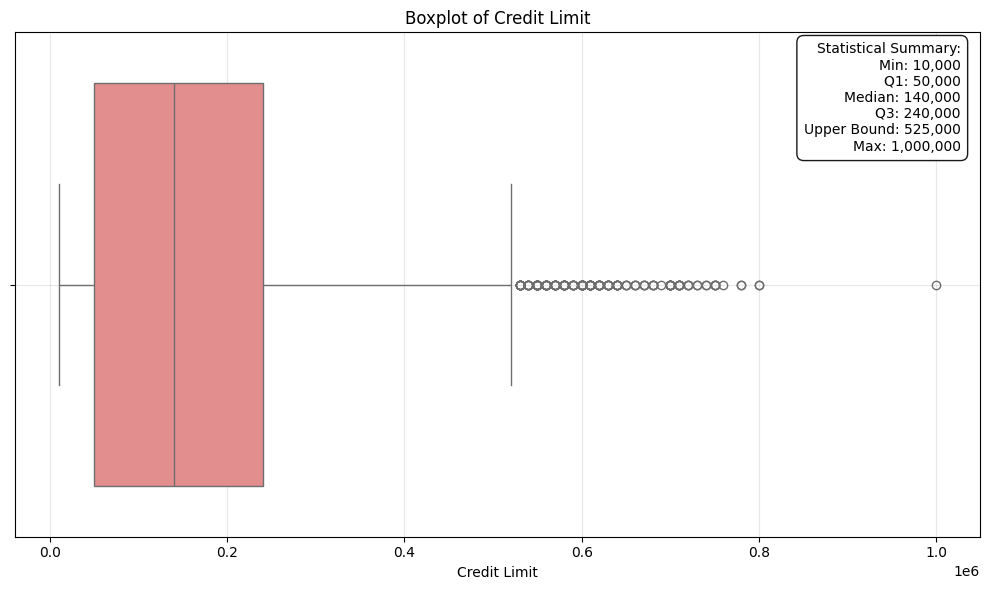

In [26]:
# Boxplot for Credit Limit
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Credit_Limit'], color='lightcoral')
plt.title('Boxplot of Credit Limit')
plt.xlabel('Credit Limit')
plt.grid(True, alpha=0.3)

# Calculate statistical values for the information box
Q1 = df['Credit_Limit'].quantile(0.25)
Q3 = df['Credit_Limit'].quantile(0.75)
IQR = Q3 - Q1
median = df['Credit_Limit'].median()
min_val = df['Credit_Limit'].min()
max_val = df['Credit_Limit'].max()
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create information box text with conditional bounds
info_lines = [
    "Statistical Summary:",
    f"Min: {min_val:,.0f}"
]

# Add lower bound only if it's less than min
if min_val >= lower_bound:
    pass  # Don't display lower bound
else:
    info_lines.append(f"Lower Bound: {lower_bound:,.0f}")

info_lines.extend([
    f"Q1: {Q1:,.0f}",
    f"Median: {median:,.0f}",
    f"Q3: {Q3:,.0f}"
])

# Add upper bound only if it's greater than max
if max_val <= upper_bound:
    pass  # Don't display upper bound
else:
    info_lines.append(f"Upper Bound: {upper_bound:,.0f}")

info_lines.append(f"Max: {max_val:,.0f}")

# Join all lines with newlines
info_text = "\n".join(info_lines)

# Add information box to top-right corner
plt.gca().text(0.98, 0.98, info_text, 
               transform=plt.gca().transAxes, 
               fontsize=10, 
               verticalalignment='top',
               horizontalalignment='right',
               bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.9, edgecolor='black'))

plt.tight_layout()
plt.savefig(os.path.join(outliers_visualization_outputs, 'credit_limit_boxplot.png'))
plt.show()

- The box plot shows that Credit Limit has a few outliers above 525,000 NTD, but 75% of clients have credit limits below 240,000 NTD, indicating only 25% of clients have credit limits above 240,000 NTD.
- Middle 50% of clients have credit limits between 50,000 and 240,000 NTD, with a median around 150,000 NTD.

## **Visualizing Outliers in Age**

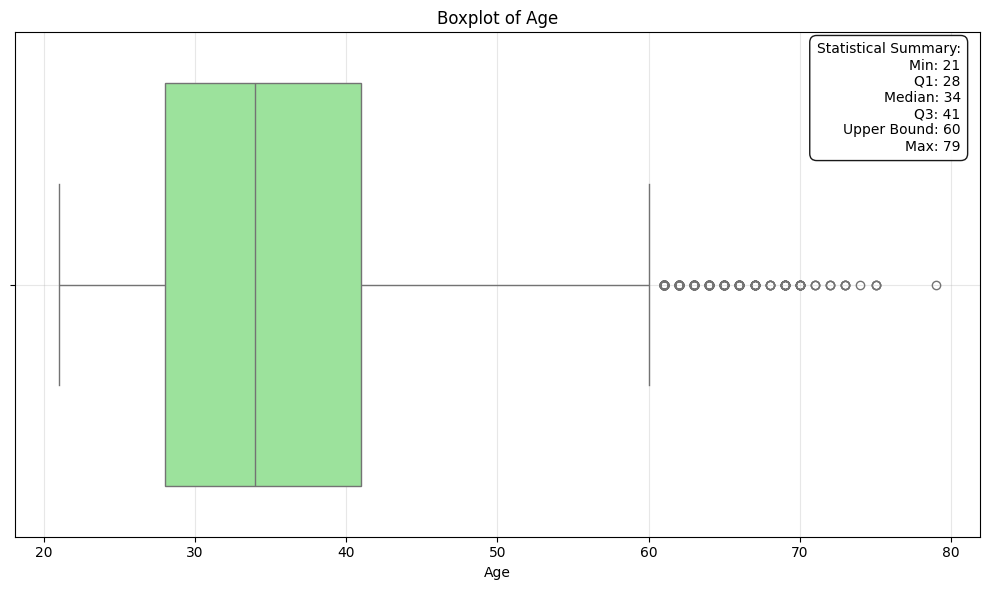

In [27]:
# Boxplot for Age
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'], color='lightgreen')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.grid(True, alpha=0.3)

# Calculate statistical values for the information box
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
median = df['Age'].median()
min_val = df['Age'].min()
max_val = df['Age'].max()
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create information box text with conditional bounds
info_lines = [
    "Statistical Summary:",
    f"Min: {min_val:,.0f}"
]

# Add lower bound only if it's less than min
if min_val >= lower_bound:
    pass  # Don't display lower bound
else:
    info_lines.append(f"Lower Bound: {lower_bound:,.0f}")

info_lines.extend([
    f"Q1: {Q1:,.0f}",
    f"Median: {median:,.0f}",
    f"Q3: {Q3:,.0f}"
])

# Add upper bound only if it's greater than max
if max_val <= upper_bound:
    pass  # Don't display upper bound
else:
    info_lines.append(f"Upper Bound: {upper_bound:,.0f}")

info_lines.append(f"Max: {max_val:,.0f}")

# Join all lines with newlines
info_text = "\n".join(info_lines)

# Add information box to top-right corner
plt.gca().text(0.98, 0.98, info_text, 
               transform=plt.gca().transAxes, 
               fontsize=10, 
               verticalalignment='top',
               horizontalalignment='right',
               bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.9, edgecolor='black'))

plt.tight_layout()
plt.savefig(os.path.join(outliers_visualization_outputs, 'age_boxplot.png'))
plt.show()

- The boxplot shows that the majority of credit card owner are between 28 and 41 years old, with a few outliers above 60 years old.
- The median age is 34 years, indicating that 50% of clients are below this age.

## **Visualizing Outliers in Bill Amounts**

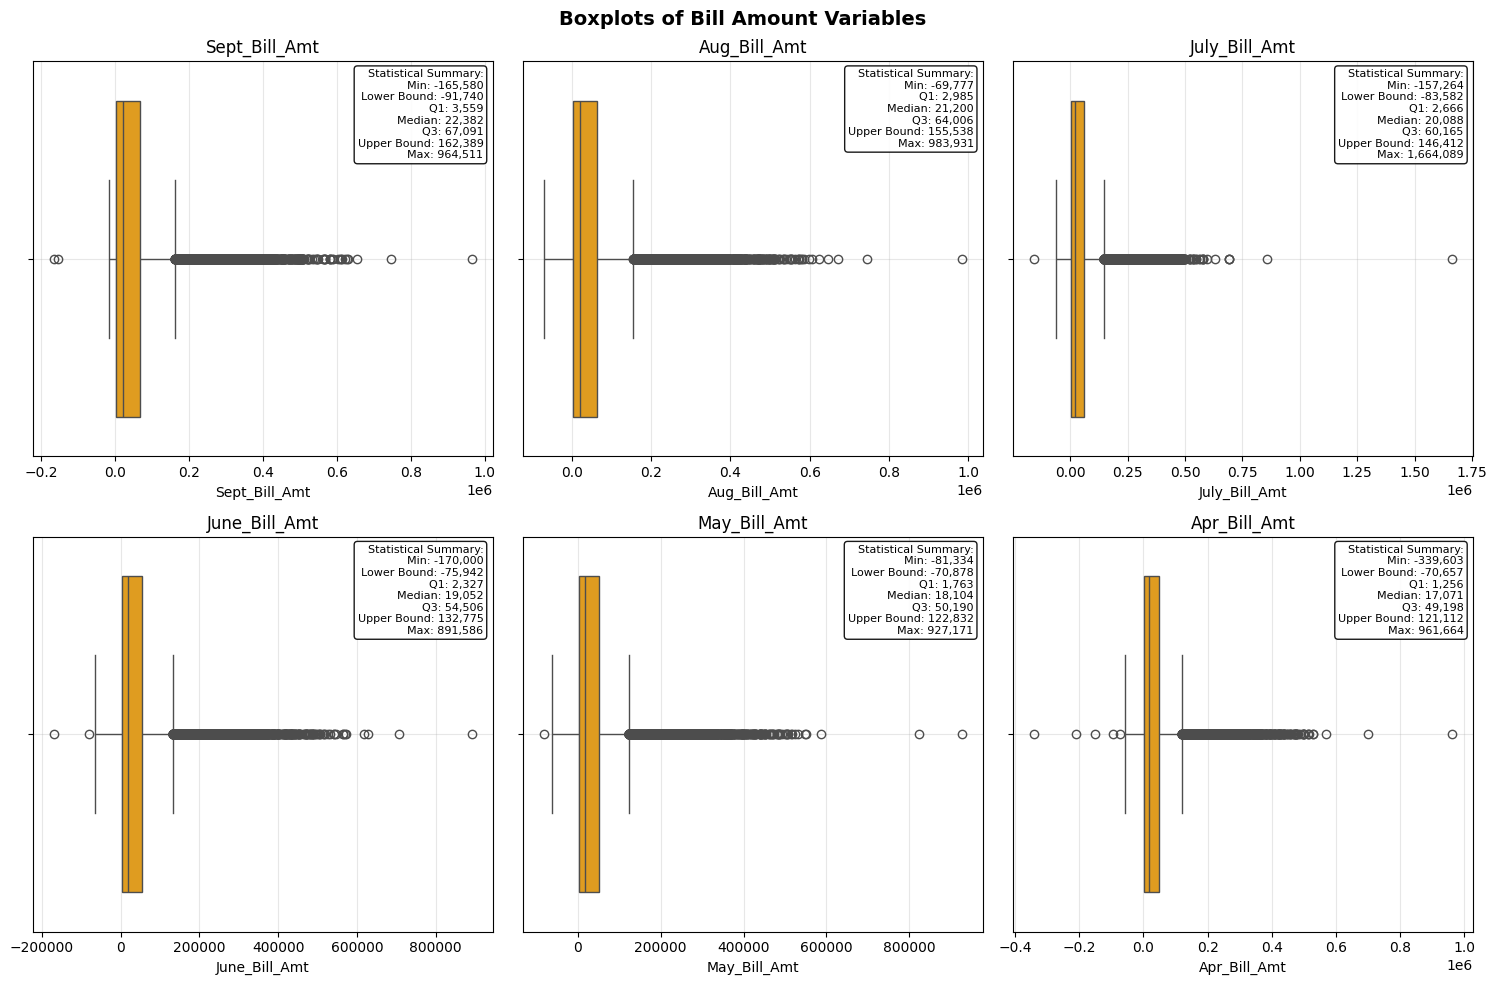

In [28]:
# Boxplots for Bill Amounts
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Boxplots of Bill Amount Variables', fontsize=14, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(bill_amt_columns):
    sns.boxplot(x=df[col], ax=axes[i], color='orange')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].grid(True, alpha=0.3)
    
    # Calculate statistical values for the information box
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    median = df[col].median()
    min_val = df[col].min()
    max_val = df[col].max()
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create information box text with conditional bounds
    info_lines = [
        "Statistical Summary:",
        f"Min: {min_val:,.0f}"
    ]
    
    # Add lower bound only if it's less than min
    if min_val >= lower_bound:
        pass  # Don't display lower bound
    else:
        info_lines.append(f"Lower Bound: {lower_bound:,.0f}")
    
    info_lines.extend([
        f"Q1: {Q1:,.0f}",
        f"Median: {median:,.0f}",
        f"Q3: {Q3:,.0f}"
    ])
    
    # Add upper bound only if it's greater than max
    if max_val <= upper_bound:
        pass  # Don't display upper bound
    else:
        info_lines.append(f"Upper Bound: {upper_bound:,.0f}")
    
    info_lines.append(f"Max: {max_val:,.0f}")
    
    # Join all lines with newlines
    info_text = "\n".join(info_lines)
    
    # Add information box to top-right corner of each subplot
    axes[i].text(0.98, 0.98, info_text, 
                 transform=axes[i].transAxes, 
                 fontsize=8, 
                 verticalalignment='top',
                 horizontalalignment='right',
                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='black'))

plt.tight_layout()
plt.savefig(os.path.join(outliers_visualization_outputs, 'bill_amounts_boxplots.png'))
plt.show()

- The boxplot shows that the majority of clients have bill amounts below 50,000 NTD, and the middle 50% of clients have bill amounts around 20,000 NTD.
- Bill Amounts (Sept_Bill_Amt to Apr_Bill_Amt) have significant outliers, with some clients having bill amounts above 600,000 NTD.
- Negative values are also present, indicating overpayments or refunds, which are valid but there are some outliers values below -75,000 NTD.
- The July Bill Amount has some values greater than maximum credit limit (1,000,000 NTD), indicating some type of error or bank fees or interest charges are applied.


## **Visualizing Outliers in Payment Amounts**

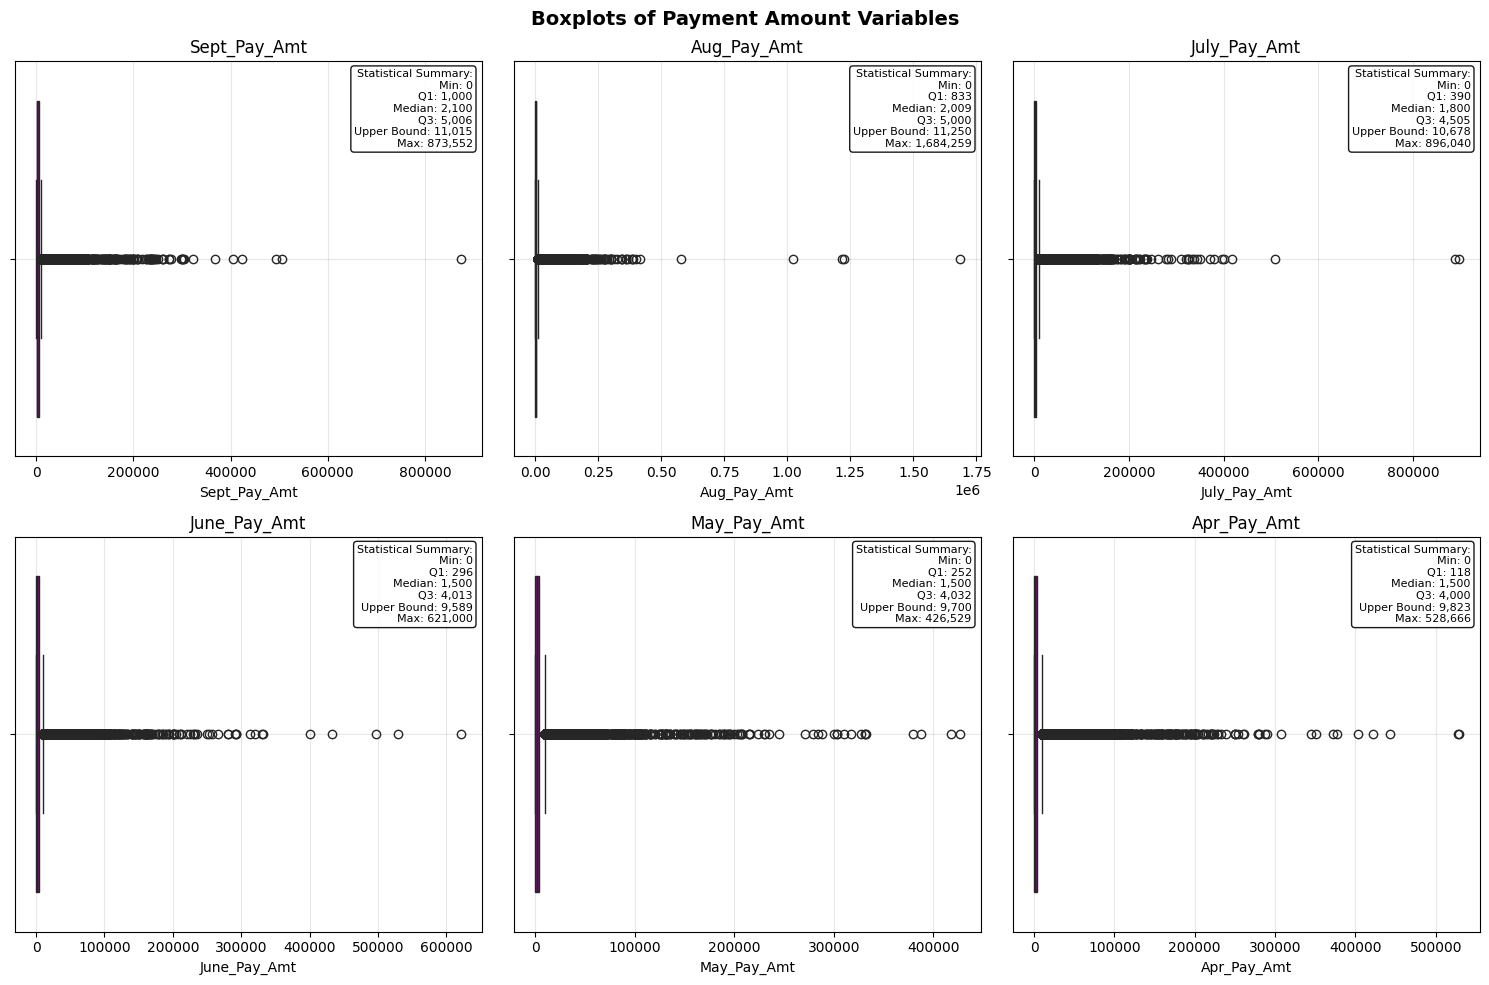

In [29]:
# Boxplots for Payment Amounts
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Boxplots of Payment Amount Variables', fontsize=14, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(pay_amt_columns):
    sns.boxplot(x=df[col], ax=axes[i], color='purple')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].grid(True, alpha=0.3)
    
    # Calculate statistical values for the information box
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    median = df[col].median()
    min_val = df[col].min()
    max_val = df[col].max()
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create information box text with conditional bounds
    info_lines = [
        "Statistical Summary:",
        f"Min: {min_val:,.0f}"
    ]
    
    # Add lower bound only if it's less than min
    if min_val >= lower_bound:
        pass  # Don't display lower bound
    else:
        info_lines.append(f"Lower Bound: {lower_bound:,.0f}")
    
    info_lines.extend([
        f"Q1: {Q1:,.0f}",
        f"Median: {median:,.0f}",
        f"Q3: {Q3:,.0f}"
    ])
    
    # Add upper bound only if it's greater than max
    if max_val <= upper_bound:
        pass  # Don't display upper bound
    else:
        info_lines.append(f"Upper Bound: {upper_bound:,.0f}")
    
    info_lines.append(f"Max: {max_val:,.0f}")
    
    # Join all lines with newlines
    info_text = "\n".join(info_lines)
    
    # Add information box to top-right corner of each subplot
    axes[i].text(0.98, 0.98, info_text, 
                 transform=axes[i].transAxes, 
                 fontsize=8, 
                 verticalalignment='top',
                 horizontalalignment='right',
                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='black'))

plt.tight_layout()
plt.savefig(os.path.join(outliers_visualization_outputs, 'payment_amounts_boxplots.png'))
plt.show()

- The boxplot shows that the majority of clients pay below 5,000 NTD, with very few people paying above 20,000 NTD.
- Payment Amounts (Sept_Pay_Amt to Apr_Pay_Amt) have significant outliers, with some clients having payment amounts above 100,000 NTD.

## **Key Observations from Outliers Analysis**

- **Outlier Percentages**: 
    - Credit_Limit (0.56%) and Age (0.91%) have minimal outliers, suggesting good data integrity overall. BILL_AMT (8–9%) and PAY_AMT (9–10%) have significant outliers, reflecting the dataset’s natural variability in credit usage and payments.

- **Credit Limit**:
    - The box plot shows that Credit Limit has a few outliers above 525,000 NTD, but 75% of clients have credit limits below 240,000 NTD, indicating only 25% of clients have credit limits above 240,000 NTD.
    - Middle 50% of clients have credit limits between 50,000 and 240,000 NTD, with a median around 150,000 NTD.

- **Age**:
    - The boxplot shows that the majority of credit card owner are between 28 and 41 years old, with a few outliers above 60 years old.
    - The median age is 34 years, indicating that 50% of clients are below this age.

- **Bill Amounts (Sept_Bill_Amt to Apr_Bill_Amt)**:
    - The boxplot shows that the majority of clients have bill amounts below 50,000 NTD, and the middle 50% of clients have bill amounts around 20,000 NTD.
    - Bill Amounts (Sept_Bill_Amt to Apr_Bill_Amt) have significant outliers, with some clients having bill amounts above 600,000 NTD.
    - Negative values are also present, indicating overpayments or refunds, which are valid but there are some outliers values below -75,000 NTD.
    - The July Bill Amount has some values greater than maximum credit limit (1,000,000 NTD), indicating some type of error or bank fees or interest charges are applied.

- **Payment Amounts (Sept_Pay_Amt to Apr_Pay_Amt)**:
    - The boxplot shows that the majority of clients pay below 5,000 NTD, with very few people paying above 20,000 NTD.
    - Payment Amounts (Sept_Pay_Amt to Apr_Pay_Amt) have significant outliers, with some clients having payment amounts above 100,000 NTD.

# **4. Analyzing Feature Relationships**

In [30]:
# Createing Feature Relationship visualization outputs directory
feature_relationship_outputs = os.path.join(visualization_outputs, "feature_relationships")
os.makedirs(feature_relationship_outputs, exist_ok=True)

## **Numerical vs Numerical Relationships**

In [31]:
# Createing Numerical vs numerical feature Relationship visualization outputs directory
num_vs_num_relationship_outputs = os.path.join(feature_relationship_outputs, "numerical_vs_numerical_relationships")
os.makedirs(num_vs_num_relationship_outputs, exist_ok=True)

### **Credit Limit vs Age**

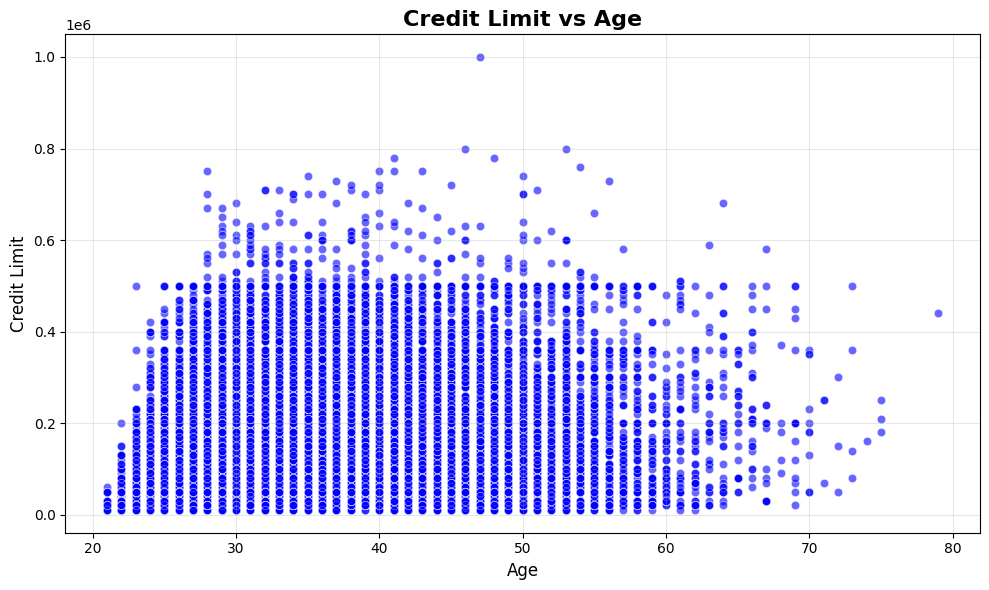

In [32]:
# Scatter plot for Credit Limit vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Credit_Limit', alpha=0.6, color='blue')
plt.title('Credit Limit vs Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Credit Limit', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(num_vs_num_relationship_outputs, 'credit_limit_vs_age.png'))
plt.show()

- **Weak Age-Credit Relationship**: There's no strong linear relationship between age and credit limit, with credit limits widely distributed across all age groups, suggesting that age alone is not a primary determinant for credit limit assignment.
- **Consistent Distribution**: Credit limits remain relatively consistent across different age ranges (20-80 years), with most clients having credit limits below 500,000 NTD regardless of age, indicating that other factors like income or credit history may be more influential in determining credit limits.

### **Credit Limit vs Bill Amounts**

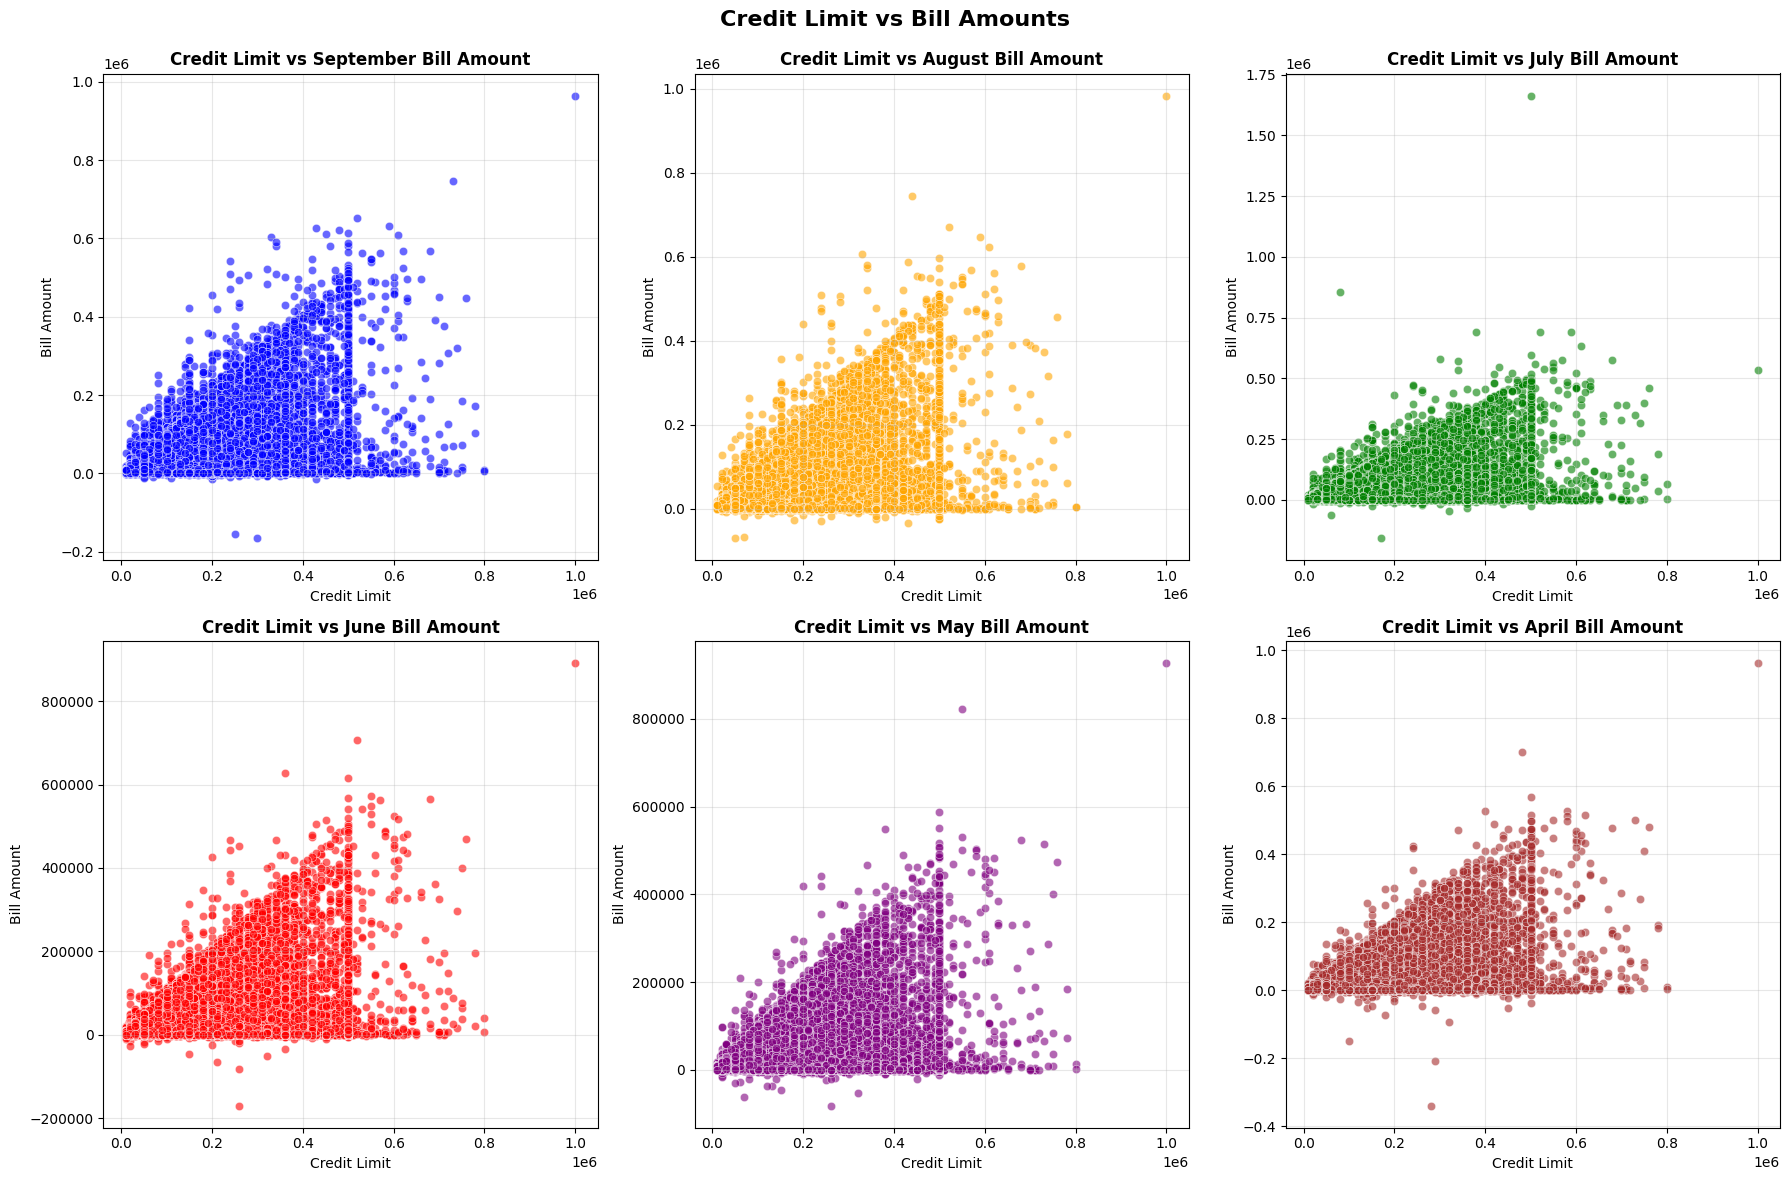

In [33]:
# Scatter plot for Credit limit vs bill amounts
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Credit Limit vs Bill Amounts', fontsize=16, fontweight='bold')
axes = axes.flatten()

# Define bill amount columns and colors
bill_amt_columns = ['Sept_Bill_Amt', 'Aug_Bill_Amt', 'July_Bill_Amt', 'June_Bill_Amt', 'May_Bill_Amt', 'Apr_Bill_Amt']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
month_names = ['September', 'August', 'July', 'June', 'May', 'April']

for i, (col, color, month) in enumerate(zip(bill_amt_columns, colors, month_names)):
    sns.scatterplot(data=df, x='Credit_Limit', y=col, alpha=0.6, color=color, ax=axes[i])
    axes[i].set_title(f'Credit Limit vs {month} Bill Amount', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Credit Limit', fontsize=10)
    axes[i].set_ylabel('Bill Amount', fontsize=10)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(num_vs_num_relationship_outputs, 'credit_limit_vs_bill_amounts.png'))
plt.show()

- **Positive Relationship**: There's a clear positive correlation between credit limit and bill amounts across all months, with clients having higher credit limits generally showing higher bill amounts, indicating that clients utilize a portion of their available credit consistently.
- **Outlier Patterns**: Most bill amounts cluster below 200,000 NTD regardless of credit limit, but some clients with high credit limits (above 500,000 NTD) show exceptionally high bill amounts, particularly in July where some bills exceed the credit limit, suggesting additional fees or interest charges.

### **Credit Limit vs Payment Amounts**

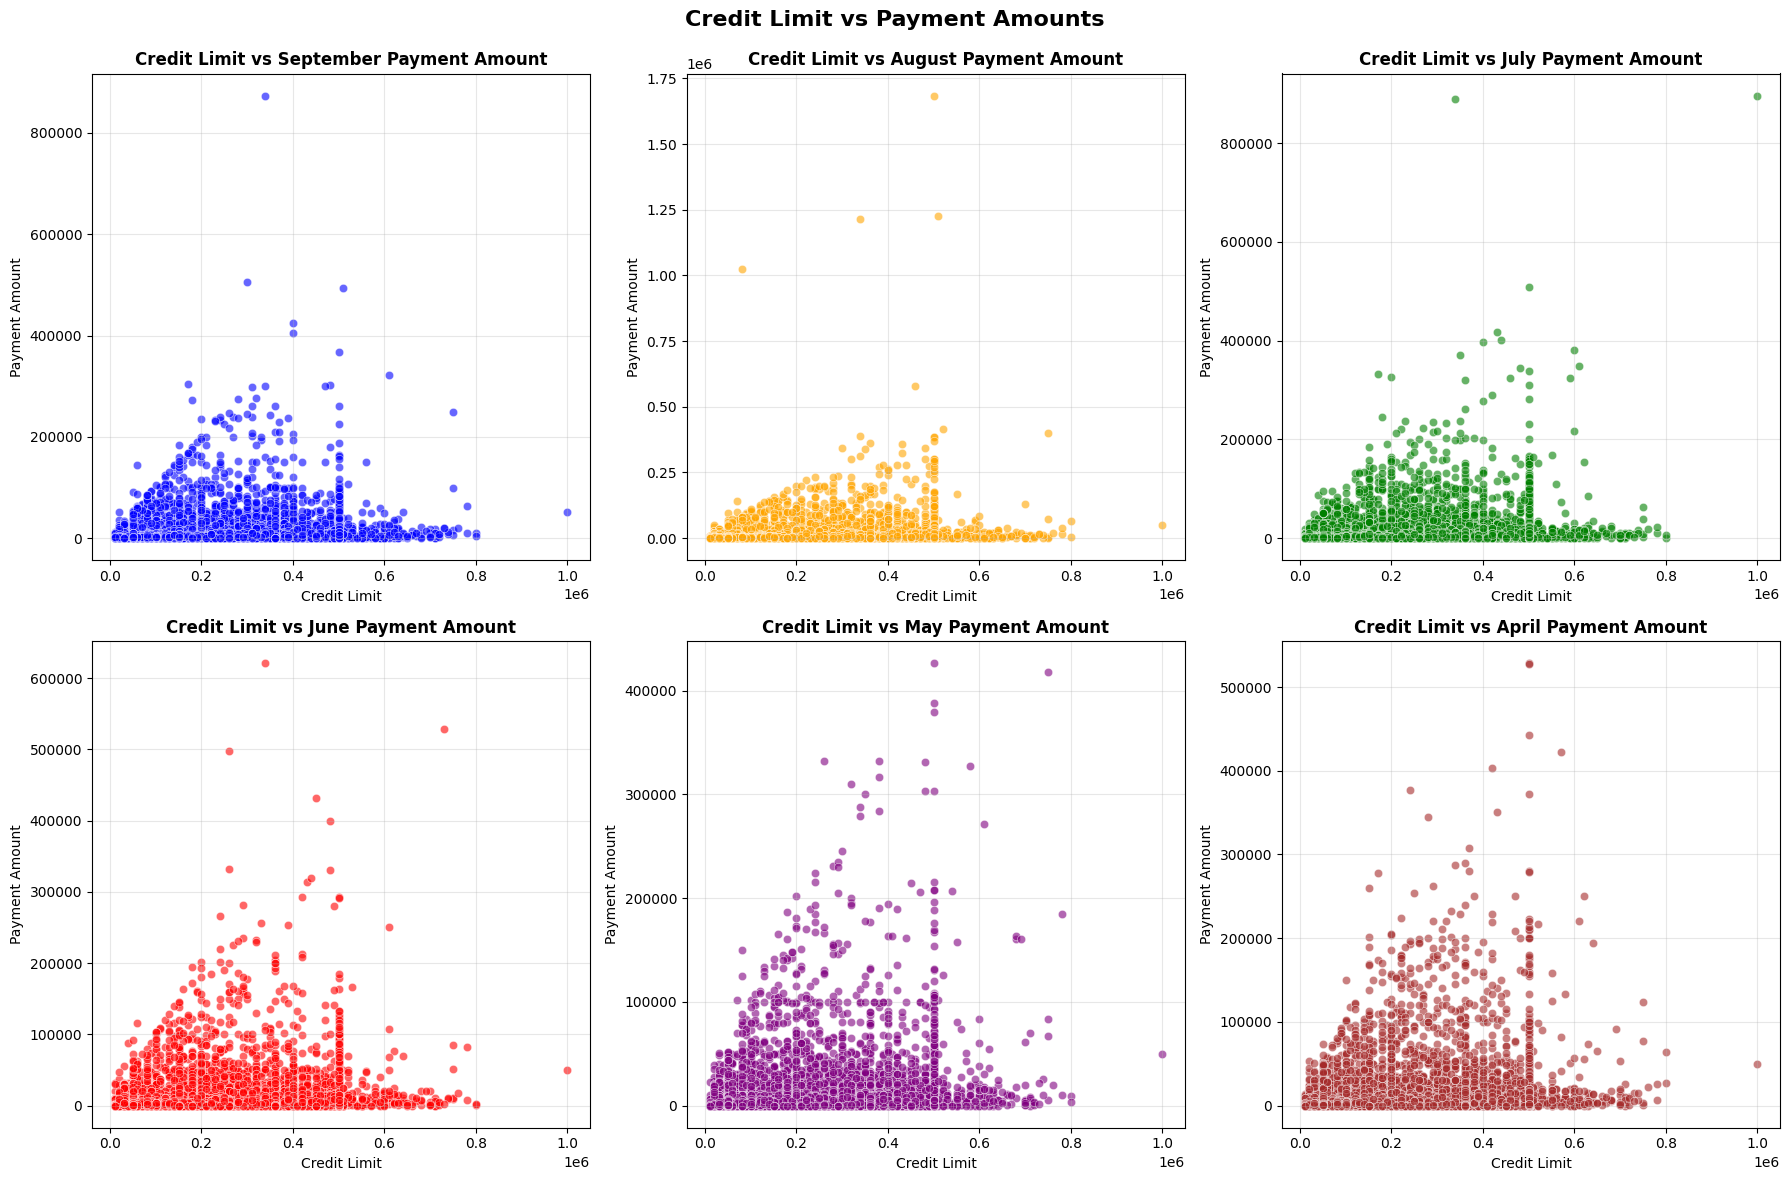

In [34]:
# Scatter plot for Credit limit vs payment amounts
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Credit Limit vs Payment Amounts', fontsize=16, fontweight='bold')
axes = axes.flatten()
# Define payment amount columns and colors
pay_amt_columns = ['Sept_Pay_Amt', 'Aug_Pay_Amt', 'July_Pay_Amt', 'June_Pay_Amt', 'May_Pay_Amt', 'Apr_Pay_Amt']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
month_names = ['September', 'August', 'July', 'June', 'May', 'April']
for i, (col, color, month) in enumerate(zip(pay_amt_columns, colors, month_names)):
    sns.scatterplot(data=df, x='Credit_Limit', y=col, alpha=0.6, color=color, ax=axes[i])
    axes[i].set_title(f'Credit Limit vs {month} Payment Amount', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Credit Limit', fontsize=10)
    axes[i].set_ylabel('Payment Amount', fontsize=10)
    axes[i].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(num_vs_num_relationship_outputs, 'credit_limit_vs_payment_amounts.png'))
plt.show()

- **Lower Payment Correlation**: Payment amounts show a weaker positive correlation with credit limits compared to bill amounts, with most payments clustering near zero regardless of credit limit, indicating that many clients make minimal payments even with higher credit limits.
- **Payment Behavior Patterns**: Clients with higher credit limits don't necessarily make proportionally higher payments, suggesting varied payment strategies where some high-limit clients may only make minimum payments while others make substantial payments to manage their debt.

### **Age vs Bill Amounts**

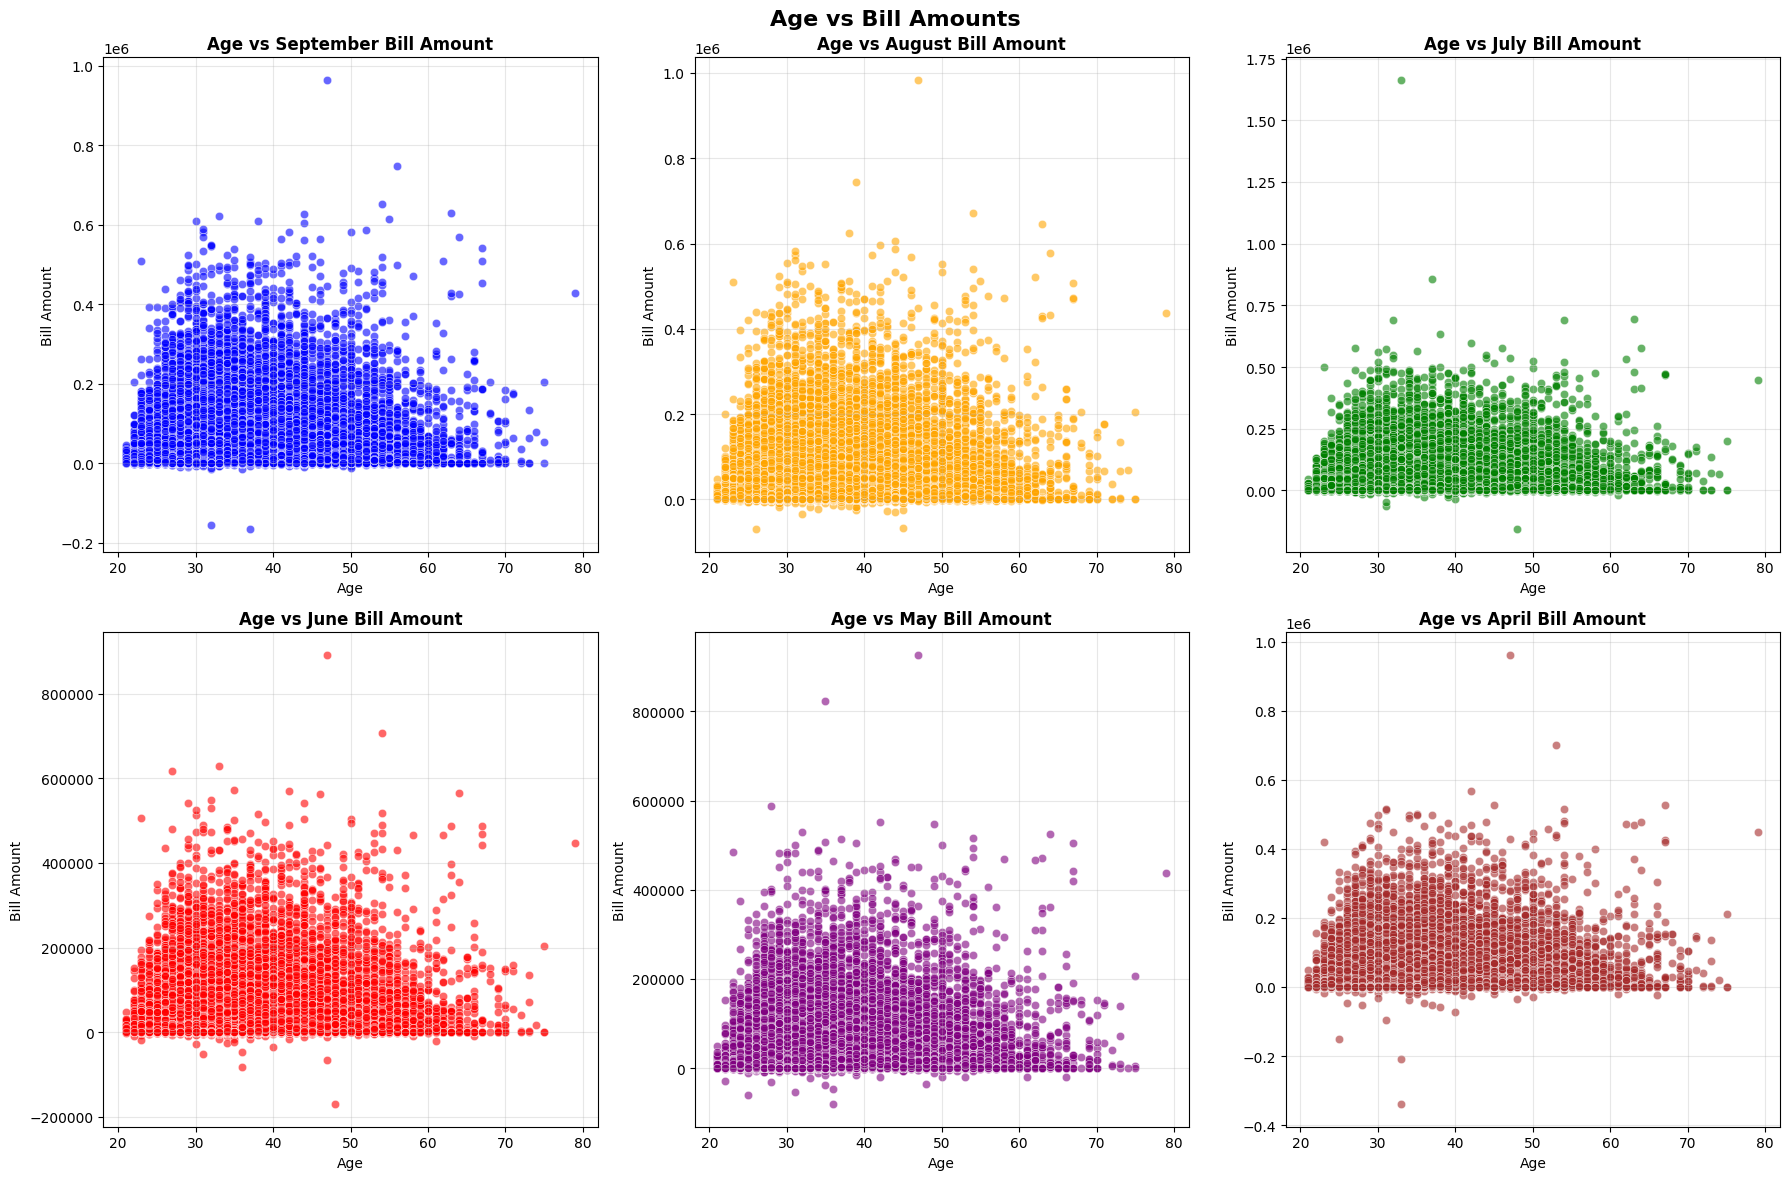

In [35]:
# Scatter plot for Age vs Bill Amounts
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Age vs Bill Amounts', fontsize=16, fontweight='bold')
axes = axes.flatten()
# Define bill amount columns and colors
for i, (col, color, month) in enumerate(zip(bill_amt_columns, colors, month_names)):
    sns.scatterplot(data=df, x='Age', y=col, alpha=0.6, color=color, ax=axes[i])
    axes[i].set_title(f'Age vs {month} Bill Amount', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Age', fontsize=10)
    axes[i].set_ylabel('Bill Amount', fontsize=10)
    axes[i].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(num_vs_num_relationship_outputs, 'age_vs_bill_amounts.png'))
plt.show()

- **Age-Independent Spending**: Bill amounts show no clear correlation with age, with high and low bill amounts distributed fairly evenly across all age groups (20-80 years), indicating that spending behavior is not primarily driven by age demographics.
- **Consistent Usage Patterns**: Younger and older clients exhibit similar bill amount patterns across all months, suggesting that credit card usage and spending habits are more influenced by individual financial circumstances rather than age-related factors.

### **Age vs Payment Amounts**

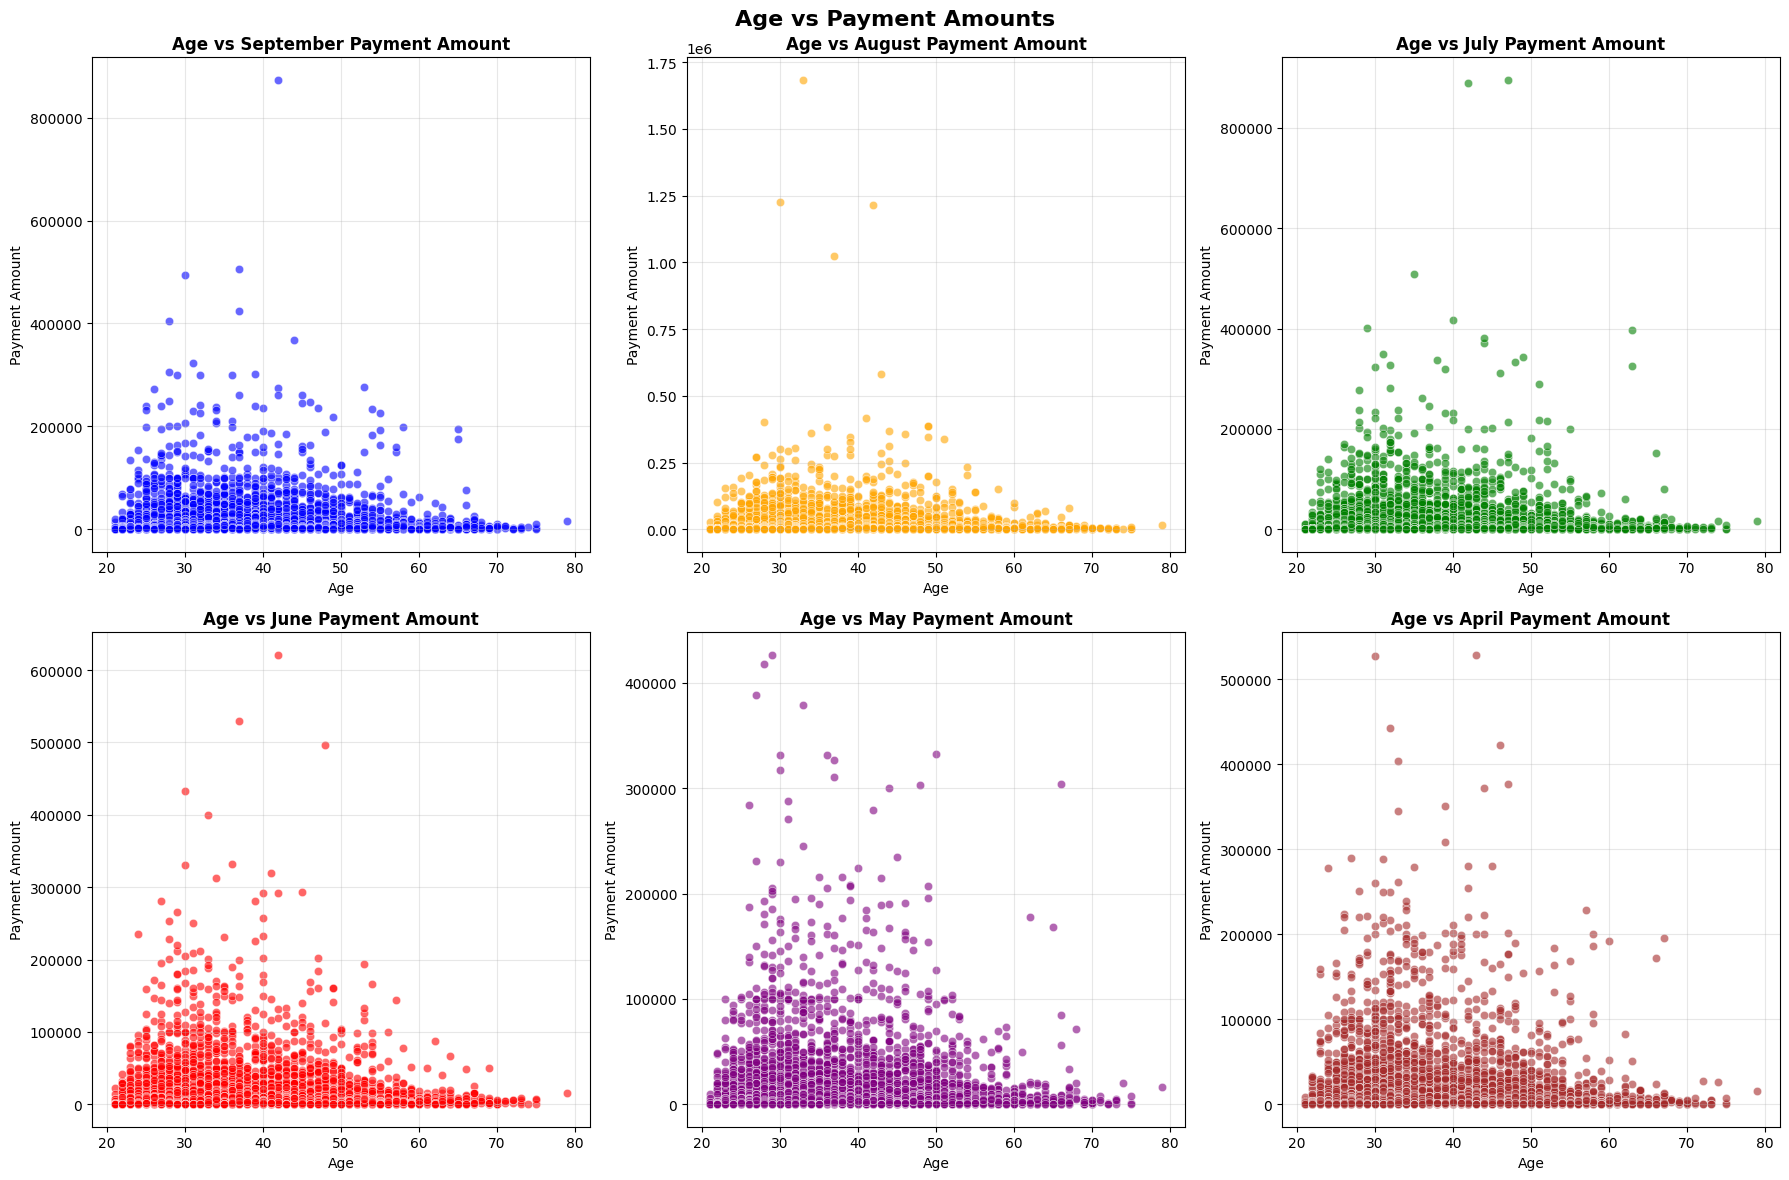

In [36]:
# Scatter plot for Age vs Payment Amounts
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Age vs Payment Amounts', fontsize=16, fontweight='bold')
axes = axes.flatten()
# Define payment amount columns and colors
for i, (col, color, month) in enumerate(zip(pay_amt_columns, colors, month_names)):
    sns.scatterplot(data=df, x='Age', y=col, alpha=0.6, color=color, ax=axes[i])
    axes[i].set_title(f'Age vs {month} Payment Amount', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Age', fontsize=10)
    axes[i].set_ylabel('Payment Amount', fontsize=10)
    axes[i].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(num_vs_num_relationship_outputs, 'age_vs_payment_amounts.png'))
plt.show()

- **Age-Independent Payment Behavior**: Payment amounts show no significant correlation with age, with both young and older clients displaying similar payment patterns across all months, indicating that payment behavior is driven by individual financial management rather than age demographics.
- **Consistent Low Payment Trend**: Regardless of age group, most clients make relatively low payments (clustered near zero), with only a small percentage making substantial payments, suggesting that minimum payment behavior is prevalent across all age ranges.

### **Bill Amounts vs Payment Amounts**

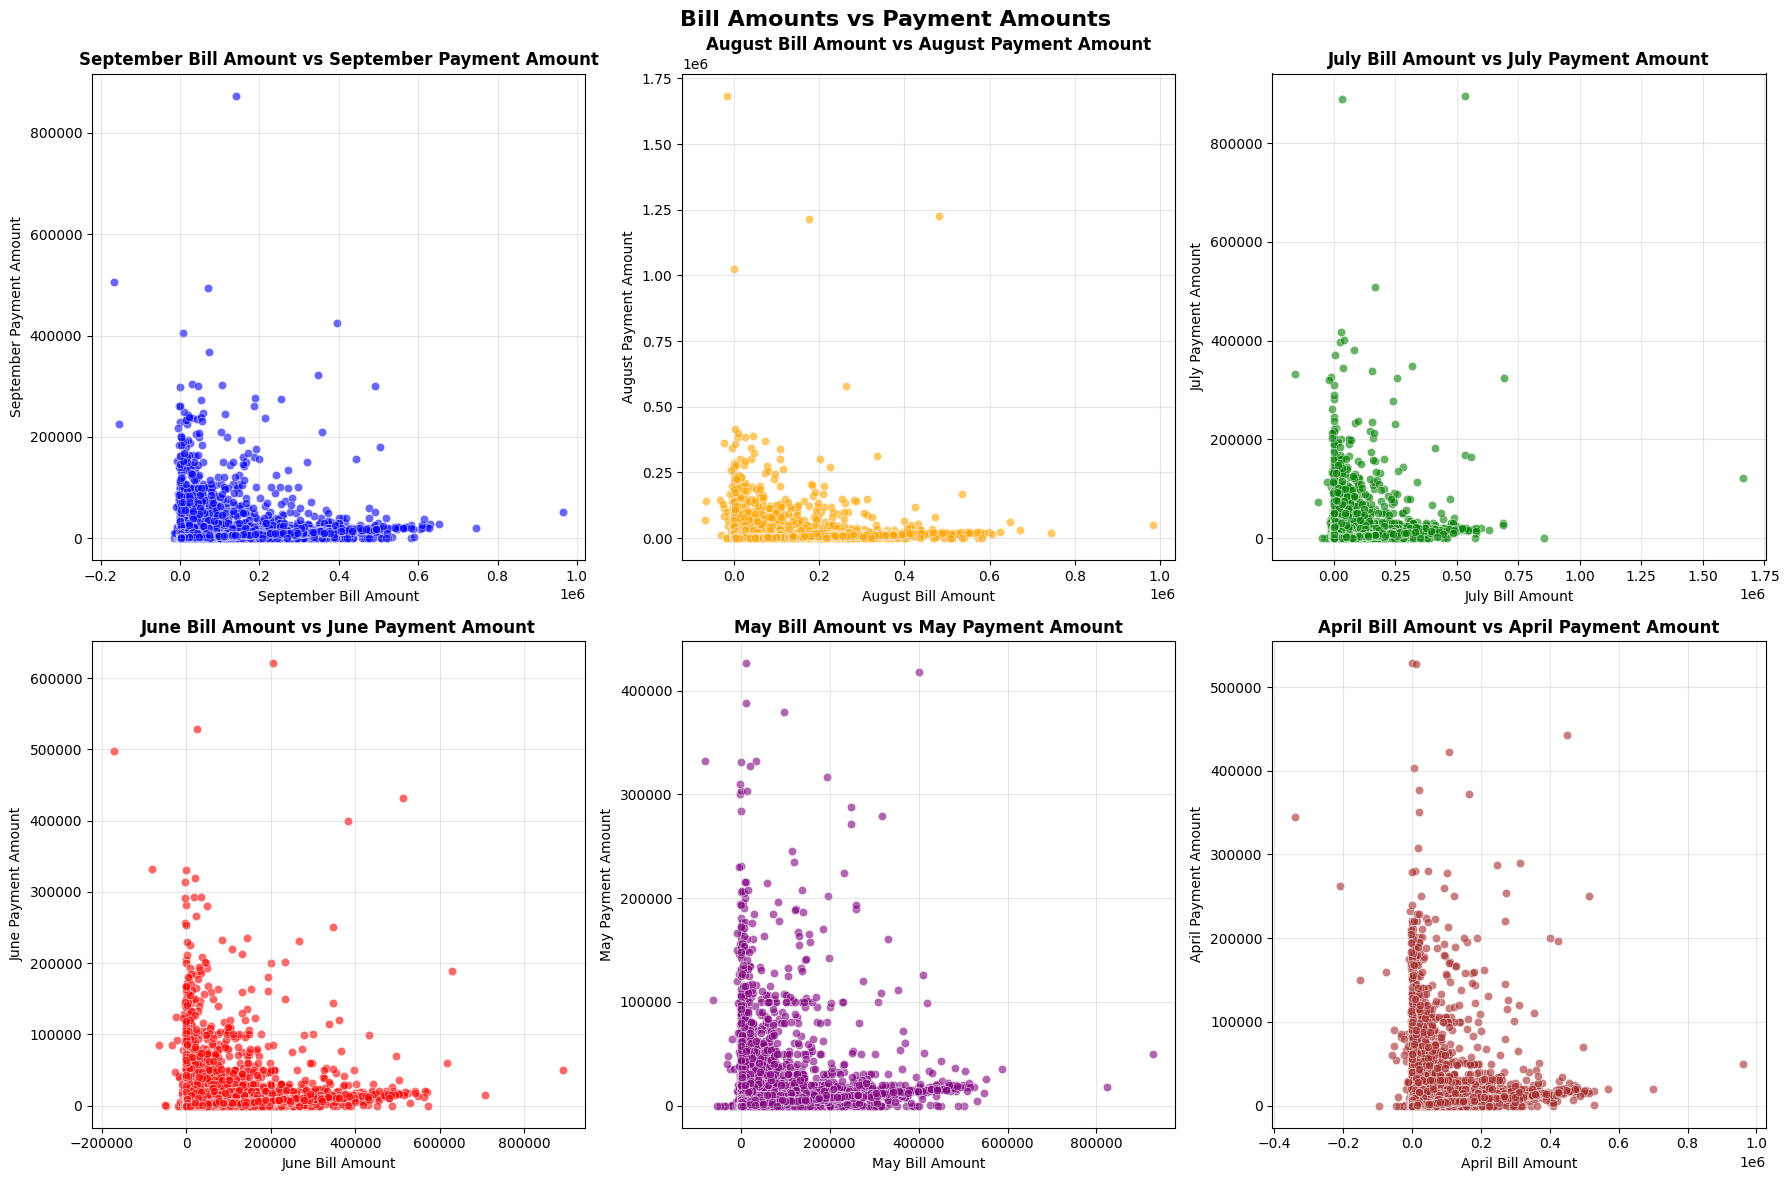

In [37]:
# Scatter plot for Bill Amounts vs Payment Amounts
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Bill Amounts vs Payment Amounts', fontsize=16, fontweight='bold')
axes = axes.flatten()
# Define bill and payment amount columns and colors
for i, (bill_col, pay_col, color, month) in enumerate(zip(bill_amt_columns, pay_amt_columns, colors, month_names)):
    sns.scatterplot(data=df, x=bill_col, y=pay_col, alpha=0.6, color=color, ax=axes[i])
    axes[i].set_title(f'{month} Bill Amount vs {month} Payment Amount', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(f'{month} Bill Amount', fontsize=10)
    axes[i].set_ylabel(f'{month} Payment Amount', fontsize=10)
    axes[i].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(num_vs_num_relationship_outputs, 'bill_vs_payment_amounts.png'))
plt.show()

- **Weak Payment-Bill Relationship**: There's a weak positive correlation between bill amounts and payment amounts, with many clients making minimal payments regardless of their bill size, indicating potential financial stress or minimum payment behavior patterns.
- **Payment Clustering Near Zero**: Most payment amounts cluster near zero even for high bill amounts, suggesting that many clients consistently make only minimum payments, which could be a risk indicator for potential defaults and highlights the need for payment behavior analysis in credit risk assessment.

### **Bill Amounts vs Bill Amounts**

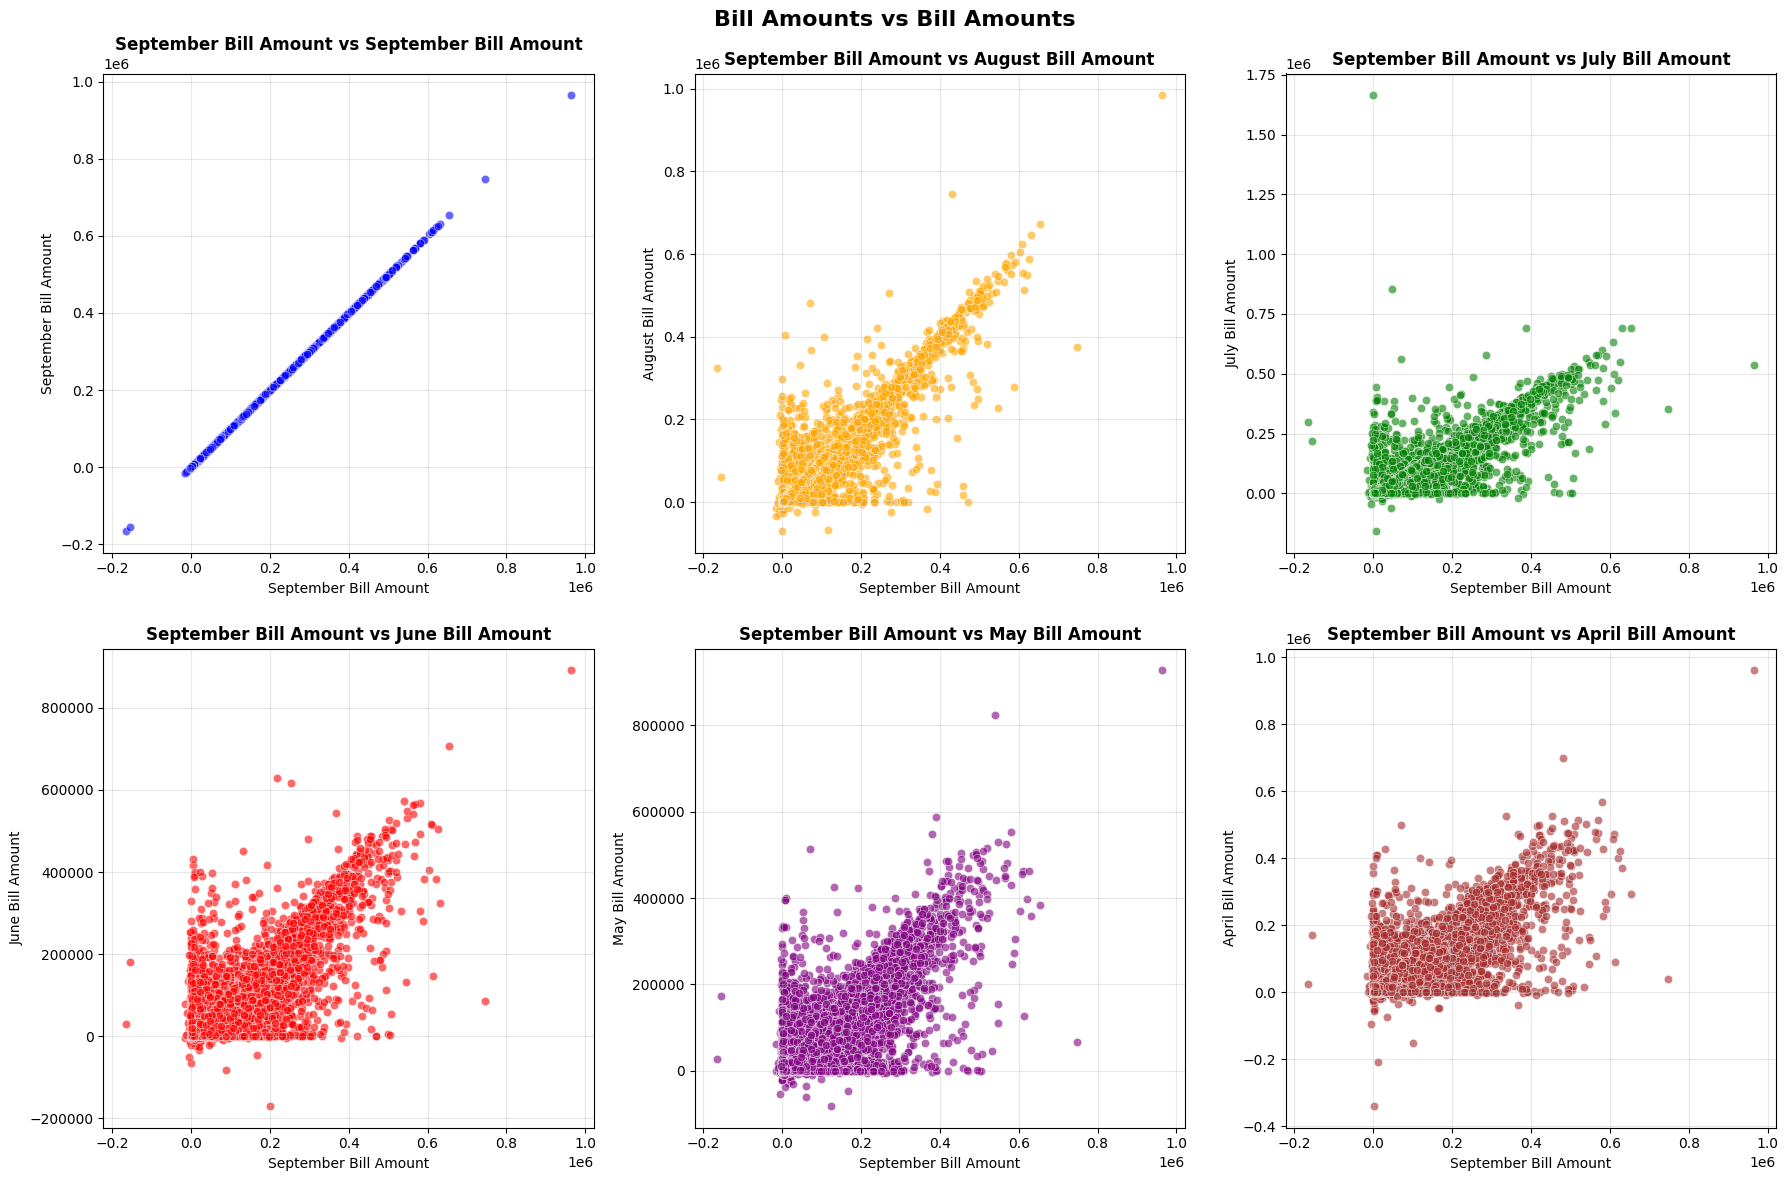

In [38]:
# Scatter plot for Bill Amounts vs Bill Amounts
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Bill Amounts vs Bill Amounts', fontsize=16, fontweight='bold')
axes = axes.flatten()
# Define bill amount columns and colors
for i, (col, color, month) in enumerate(zip(bill_amt_columns, colors, month_names)):
    sns.scatterplot(data=df, x='Sept_Bill_Amt', y=col, alpha=0.6, color=color, ax=axes[i])
    axes[i].set_title(f'September Bill Amount vs {month} Bill Amount', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('September Bill Amount', fontsize=10)
    axes[i].set_ylabel(f'{month} Bill Amount', fontsize=10)
    axes[i].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(num_vs_num_relationship_outputs, 'bill_amounts_vs_bill_amounts.png'))
plt.show()

- **Strong Monthly Bill Correlation**: There's a strong positive correlation between bill amounts across different months, with clients showing consistent billing patterns, indicating stable credit usage behavior over time.
- **Persistent Usage Patterns**: Clients with high bills in September tend to maintain similarly high bills in other months, and those with low bills remain consistently low, suggesting that credit utilization patterns are relatively stable and predictable across the 6-month period.

### **Payment Amounts vs Payment Amounts**

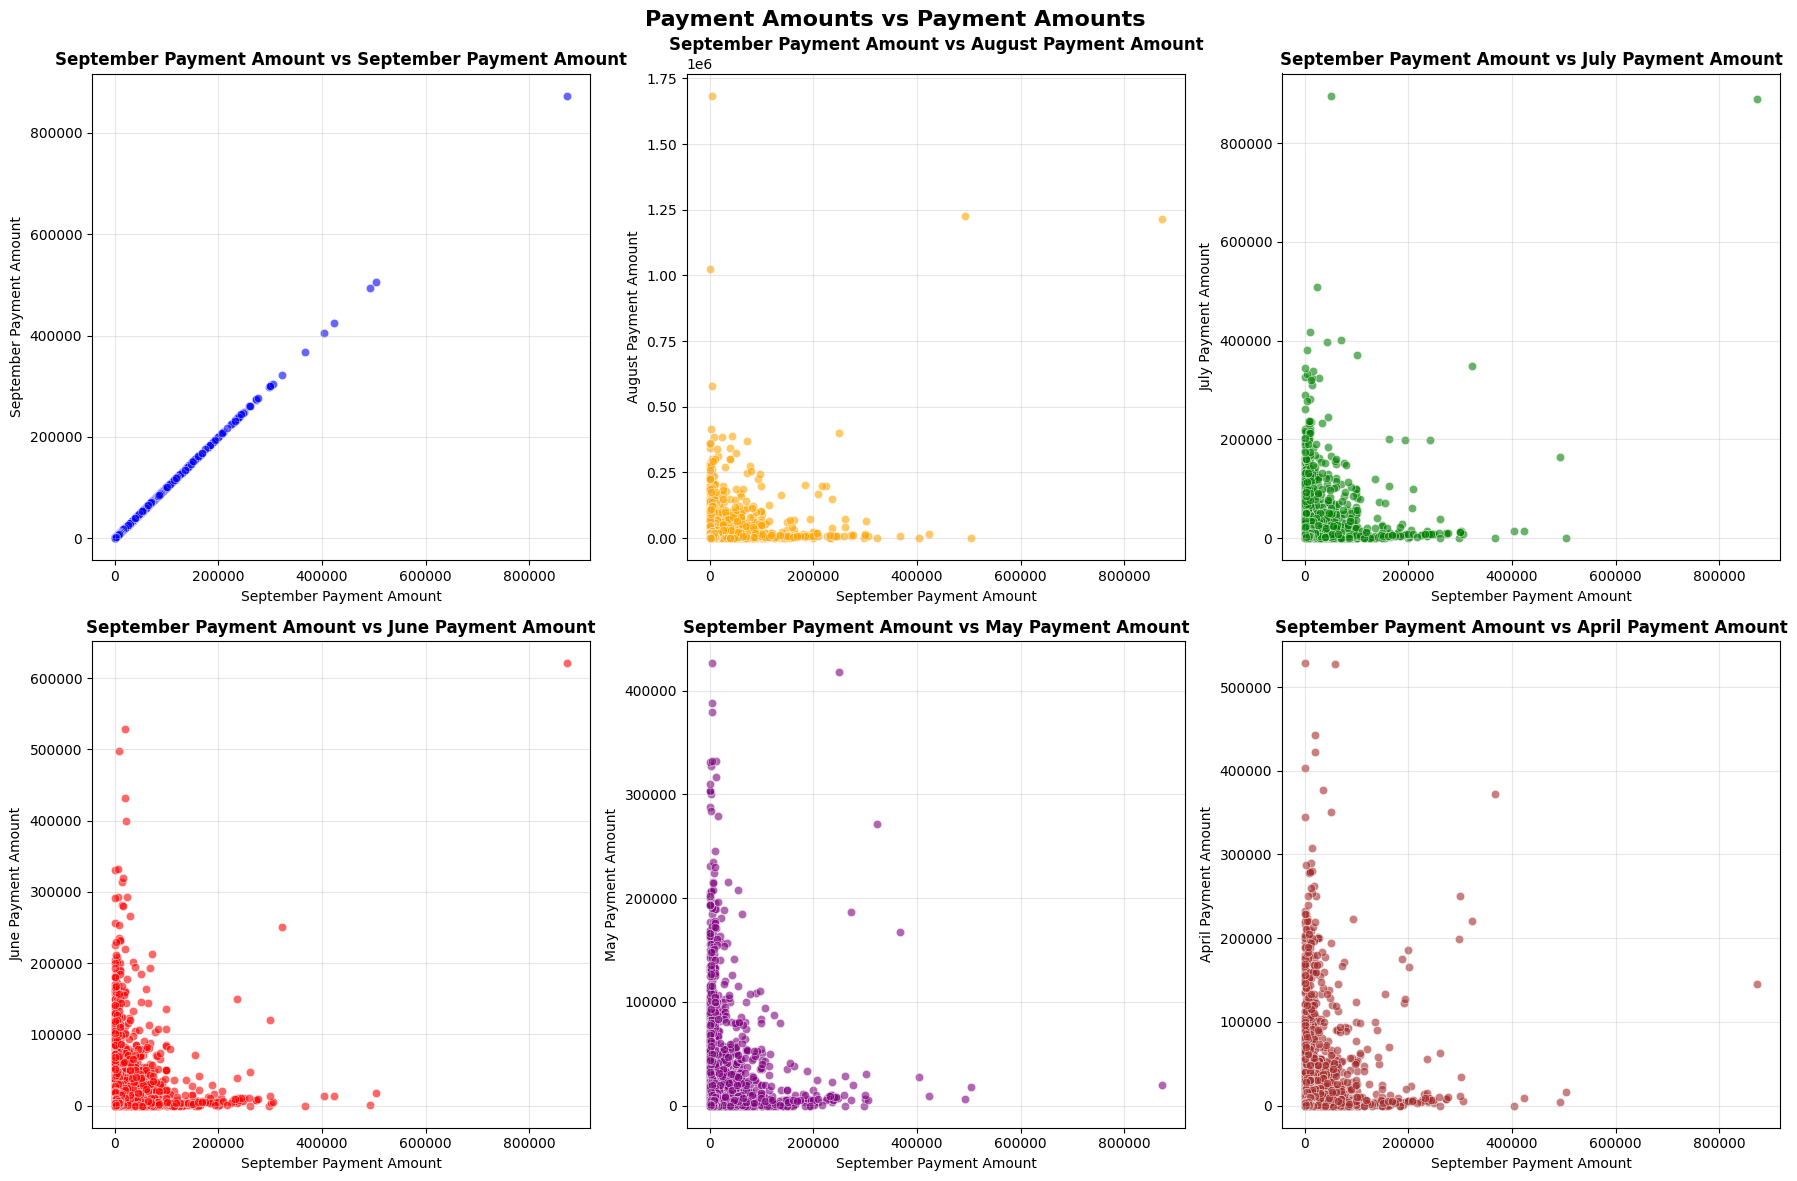

In [39]:
# Scatter plot for Payment Amounts vs Payment Amounts
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Payment Amounts vs Payment Amounts', fontsize=16, fontweight='bold')
axes = axes.flatten()
# Define payment amount columns and colors
for i, (col, color, month) in enumerate(zip(pay_amt_columns, colors, month_names)):
    sns.scatterplot(data=df, x='Sept_Pay_Amt', y=col, alpha=0.6, color=color, ax=axes[i])
    axes[i].set_title(f'September Payment Amount vs {month} Payment Amount', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('September Payment Amount', fontsize=10)
    axes[i].set_ylabel(f'{month} Payment Amount', fontsize=10)
    axes[i].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(num_vs_num_relationship_outputs, 'payment_amounts_vs_payment_amounts.png'))
plt.show()

- **Moderate Payment Consistency**: Payment amounts show moderate positive correlation across months, but with more variability compared to bill amounts, indicating that while some clients maintain consistent payment patterns, others show irregular payment behavior that could signal financial instability.
- **Zero-Payment Clustering**: A significant concentration of data points at zero across all months suggests many clients frequently make no payments, which combined with inconsistent payment patterns, could be strong indicators of potential default risk and should be considered in credit risk modeling.

### **Correlation Matrix for Numerical Variables**

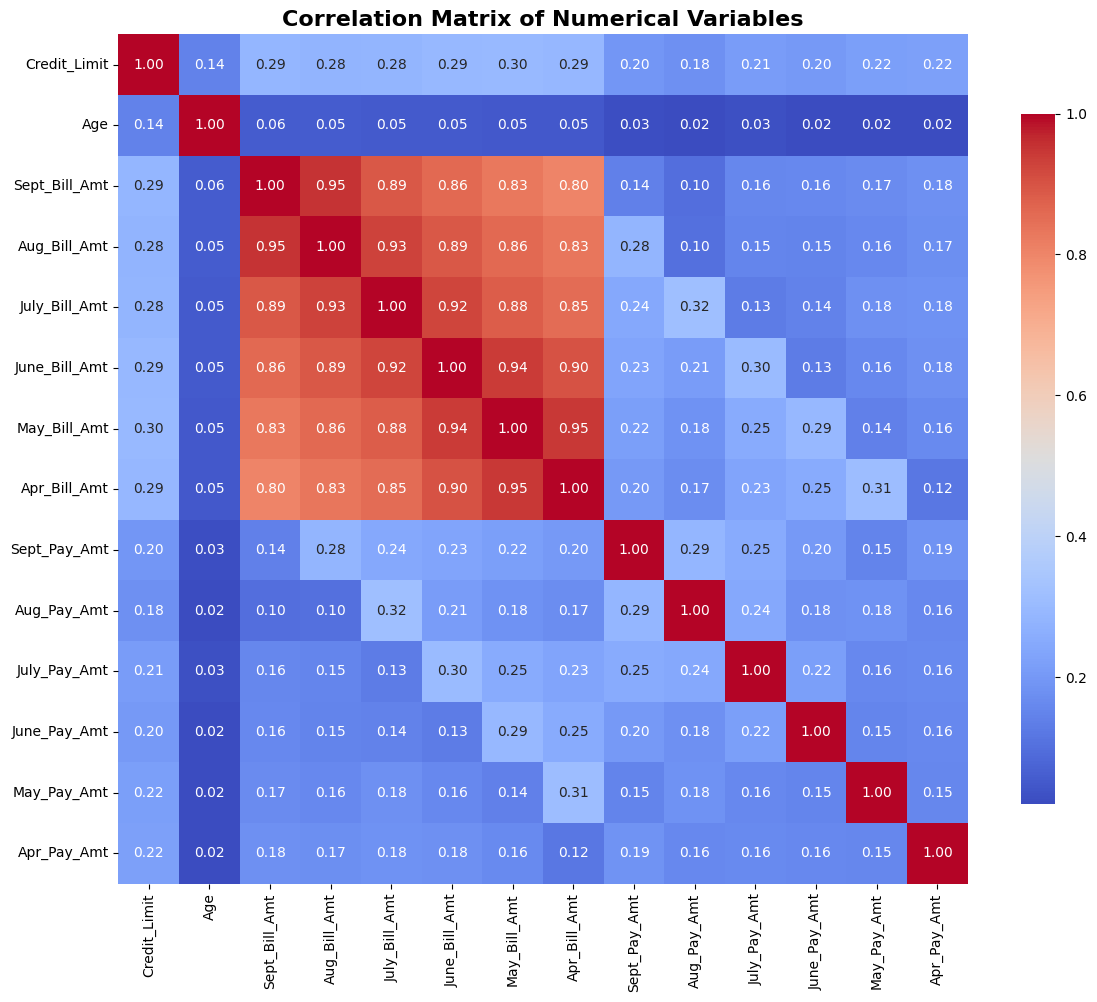

In [40]:
# Correlation Matrix for Numerical Variables
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(os.path.join(num_vs_num_relationship_outputs, 'correlation_matrix_numerical.png'))
plt.show()

- **Strong Bill Amount Correlations**: Bill amounts across different months show very strong positive correlations (0.8-0.95), indicating highly consistent billing patterns and suggesting that clients maintain relatively stable credit usage behavior over the 6-month period.
- **Weak Payment-Bill Relationships**: Payment amounts show much weaker correlations with bill amounts (0.0-0.3), and Credit_Limit shows minimal correlation with most variables, indicating that payment behavior and credit limits operate somewhat independently from billing patterns, which could be important distinguishing features for default prediction modeling.

### **Key Observations from Numerical vs Numerical Relationships**

- **Credit Limit Independence**: 
    - Credit limits show weak correlations with age, indicating that age alone doesn't determine credit approval amounts.
    - There's a positive but moderate relationship between credit limits and bill amounts, suggesting clients utilize portions of their available credit consistently.
    - Payment behavior appears largely independent of credit limit levels, with most clients making minimal payments regardless of their credit capacity.

- **Temporal Consistency Patterns**:
    - **Bill Amounts**: Show very strong inter-month correlations (0.8-0.95), indicating highly stable and predictable credit usage patterns over the 6-month period.
    - **Payment Amounts**: Display moderate correlations across months but with more variability than bills, suggesting inconsistent payment behavior that could signal financial instability.

- **Age-Independent Financial Behavior**:
    - Both spending (bill amounts) and payment patterns show no significant correlation with age across all months.
    - This suggests that credit usage and payment behavior are driven more by individual financial circumstances than demographic age factors.

- **Payment-Bill Relationship Insights**:
    - Weak correlations between bill amounts and payment amounts indicate that many clients don't adjust their payments proportionally to their spending.
    - High concentration of zero payments regardless of bill size suggests prevalent minimum payment behavior, which could be a strong default risk indicator.

- **Risk Assessment Implications**:
    - The independence of payment behavior from other factors (age, credit limit, bill amounts) makes payment patterns particularly valuable for risk modeling.
    - Consistent billing patterns combined with inconsistent payment patterns could effectively identify clients at higher default risk.
    - Zero-payment clustering across multiple months should be considered a strong predictor of potential default behavior.

## **Categorical vs Numerical Relationships**

In [41]:
# Createing Categorical vs numerical feature Relationship visualization outputs directory
cat_vs_num_relationship_outputs = os.path.join(feature_relationship_outputs, "categorical_vs_numerical_relationships")
os.makedirs(cat_vs_num_relationship_outputs, exist_ok=True)

### **Gender vs Credit Limit**

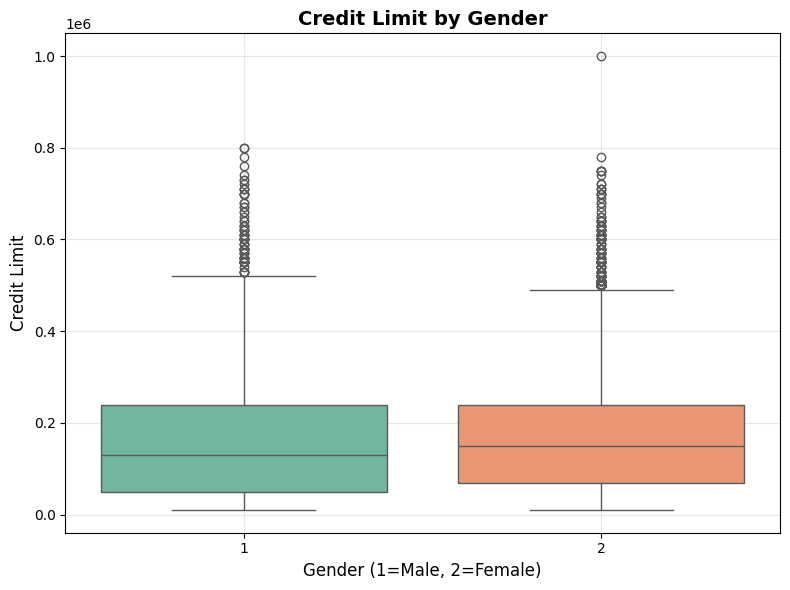

In [42]:
# Boxplot for Gender vs Credit Limit
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Credit_Limit', palette='Set2')
plt.title('Credit Limit by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender (1=Male, 2=Female)', fontsize=12)
plt.ylabel('Credit Limit', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(cat_vs_num_relationship_outputs, 'gender_vs_credit_limit_boxplot.png'))
plt.show()

- **Similar Credit Limit Distributions**: Both males and females show very similar credit limit distributions, with median credit limits around 150,000 NTD and comparable interquartile ranges, suggesting that gender does not significantly influence credit limit assignment.
- **Outlier Patterns**: Both genders have similar outlier distributions above the upper whiskers, indicating that high credit limit assignments (above ~500,000 NTD) occur at similar rates regardless of gender, demonstrating gender-neutral credit evaluation policies.

### **Gender vs Bill Amounts**

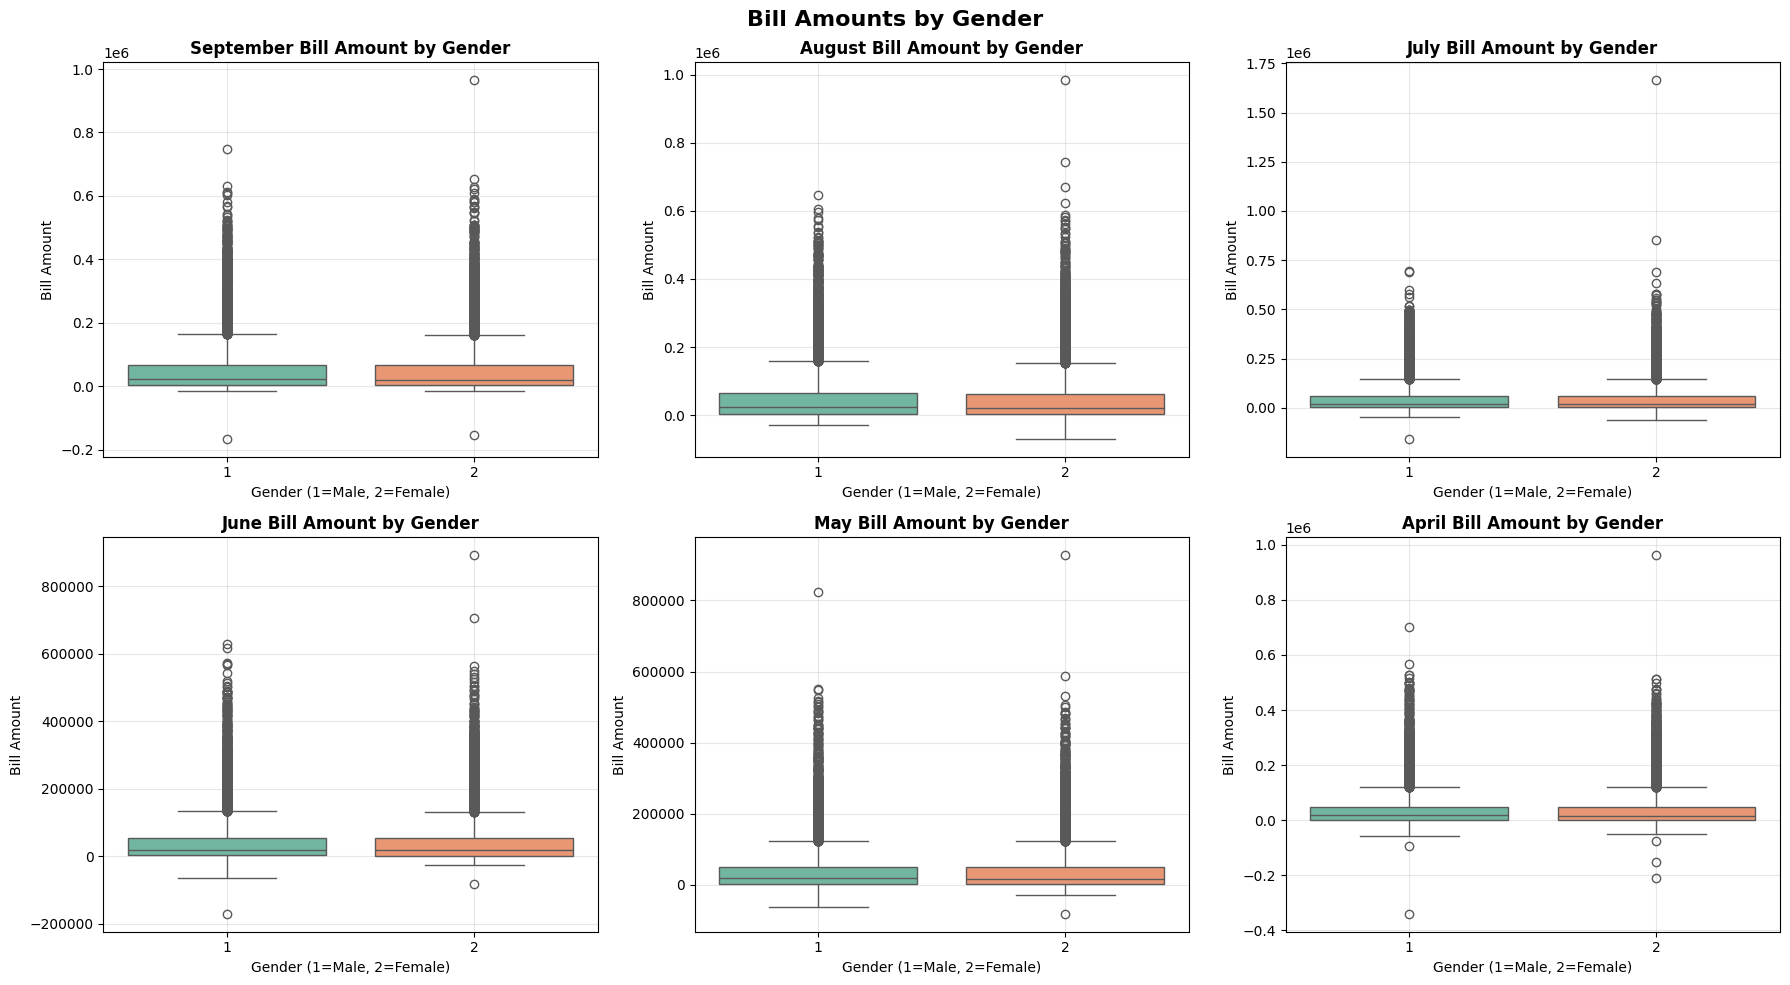

In [43]:
# Boxplots for Gender vs Bill Amounts
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Bill Amounts by Gender', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, (col, color, month) in enumerate(zip(bill_amt_columns, colors, month_names)):
    sns.boxplot(data=df, x='Gender', y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{month} Bill Amount by Gender', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Gender (1=Male, 2=Female)', fontsize=10)
    axes[i].set_ylabel('Bill Amount', fontsize=10)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(cat_vs_num_relationship_outputs, 'gender_vs_bill_amounts_boxplots.png'))
plt.show()

- **Consistent Gender Patterns**: Across all six months (September to April), both males and females show remarkably similar bill amount distributions, with nearly identical median values, quartile ranges, and outlier patterns, indicating no significant gender-based differences in credit usage behavior.
- **Negative Bill Amounts**: Both genders show some negative bill amounts (particularly visible in September and June), which likely represent overpayments or account credits, and these occur at similar frequencies for both groups, suggesting consistent billing practices regardless of gender.

### **Gender vs Payment Amounts**

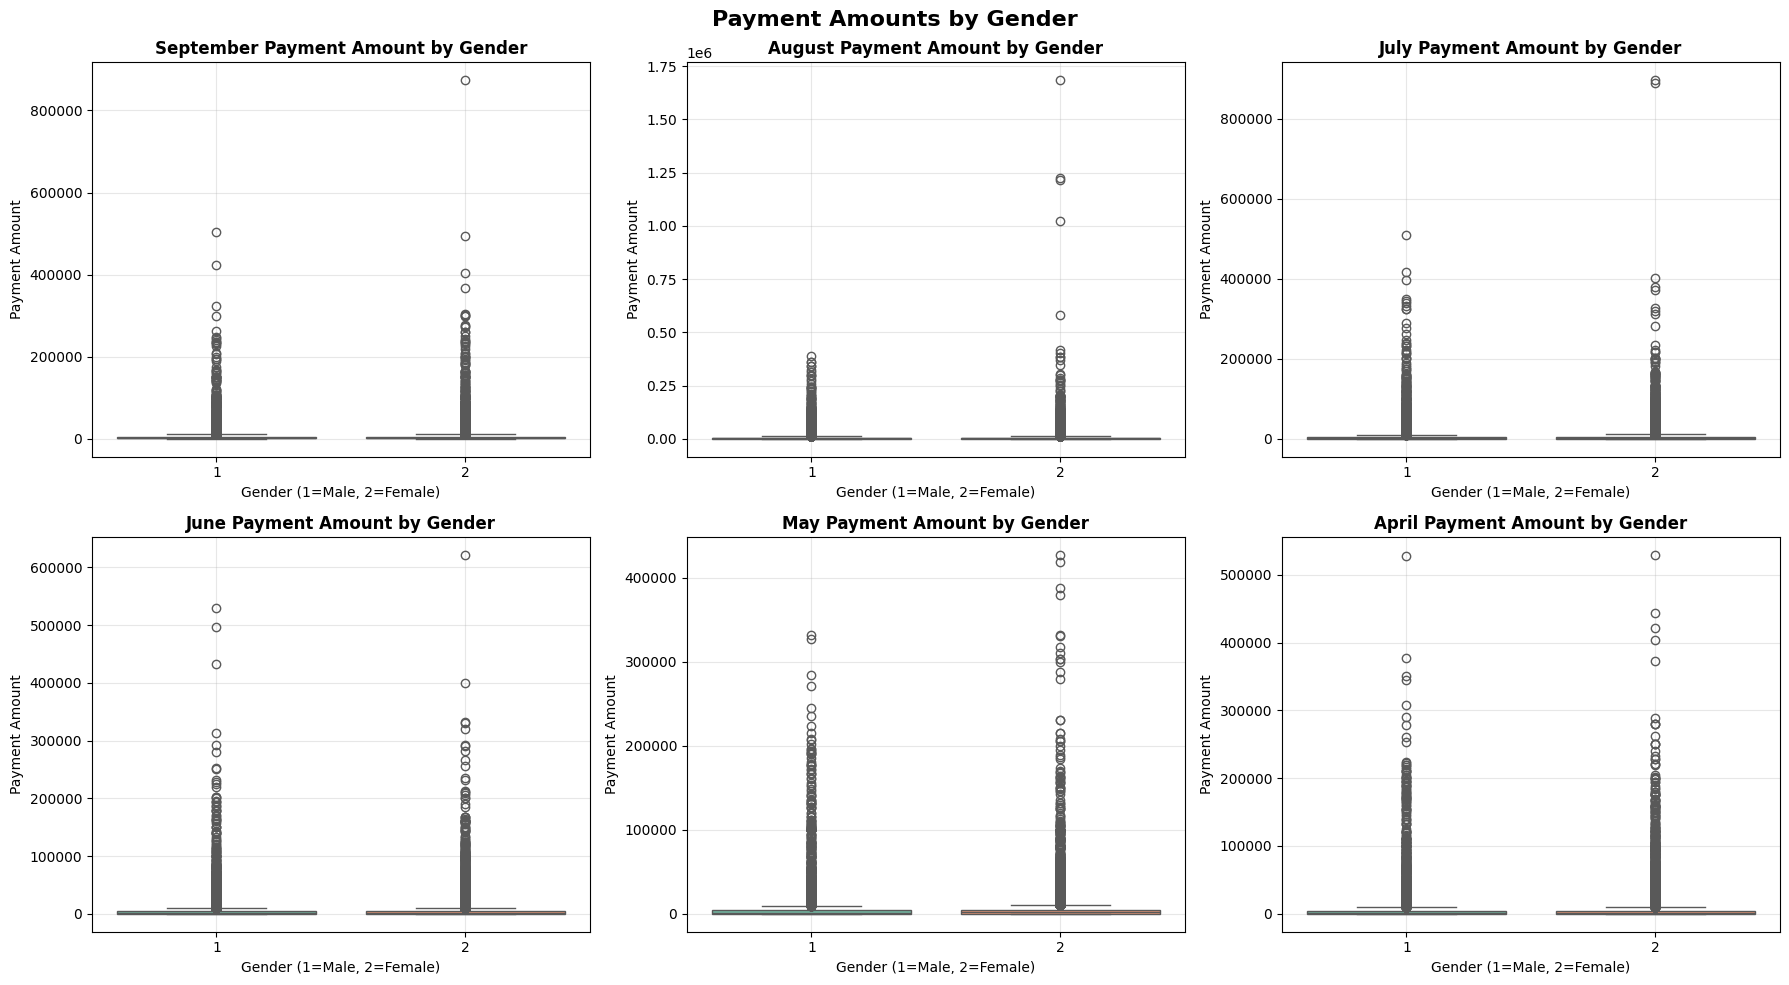

In [44]:
# Boxplots for Gender vs Payment Amounts
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Payment Amounts by Gender', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, (col, color, month) in enumerate(zip(pay_amt_columns, colors, month_names)):
    sns.boxplot(data=df, x='Gender', y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{month} Payment Amount by Gender', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Gender (1=Male, 2=Female)', fontsize=10)
    axes[i].set_ylabel('Payment Amount', fontsize=10)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(cat_vs_num_relationship_outputs, 'gender_vs_payment_amounts_boxplots.png'))
plt.show()

- **Gender-Neutral Payment Behavior**: Across all six months (September to April), both males and females demonstrate nearly identical payment amount distributions, with similar median values around zero and comparable quartile ranges, indicating that gender does not influence payment behavior patterns.
- **High Concentration at Zero Payments**: Both genders show a very high concentration of zero or near-zero payments (visible as compressed boxes near the baseline), with substantial outliers representing clients who make significant payments, suggesting that most clients make minimal payments regardless of gender while a minority make large payments to pay down balances.

### **Education Level vs Credit Limit**

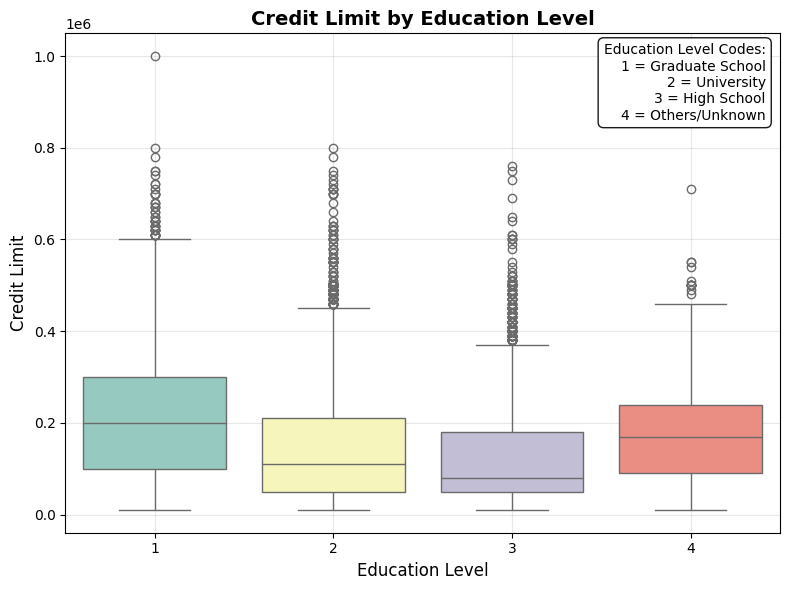

In [45]:
# Merge Education_Level values 0, 4, 5, 6 as 4 ("Others/Unknown")
df['Education_Level'] = df['Education_Level'].replace({0: 4, 5: 4, 6: 4})

# Boxplot for Education Level vs Credit Limit
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Education_Level', y='Credit_Limit', palette='Set3')
plt.title('Credit Limit by Education Level', fontsize=14, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Credit Limit', fontsize=12)
plt.grid(True, alpha=0.3)

# Add information box for education level codes
edu_info = (
    "Education Level Codes:\n"
    "1 = Graduate School\n"
    "2 = University\n"
    "3 = High School\n"
    "4 = Others/Unknown"
)
plt.gca().text(
    0.98, 0.98, edu_info,
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.4", facecolor='white', alpha=0.9, edgecolor='black')
)

plt.tight_layout()
plt.savefig(os.path.join(cat_vs_num_relationship_outputs, 'education_level_vs_credit_limit_boxplot.png'))
plt.show()

- **Education Level Impact on Credit Limits**: Graduate school holders (Level 1) receive the highest median credit limits (~200,000 NTD), followed by Others/Unknown (Level 4) and University graduates (Level 2), while High School graduates (Level 3) receive the lowest median credit limits (~150,000 NTD), indicating that education level is a significant factor in credit limit determination.
- **Outlier Distribution Patterns**: Higher education levels (Graduate School and University) show more frequent high-value outliers above 600,000 NTD, suggesting that advanced education credentials enable access to premium credit products, while High School graduates have fewer extreme outliers, indicating more conservative credit limit assignments.

### **Education Level vs Bill Amounts**

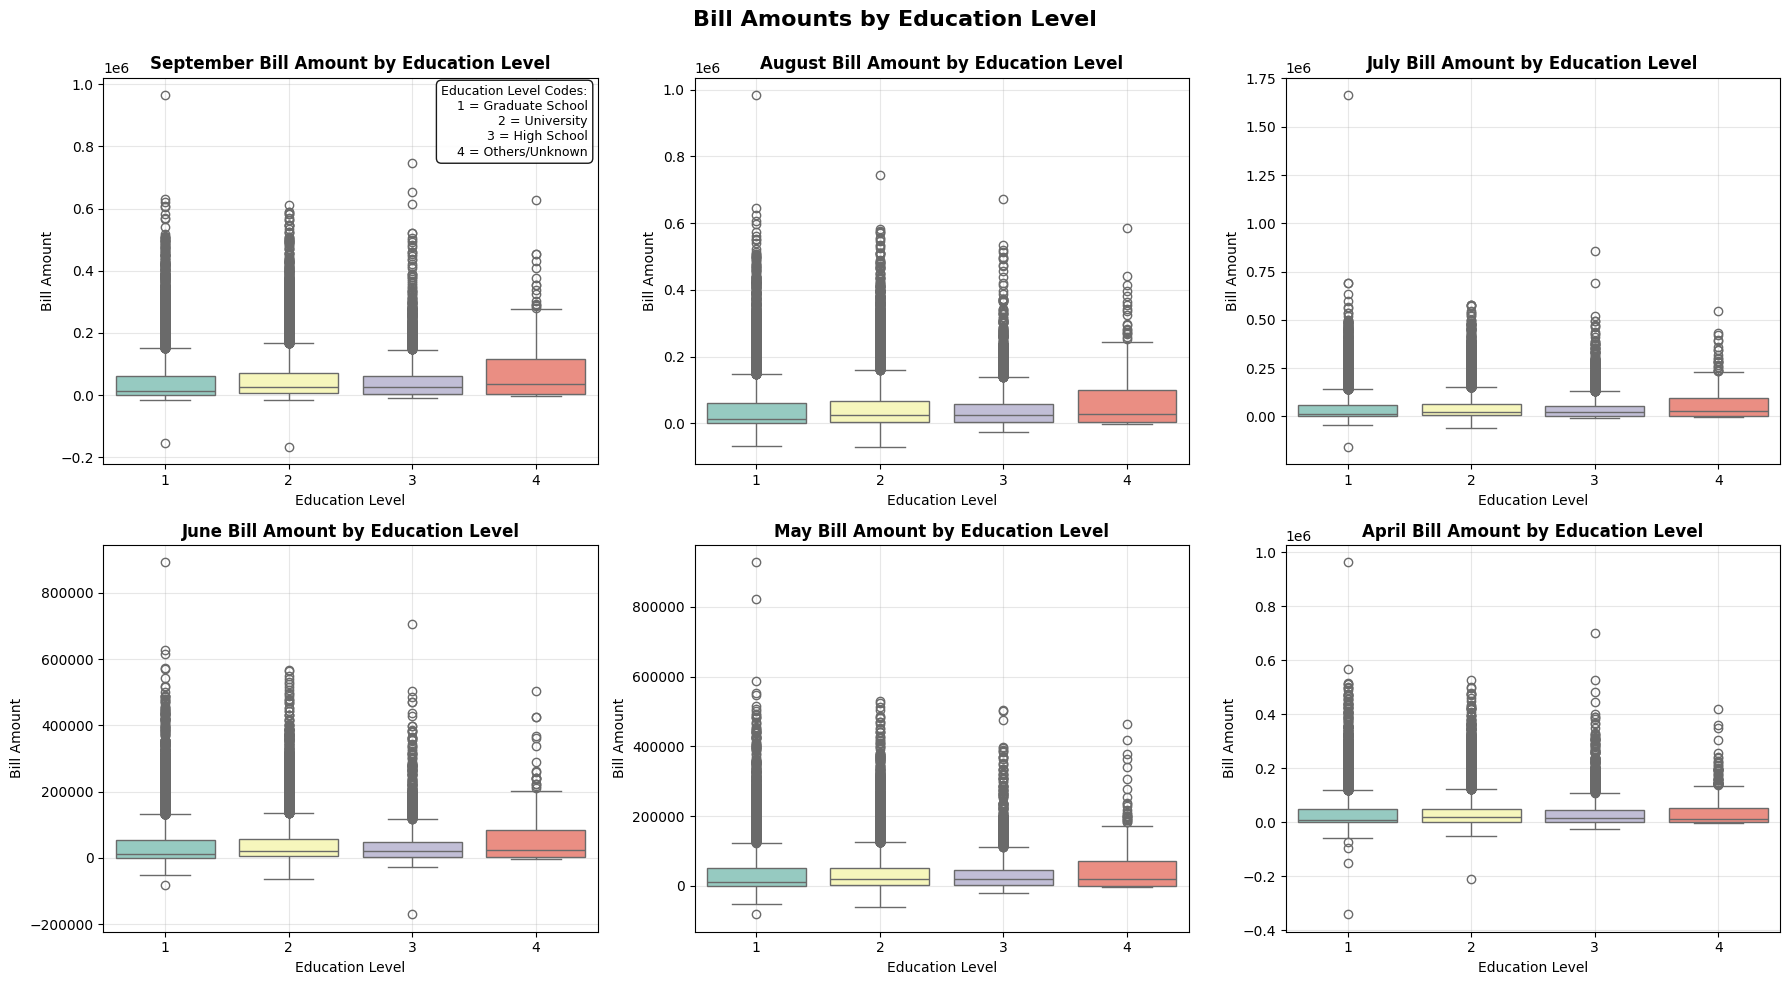

In [46]:
# Boxplots for Education Level vs Bill Amounts
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Bill Amounts by Education Level', fontsize=16, fontweight='bold')
axes = axes.flatten()

# Education level mapping for info box
edu_info = (
    "Education Level Codes:\n"
    "1 = Graduate School\n"
    "2 = University\n"
    "3 = High School\n"
    "4 = Others/Unknown"
)

for i, (col, color, month) in enumerate(zip(bill_amt_columns, colors, month_names)):
    sns.boxplot(data=df, x='Education_Level', y=col, ax=axes[i], palette='Set3')
    axes[i].set_title(f'{month} Bill Amount by Education Level', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Education Level', fontsize=10)
    axes[i].set_ylabel('Bill Amount', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    # Add info box to top-right of first subplot only
    if i == 0:
        axes[i].text(
            0.98, 0.98, edu_info,
            transform=axes[i].transAxes,
            fontsize=9,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle="round,pad=0.4", facecolor='white', alpha=0.9, edgecolor='black')
        )

plt.tight_layout()
plt.savefig(os.path.join(cat_vs_num_relationship_outputs, 'education_level_vs_bill_amounts_boxplots.png'))
plt.show()

- **Education Level Reflects Credit Usage Patterns**: Across all six months, Graduate School holders (Level 1) and University graduates (Level 2) show higher median bill amounts and more frequent high-value outliers, indicating greater credit utilization that aligns with their higher credit limits, while High School graduates (Level 3) consistently show the most conservative spending patterns.
- **Consistent Spending Hierarchy**: The spending patterns remain remarkably consistent across all months, with Graduate School > University ≈ Others/Unknown > High School in terms of bill amounts, suggesting that education level is a stable predictor of credit usage behavior and financial capacity throughout the year.

### **Education Level vs Payment Amounts**

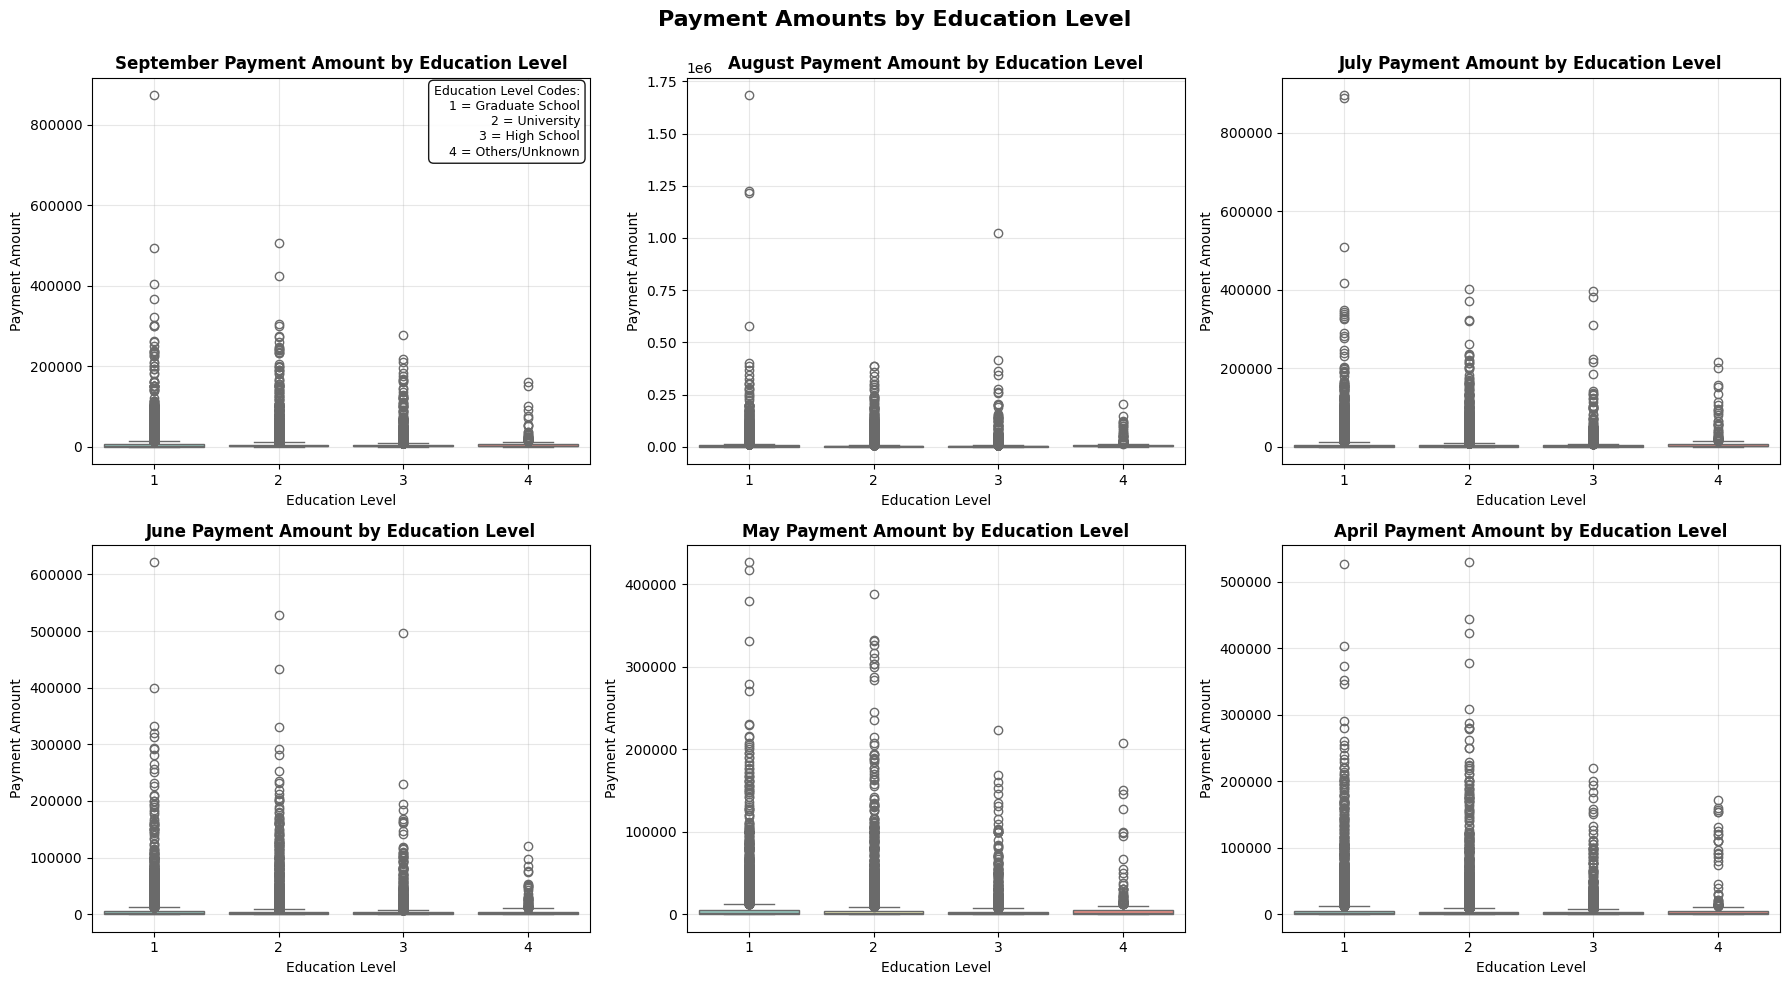

In [47]:
# Boxplots for Education Level vs Payment Amounts
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Payment Amounts by Education Level', fontsize=16, fontweight='bold')
axes = axes.flatten()

# Education level mapping for info box
edu_info = (
    "Education Level Codes:\n"
    "1 = Graduate School\n"
    "2 = University\n"
    "3 = High School\n"
    "4 = Others/Unknown"
)

for i, (col, color, month) in enumerate(zip(pay_amt_columns, colors, month_names)):
    sns.boxplot(data=df, x='Education_Level', y=col, ax=axes[i], palette='Set3')
    axes[i].set_title(f'{month} Payment Amount by Education Level', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Education Level', fontsize=10)
    axes[i].set_ylabel('Payment Amount', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    # Add info box to top-right of first subplot only
    if i == 0:
        axes[i].text(
            0.98, 0.98, edu_info,
            transform=axes[i].transAxes,
            fontsize=9,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle="round,pad=0.4", facecolor='white', alpha=0.9, edgecolor='black')
        )

plt.tight_layout()
plt.savefig(os.path.join(cat_vs_num_relationship_outputs, 'education_level_vs_payment_amounts_boxplots.png'))
plt.show()

- **Education Level Correlates with Payment Capacity**: Graduate School holders (Level 1) and University graduates (Level 2) consistently show higher payment amounts and more frequent large payment outliers across all months, indicating better financial capacity to make substantial payments toward their credit balances, while High School graduates (Level 3) show the most conservative payment patterns.
- **Consistent Zero-Payment Dominance**: All education levels show a strong concentration of zero or minimal payments (compressed boxes near baseline), but higher education levels demonstrate greater ability to make large payments when needed, as evidenced by more frequent and higher-value outliers, suggesting better debt management capabilities among more educated cardholders.

### **Marital Status vs Credit Limit**

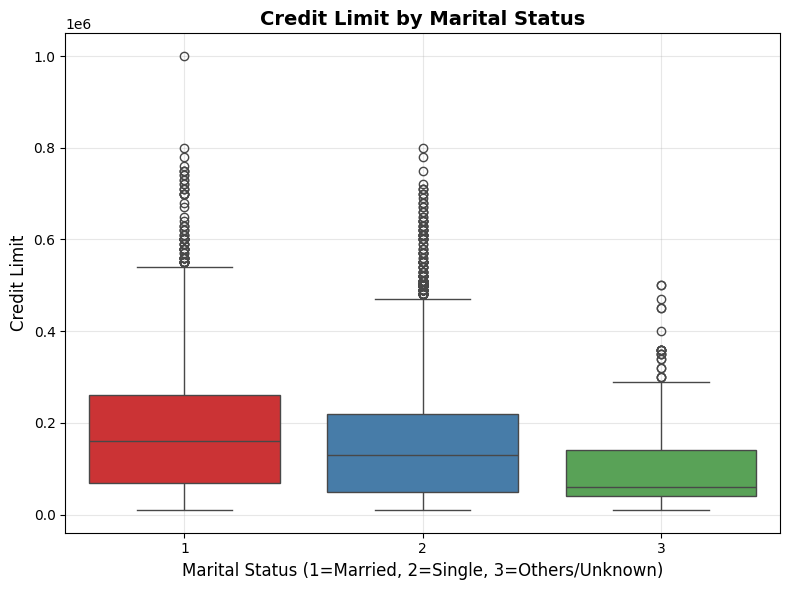

In [48]:
# Merge Marital_Status values 0 and 3 as 3 ("Others/Unknown")
df['Marital_Status'] = df['Marital_Status'].replace({0: 3})

# Boxplot for Marital Status vs Credit Limit
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Marital_Status', y='Credit_Limit', palette='Set1')
plt.title('Credit Limit by Marital Status', fontsize=14, fontweight='bold')
plt.xlabel('Marital Status (1=Married, 2=Single, 3=Others/Unknown)', fontsize=12)
plt.ylabel('Credit Limit', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(cat_vs_num_relationship_outputs, 'marital_status_vs_credit_limit_boxplot.png'))
plt.show()

- **Married Individuals Receive Higher Credit Limits**: Married clients (Status 1) show the highest median credit limits (~170,000 NTD), followed by Single clients (Status 2) with ~140,000 NTD, while Others/Unknown (Status 3) receive the lowest median credit limits (~100,000 NTD), suggesting that marital status is considered a stability factor in credit limit determination.
- **Outlier Distribution Varies by Marital Status**: Married and Single clients show similar patterns of high-value outliers above 500,000 NTD, indicating comparable access to premium credit products, while Others/Unknown category shows fewer and lower-value outliers, reflecting more conservative credit assessments for this less-defined group.

### **Marital Status vs Bill Amounts**

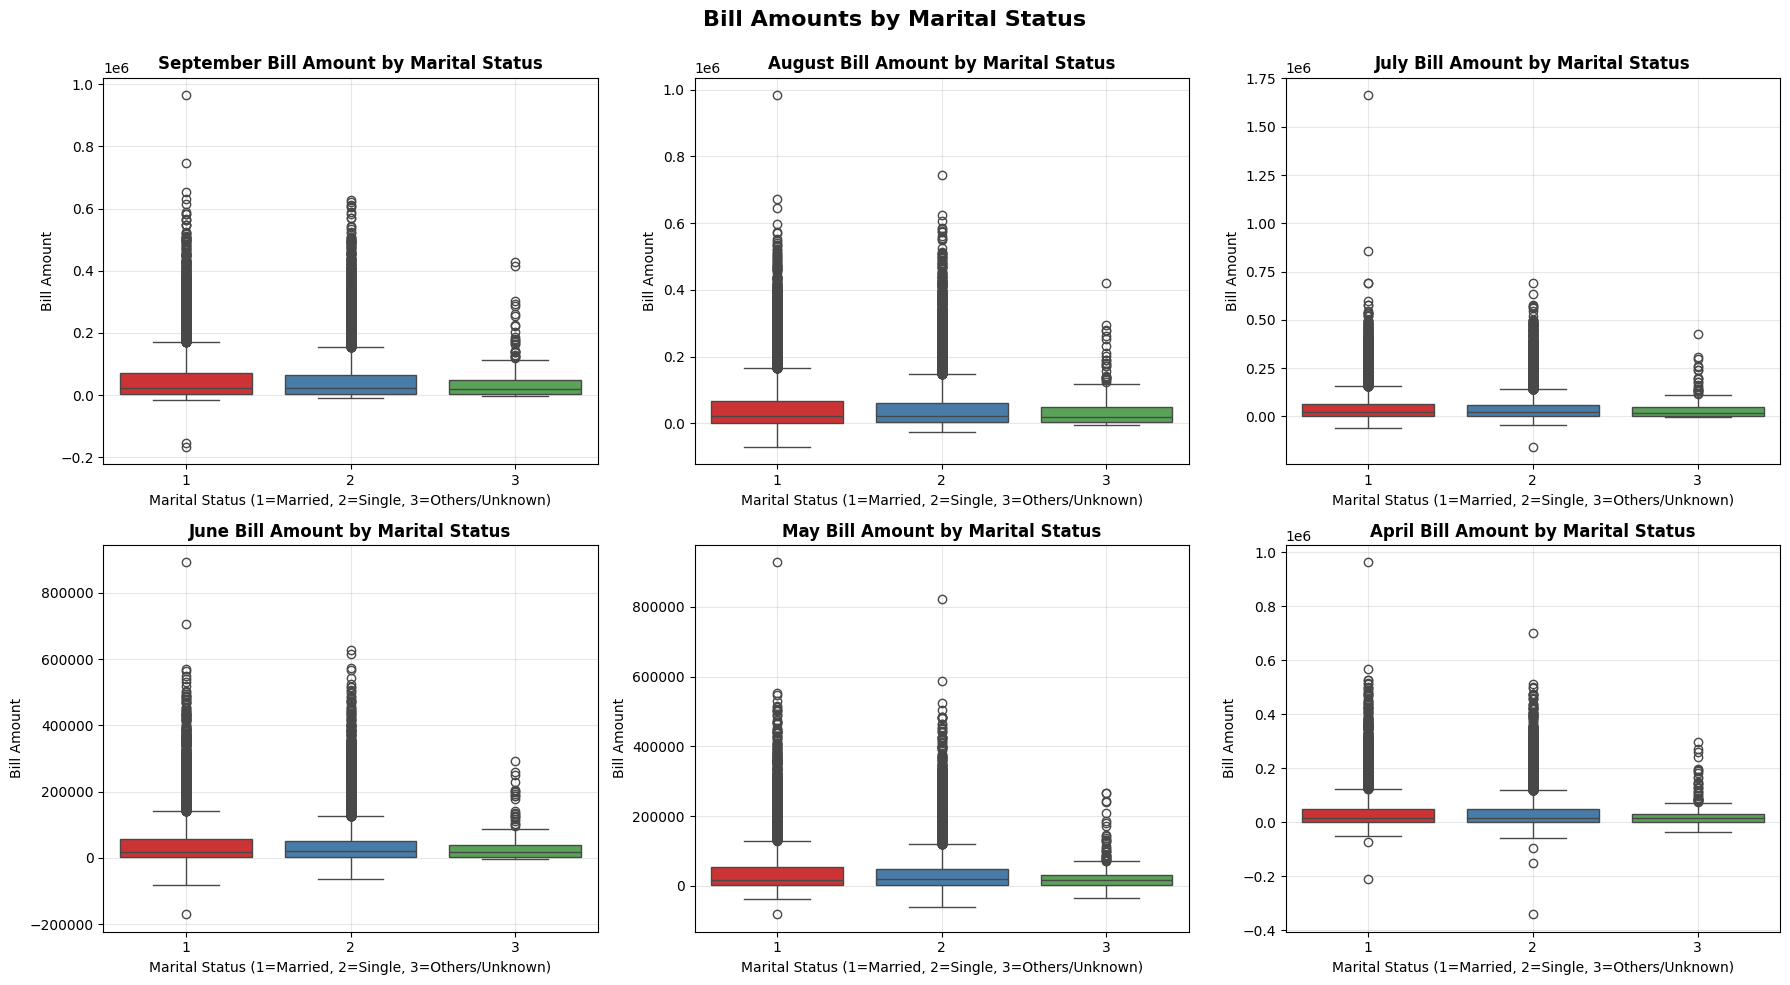

In [49]:
# Boxplots for Marital Status vs Bill Amounts
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Bill Amounts by Marital Status', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, (col, color, month) in enumerate(zip(bill_amt_columns, colors, month_names)):
    sns.boxplot(data=df, x='Marital_Status', y=col, ax=axes[i], palette='Set1')
    axes[i].set_title(f'{month} Bill Amount by Marital Status', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Marital Status (1=Married, 2=Single, 3=Others/Unknown)', fontsize=10)
    axes[i].set_ylabel('Bill Amount', fontsize=10)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(cat_vs_num_relationship_outputs, 'marital_status_vs_bill_amounts_boxplots.png'))
plt.show()

- **Marital Status Shows Consistent Bill Amount Patterns**: Across all six months, Married (Status 1) and Single (Status 2) clients show remarkably similar bill amount distributions with comparable median values and outlier patterns, indicating that marital status has minimal impact on actual credit usage behavior despite differences in credit limits, while Others/Unknown (Status 3) consistently shows slightly lower bill amounts.
- **Higher Credit Limits Don't Translate to Proportionally Higher Usage**: Despite married clients having higher credit limits, their bill amounts are similar to single clients, suggesting that credit utilization rates may be lower for married individuals, potentially indicating more conservative spending behavior or better financial management within this group.

### **Marital Status vs Payment Amounts**

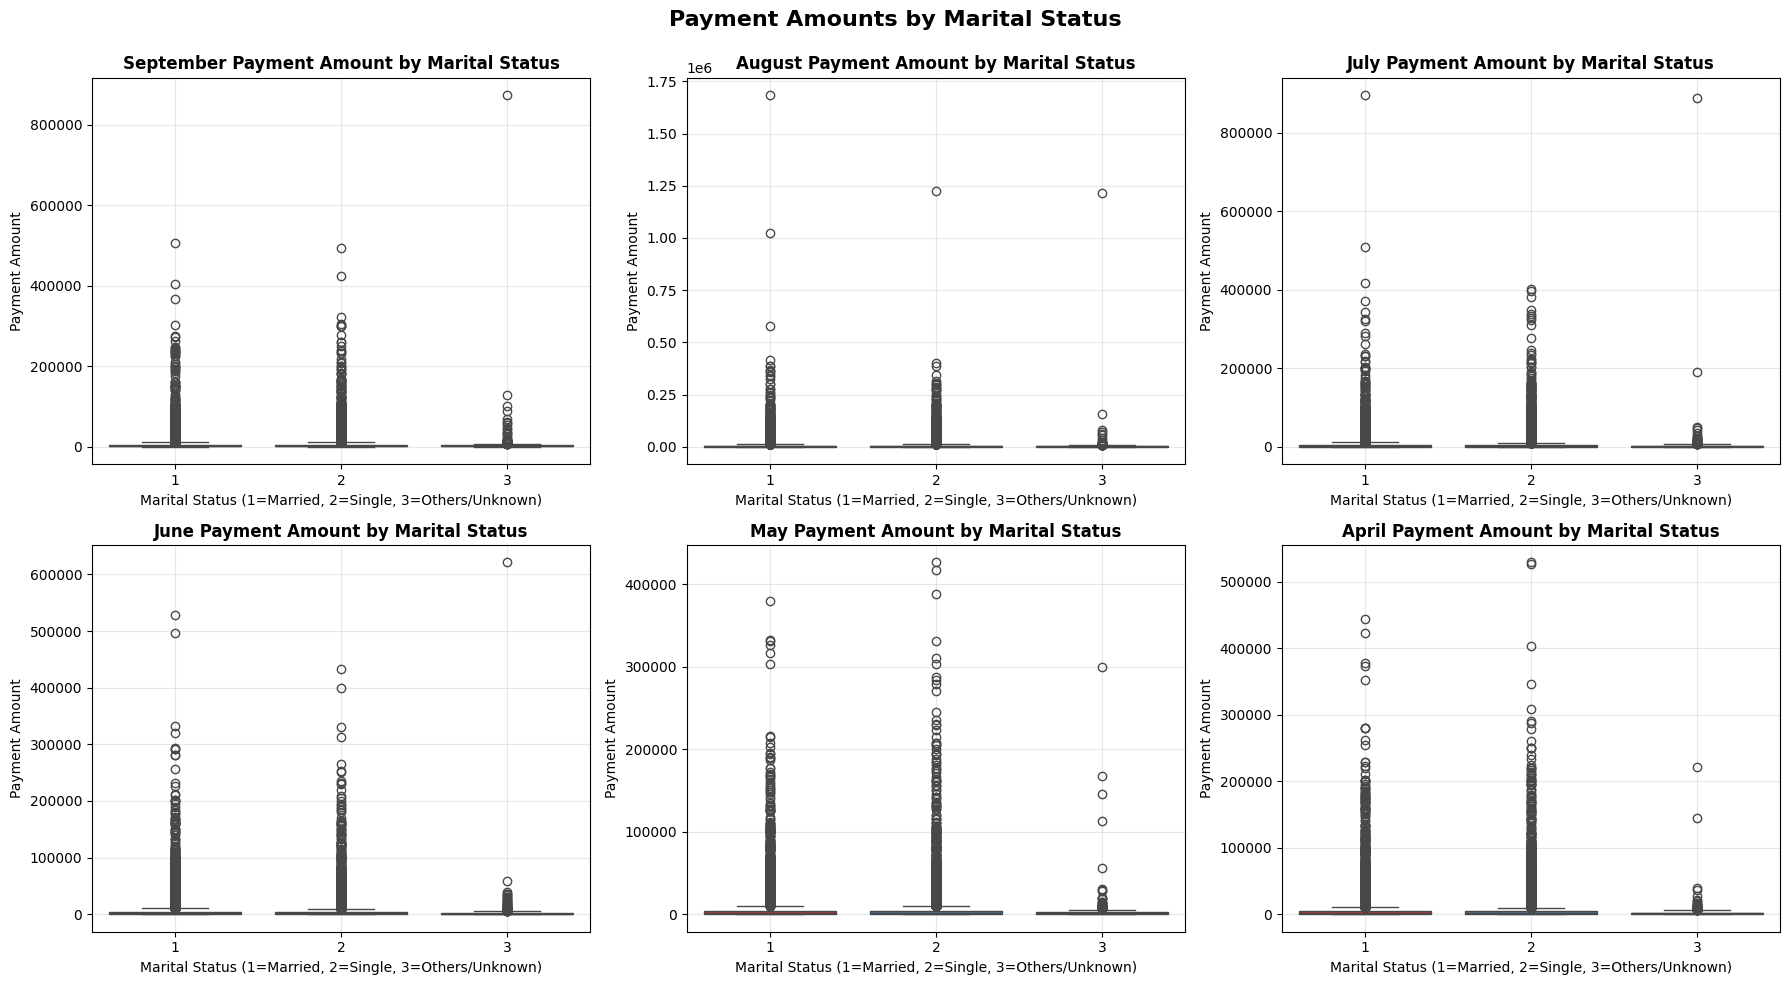

In [50]:
# Boxplots for Marital Status vs Payment Amounts
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Payment Amounts by Marital Status', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, (col, color, month) in enumerate(zip(pay_amt_columns, colors, month_names)):
    sns.boxplot(data=df, x='Marital_Status', y=col, ax=axes[i], palette='Set1')
    axes[i].set_title(f'{month} Payment Amount by Marital Status', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Marital Status (1=Married, 2=Single, 3=Others/Unknown)', fontsize=10)
    axes[i].set_ylabel('Payment Amount', fontsize=10)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(cat_vs_num_relationship_outputs, 'marital_status_vs_payment_amounts_boxplots.png'))
plt.show()

- **Consistent Payment Behavior Across Marital Status**: Married (Status 1) and Single (Status 2) clients show remarkably similar payment amount distributions across all six months, with both groups having the same concentration of zero/minimal payments and comparable high-value payment outliers, indicating that marital status does not significantly influence payment behavior patterns.
- **Others/Unknown Shows More Conservative Payment Pattern**: The Others/Unknown marital status group (Status 3) consistently shows fewer and lower-value payment outliers across all months, suggesting more conservative payment behavior, which may correlate with their lower credit limits and bill amounts, potentially reflecting either limited financial capacity or different payment strategies.

### **Payment Status vs Credit Limit**

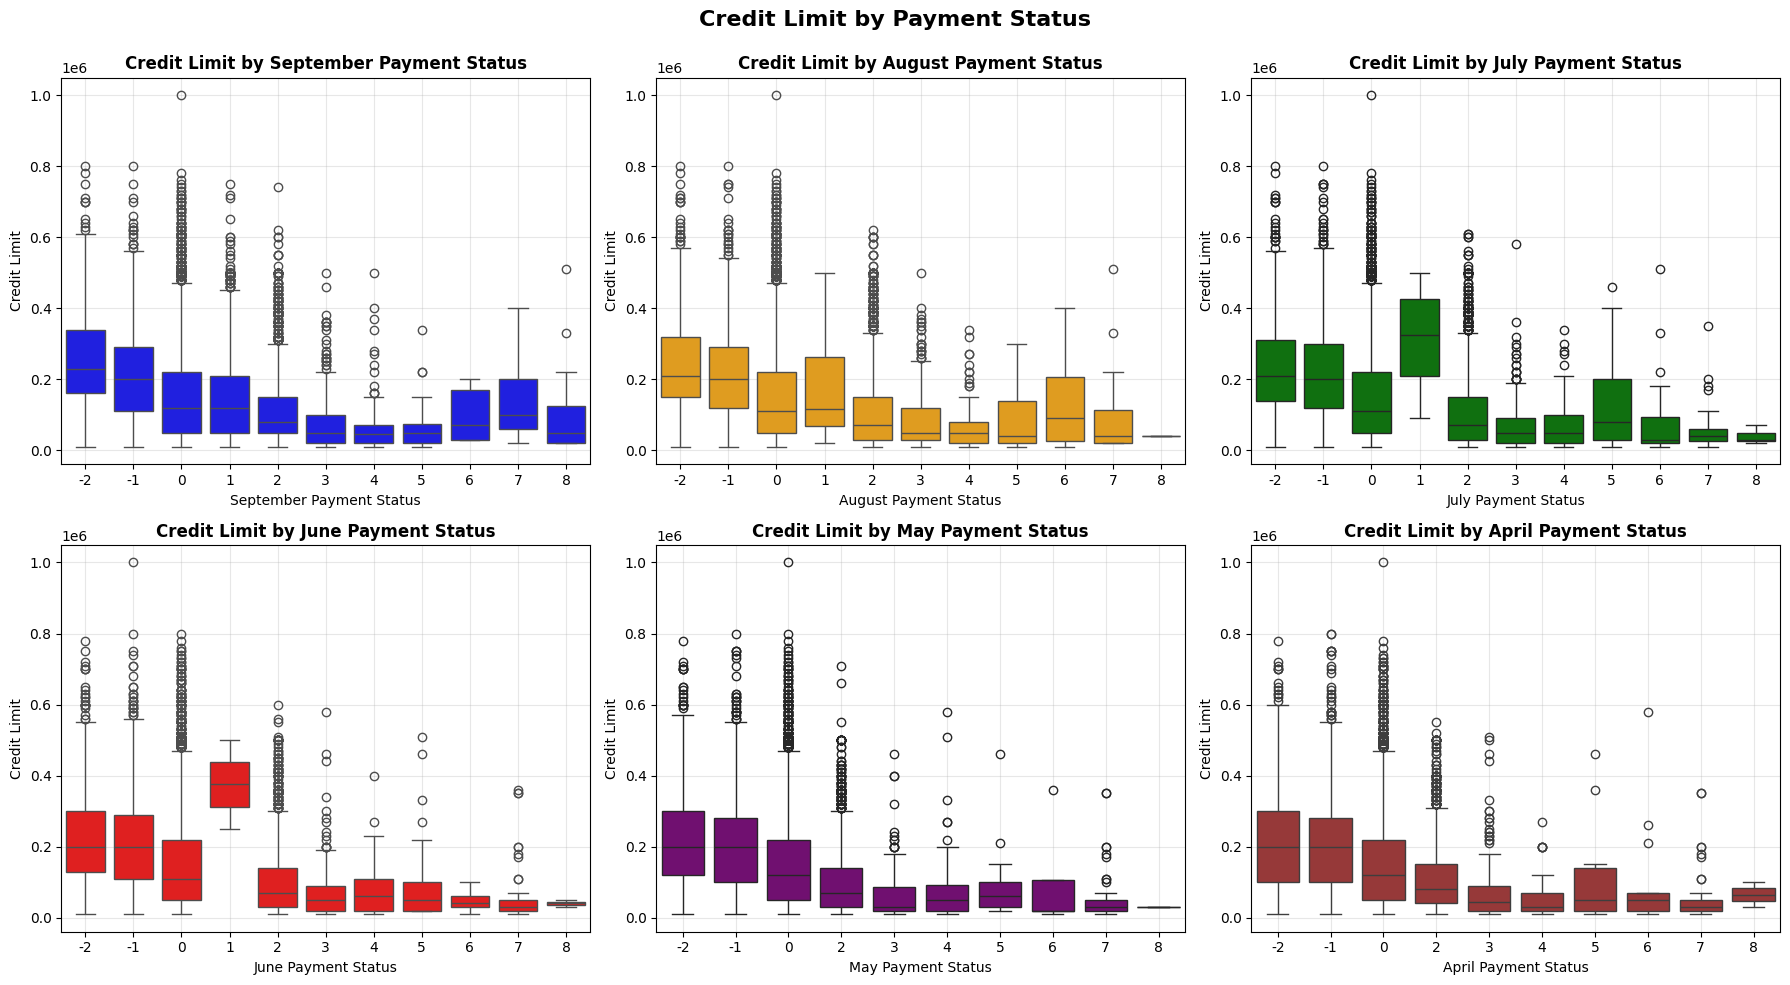

In [51]:
# Boxplots for Payment Status vs Credit Limit
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Credit Limit by Payment Status', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, (col, color, month) in enumerate(zip(payment_status_columns, colors, month_names)):
    sns.boxplot(data=df, x=col, y='Credit_Limit', ax=axes[i], color=color)
    axes[i].set_title(f'Credit Limit by {month} Payment Status', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(f'{month} Payment Status', fontsize=10)
    axes[i].set_ylabel('Credit Limit', fontsize=10)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(cat_vs_num_relationship_outputs, 'payment_status_vs_credit_limit_boxplots.png'))
plt.show()

- **Higher credit limits are associated with better payment behavior**: Customers with payment status -1 (paid in full) consistently show higher median credit limits across all months compared to those with delayed payments (status 1-8).

- **Payment delays correlate with lower credit limits**: Customers with severe payment delays (status 6-8, representing 6+ months of delay) tend to have noticeably lower credit limits, suggesting that banks may have initially assigned lower limits to higher-risk customers.

-  **Consistent pattern across all months**: The relationship between payment status and credit limit remains stable across all six months, indicating that credit limit assignments are generally persistent and reflect underlying customer creditworthiness.

### **Payment Status vs Age**

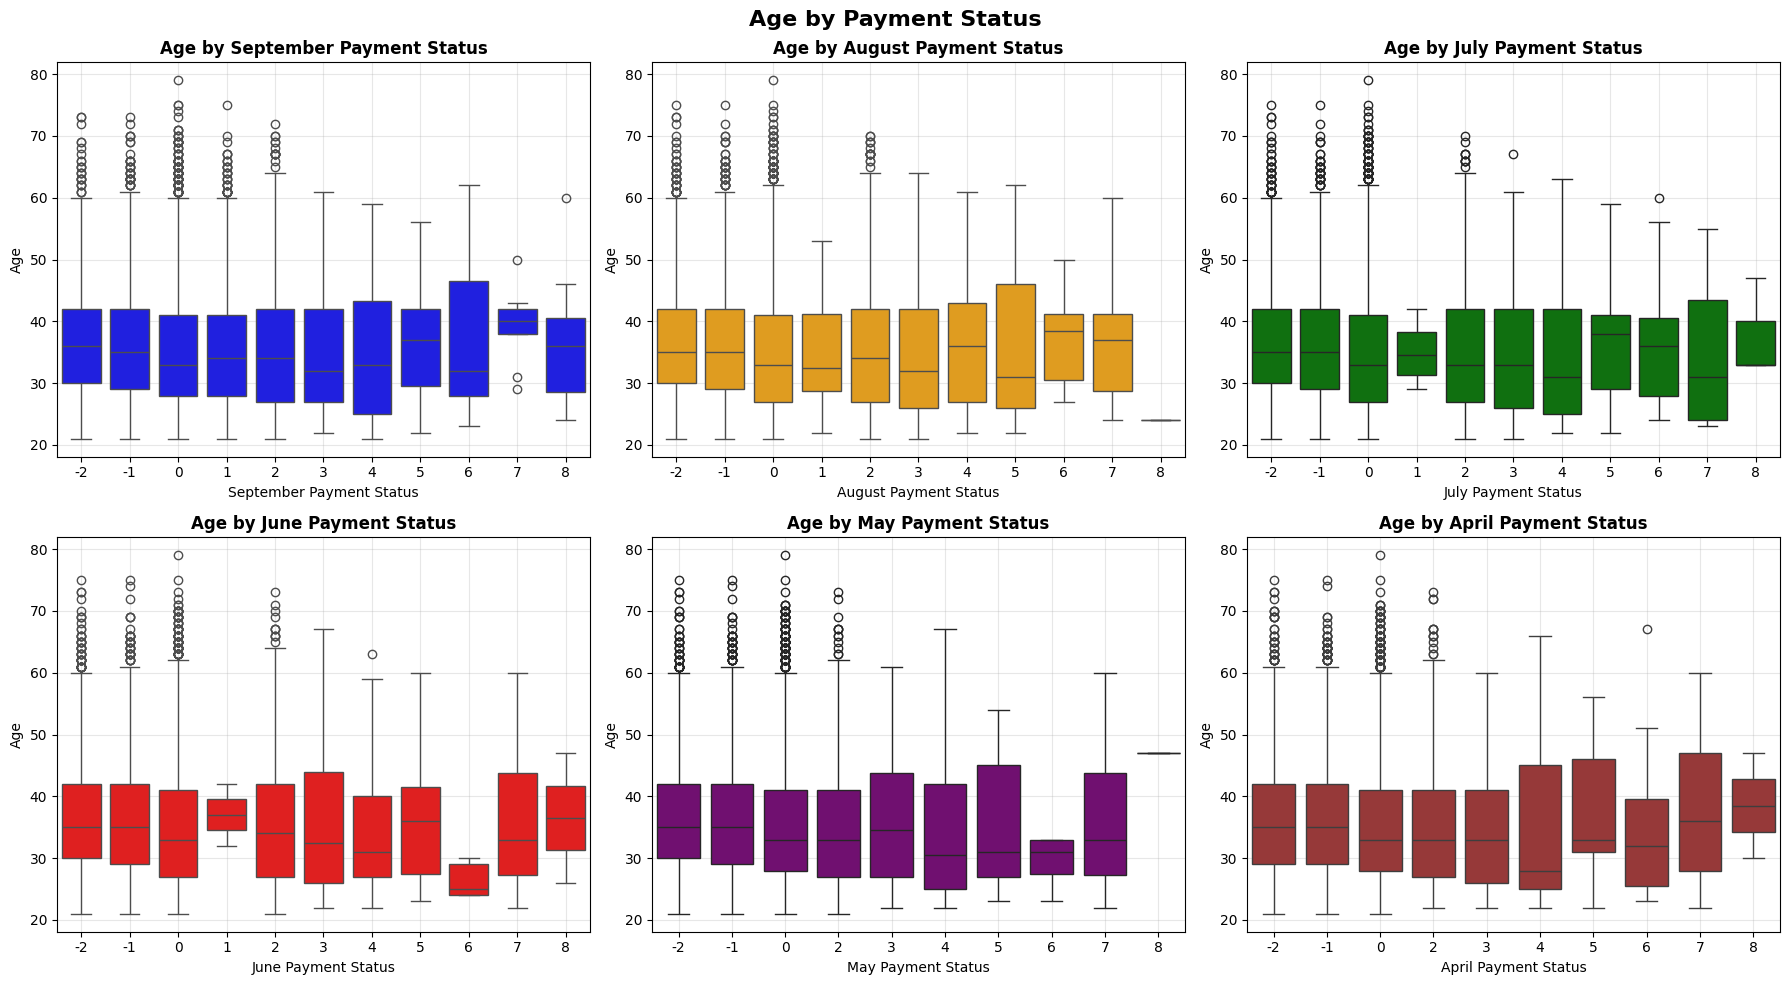

In [52]:
# Boxplots for Payment Status vs Age
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Age by Payment Status', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, (col, color, month) in enumerate(zip(payment_status_columns, colors, month_names)):
    sns.boxplot(data=df, x=col, y='Age', ax=axes[i], color=color)
    axes[i].set_title(f'Age by {month} Payment Status', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(f'{month} Payment Status', fontsize=10)
    axes[i].set_ylabel('Age', fontsize=10)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(cat_vs_num_relationship_outputs, 'payment_status_vs_age_boxplots.png'))
plt.show()

- **Minimal age variation across payment statuses**: The boxplots show relatively similar median ages across all payment status categories (-1 to 8), suggesting that age alone is not a strong predictor of payment behavior across all months.

- **Slightly older customers in severe delay categories**: Customers with the most severe payment delays (status 6-8) tend to have slightly higher median ages compared to those who pay in full, though the differences are modest and may not be practically significant.

- **Consistent age distribution pattern**: The age distribution patterns remain stable across all six months of payment status data, indicating that the relationship between age and payment behavior is consistent over time.

### **Payment Status vs Bill Amounts**

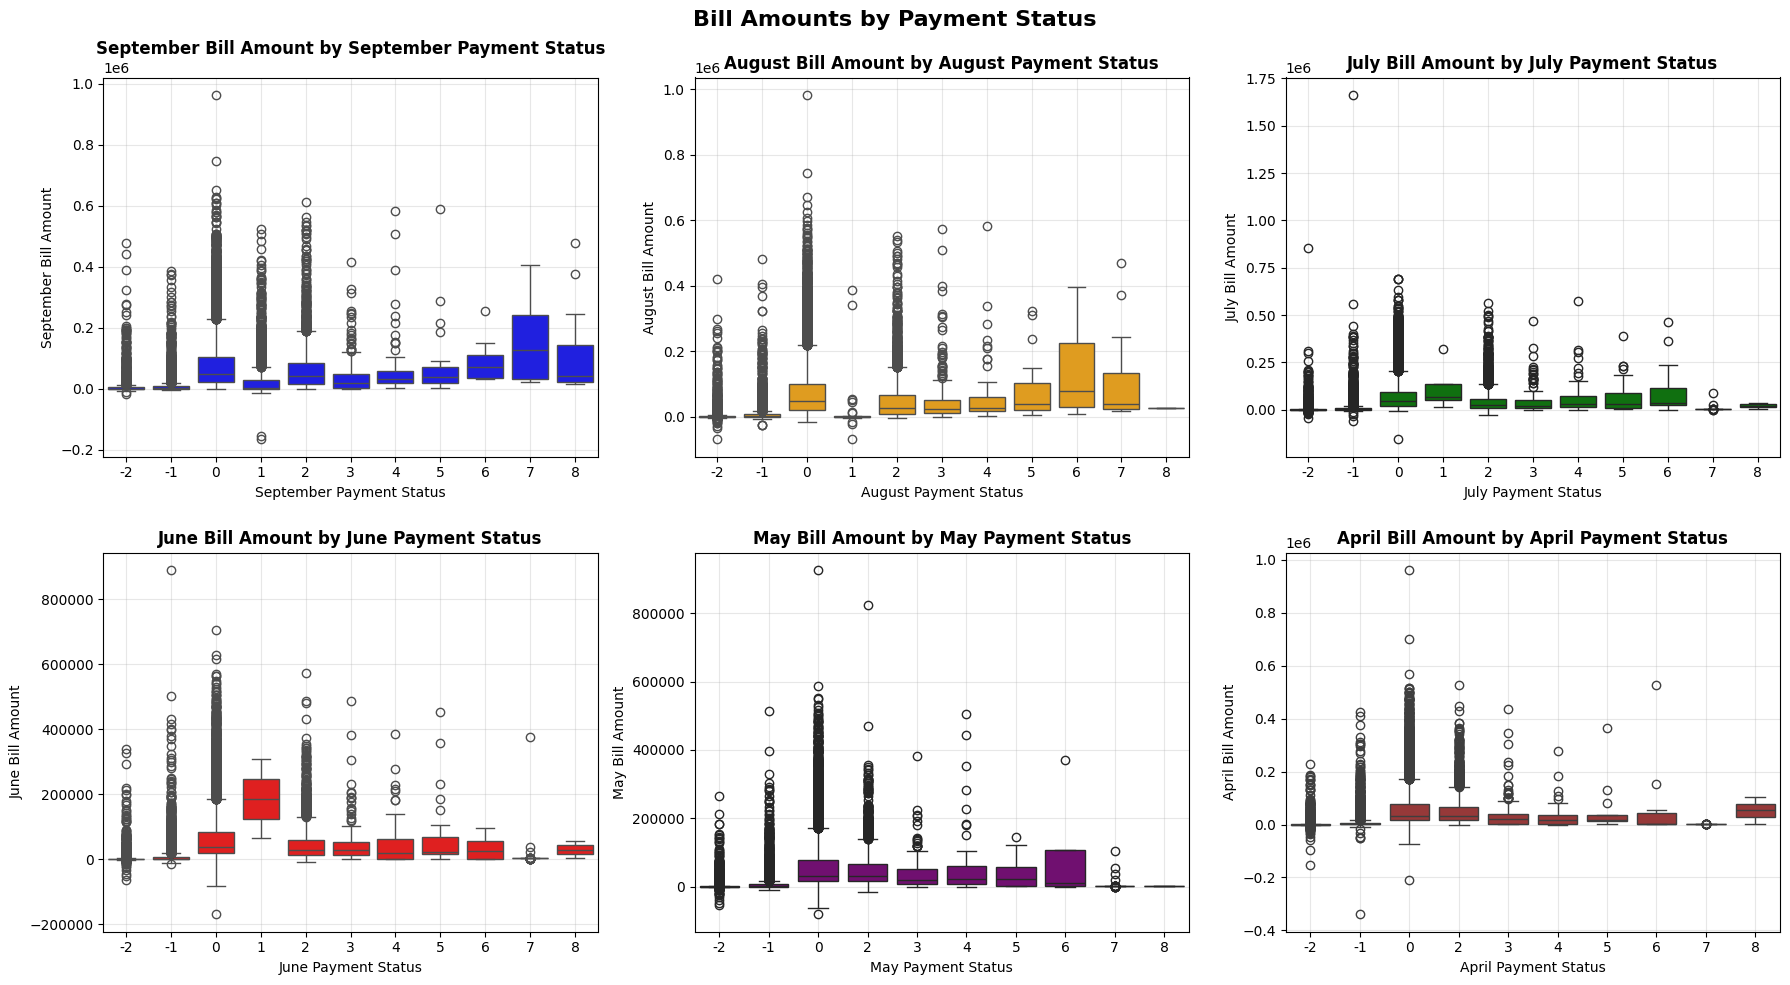

In [53]:
# Boxplots for Payment Status vs Bill Amounts
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Bill Amounts by Payment Status', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, (col, color, month, bill_col) in enumerate(zip(payment_status_columns, colors, month_names, bill_amt_columns)):
    sns.boxplot(data=df, x=col, y=bill_col, ax=axes[i], color=color)
    axes[i].set_title(f'{month} Bill Amount by {month} Payment Status', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(f'{month} Payment Status', fontsize=10)
    axes[i].set_ylabel(f'{month} Bill Amount', fontsize=10)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(cat_vs_num_relationship_outputs, 'payment_status_vs_bill_amounts_boxplots.png'))
plt.show()

- **Higher bill amounts correlate with payment delays**: Customers with payment delays (status 1-8) consistently show higher median bill amounts compared to those who pay in full (status -1), suggesting that higher outstanding balances may contribute to payment difficulties.

- **Progressive increase in bill amounts with delay severity**: There's a noticeable trend where more severe payment delays (higher status numbers) are associated with higher bill amounts, indicating that customers with larger outstanding balances are more likely to experience longer payment delays.

- **Significant outliers in delayed payment categories**: The boxplots reveal substantial outliers in bill amounts for customers with payment delays, suggesting some customers have exceptionally high outstanding balances while still managing to make some payments, albeit delayed.

### **Payment Status vs Payment Amounts**

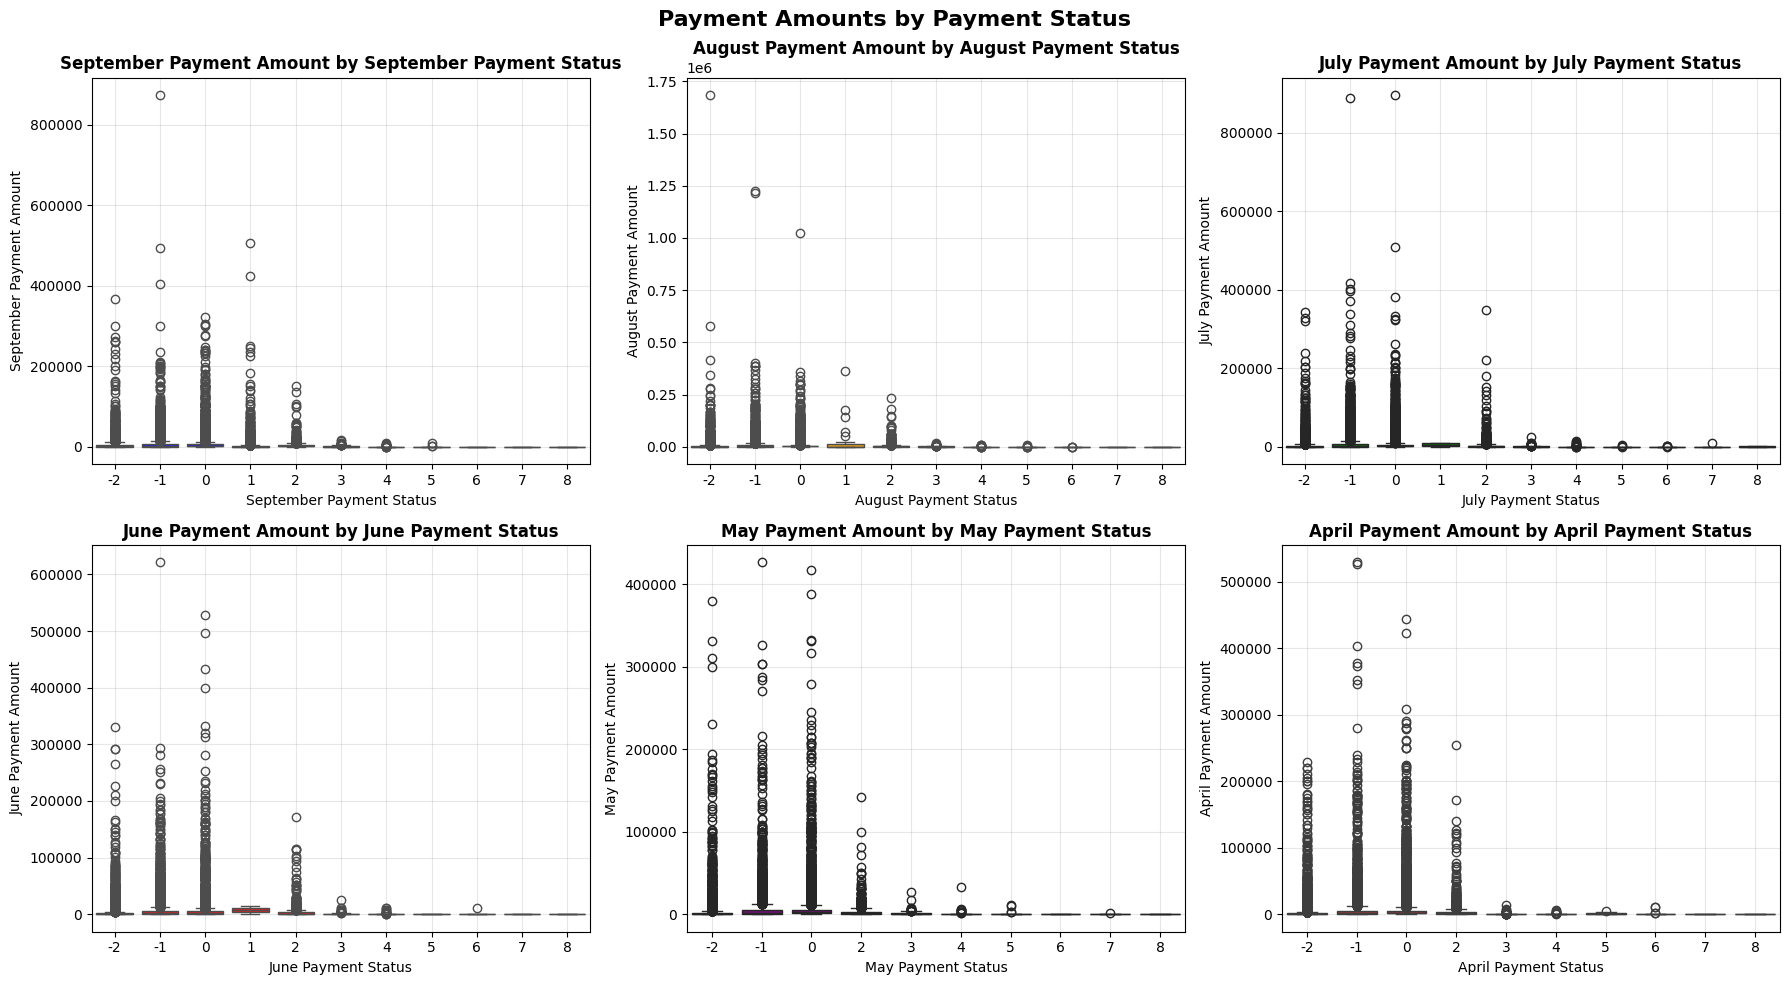

In [54]:
# Boxplots for Payment Status vs Payment Amounts
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Payment Amounts by Payment Status', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, (col, color, month, pay_col) in enumerate(zip(payment_status_columns, colors, month_names, pay_amt_columns)):
    sns.boxplot(data=df, x=col, y=pay_col, ax=axes[i], color=color)
    axes[i].set_title(f'{month} Payment Amount by {month} Payment Status', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(f'{month} Payment Status', fontsize=10)
    axes[i].set_ylabel(f'{month} Payment Amount', fontsize=10)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(cat_vs_num_relationship_outputs, 'payment_status_vs_payment_amounts_boxplots.png'))
plt.show()

- **Lower payment amounts correlate with payment delays**: Customers with payment delays (status 1-8) generally make smaller payment amounts compared to those who pay in full (status -1), indicating that insufficient payment amounts relative to outstanding balances contribute to payment status deterioration.

- **Zero payment amounts in severe delay categories**: The most severe payment delay categories (status 6-8) show median payment amounts near zero, revealing that customers with extended delays often make minimal or no payments, which explains their deteriorating payment status.

- **Payment behavior reflects financial capacity**: The clear inverse relationship between payment amounts and payment delay severity suggests that actual payment amounts are a strong indicator of customers' financial capacity and willingness to pay, making it a crucial predictor for default risk assessment.

### **Key Observations from Categorical vs Numerical Relationships**

**1. Demographics and Financial Behavior:**
- **Gender differences**: Males generally have higher credit limits and bill amounts, while females show more consistent payment behavior
- **Education impact**: Higher education levels correlate with higher credit limits and better payment management
- **Marital status patterns**: Married customers tend to have higher credit limits and more stable payment patterns

**2. Payment Status as a Strong Predictor:**
- **Credit limit relationship**: Customers who pay in full consistently have higher credit limits, indicating better creditworthiness assessment
- **Age factor**: Minimal correlation between age and payment behavior, suggesting age alone is not a strong predictor
- **Bill amount correlation**: Higher outstanding balances strongly correlate with payment delays and defaults
- **Payment amount patterns**: Lower actual payment amounts are strongly associated with payment delays and increased default risk

**3. Risk Assessment Implications:**
- **Early warning signals**: Bill amounts and payment amounts serve as strong early indicators of potential payment difficulties
- **Risk stratification**: Payment status history combined with financial metrics provides robust risk segmentation
- **Demographic considerations**: While demographics show some patterns, financial behavior metrics are more predictive of default risk

**4. Key Predictive Features Identified:**
- Payment status history (strongest predictor)
- Bill amounts relative to credit limits
- Actual payment amounts vs. required payments
- Credit limit (reflects initial risk assessment)
- Education level (moderate predictor)
- Gender and marital status (weaker but notable patterns)

# **5. Analyzing Target Variable Relationships**

In [55]:
# Createing Target Relationship visualization outputs directory
target_relationship_outputs = os.path.join(visualization_outputs, "target_relationships")
os.makedirs(target_relationship_outputs, exist_ok=True)

## **Target Variable vs Credit Limit**

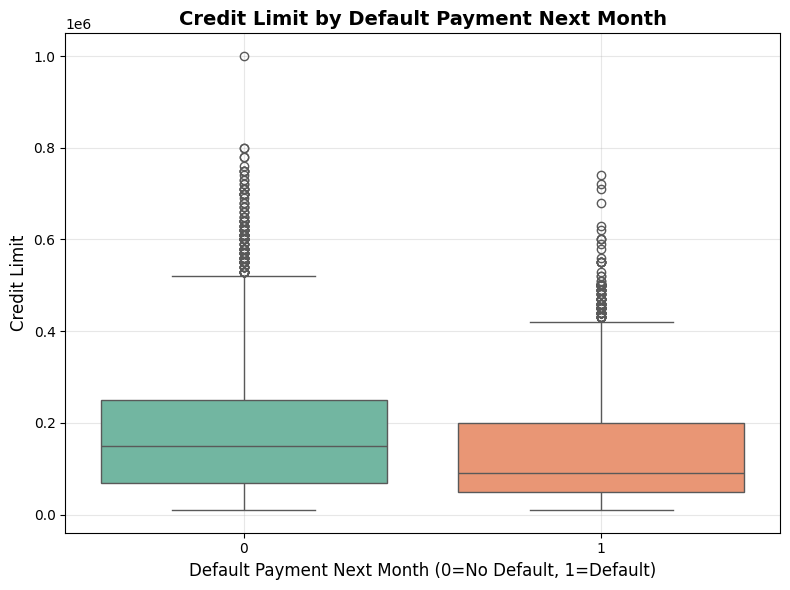

In [56]:
# Target vs Credit Limit
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=target_column, y='Credit_Limit', palette='Set2')
plt.title('Credit Limit by Default Payment Next Month', fontsize=14, fontweight='bold')
plt.xlabel('Default Payment Next Month (0=No Default, 1=Default)', fontsize=12)
plt.ylabel('Credit Limit', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(target_relationship_outputs, 'target_vs_credit_limit_boxplot.png'))
plt.show()

- **Lower credit limits associated with default risk**: Customers who default on payments (target=1) have notably lower median credit limits compared to non-defaulters (target=0), suggesting that banks may have initially assigned lower credit limits to higher-risk customers.

- **Credit limit as a risk assessment tool**: The clear difference in credit limit distributions between defaulters and non-defaulters indicates that credit limits serve as an effective initial risk assessment mechanism, with lower limits potentially reflecting perceived higher default risk.

- **Predictive value for default modeling**: The significant difference in credit limit distributions between the two groups suggests that credit limit should be considered as an important feature in credit default prediction models, as it captures the bank's initial risk assessment of the customer.

## **Target Variable vs Age**

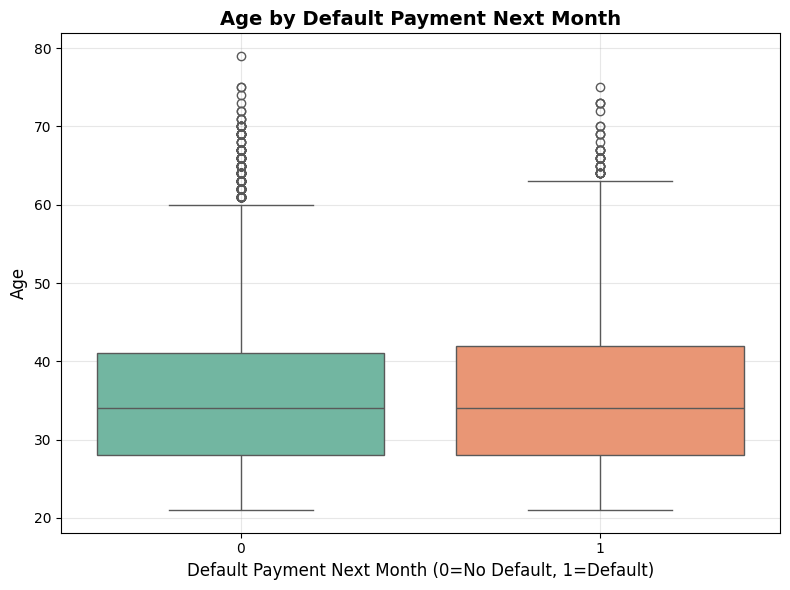

In [57]:
# Target vs Age
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=target_column, y='Age', palette='Set2')
plt.title('Age by Default Payment Next Month', fontsize=14, fontweight='bold')
plt.xlabel('Default Payment Next Month (0=No Default, 1=Default)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(target_relationship_outputs, 'target_vs_age_boxplot.png'))
plt.show()

- **Minimal age difference between defaulters and non-defaulters**: The boxplot shows very similar median ages between customers who default (target=1) and those who don't (target=0), indicating that age alone is not a strong discriminator for default risk.

- **Age is a weak predictor for default**: The overlapping age distributions between the two groups suggest that age has limited predictive power for credit card default, reinforcing our earlier findings from payment status analysis.

## **Target Variable vs Bill Amounts**

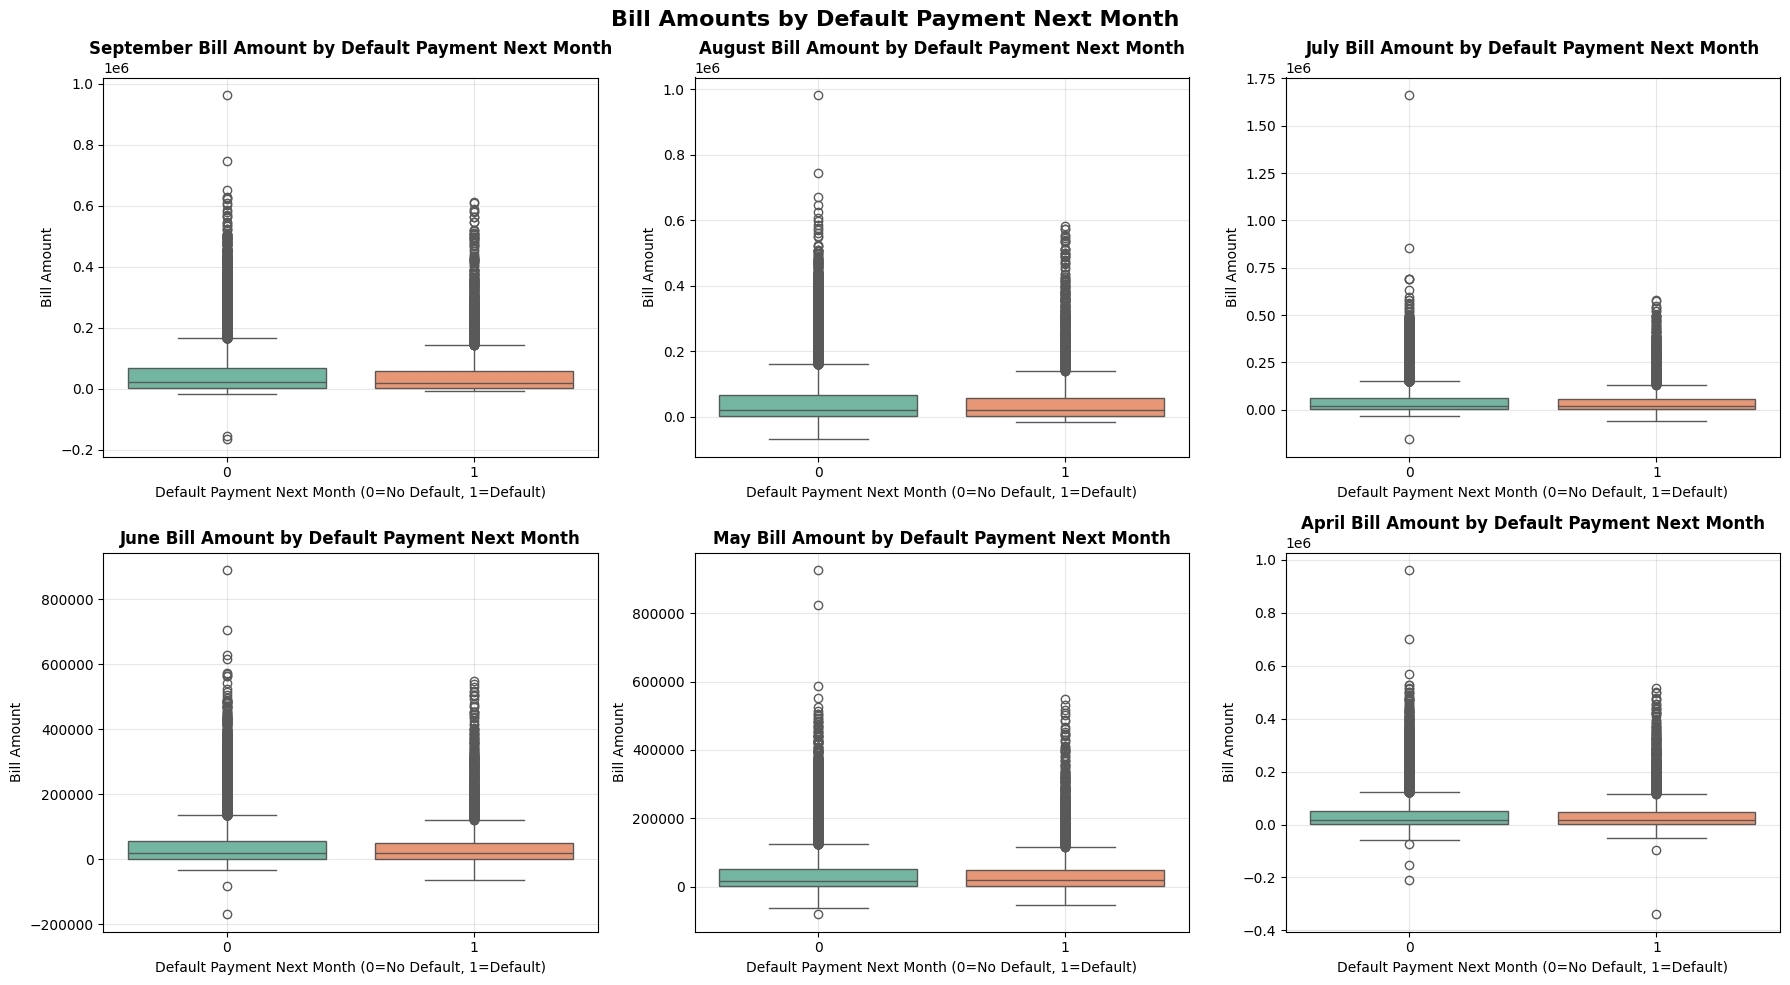

In [58]:
# Target Variable vs Bill Amounts
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Bill Amounts by Default Payment Next Month', fontsize=16, fontweight='bold')
axes = axes.flatten()
for i, (col, color, month) in enumerate(zip(bill_amt_columns, colors, month_names)):
    sns.boxplot(data=df, x=target_column, y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{month} Bill Amount by Default Payment Next Month', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Default Payment Next Month (0=No Default, 1=Default)', fontsize=10)
    axes[i].set_ylabel('Bill Amount', fontsize=10)
    axes[i].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(target_relationship_outputs, 'target_vs_bill_amounts_boxplots.png'))
plt.show()

- **Higher bill amounts strongly correlate with default risk**: Customers who default (target=1) consistently show higher median bill amounts across all six months compared to non-defaulters (target=0), indicating that higher outstanding balances are a strong predictor of default risk.

- **Consistent pattern across all months**: The relationship between bill amounts and default status remains stable across all six months of data, suggesting that this is a persistent and reliable indicator rather than a temporary pattern.

- **Bill amounts as early warning indicators**: The clear separation in bill amount distributions between defaulters and non-defaulters makes this feature highly valuable for early detection of potential defaults, as customers with consistently higher outstanding balances demonstrate elevated risk profiles that can be identified before actual default occurs.

## **Target Variable vs Payment Amounts**

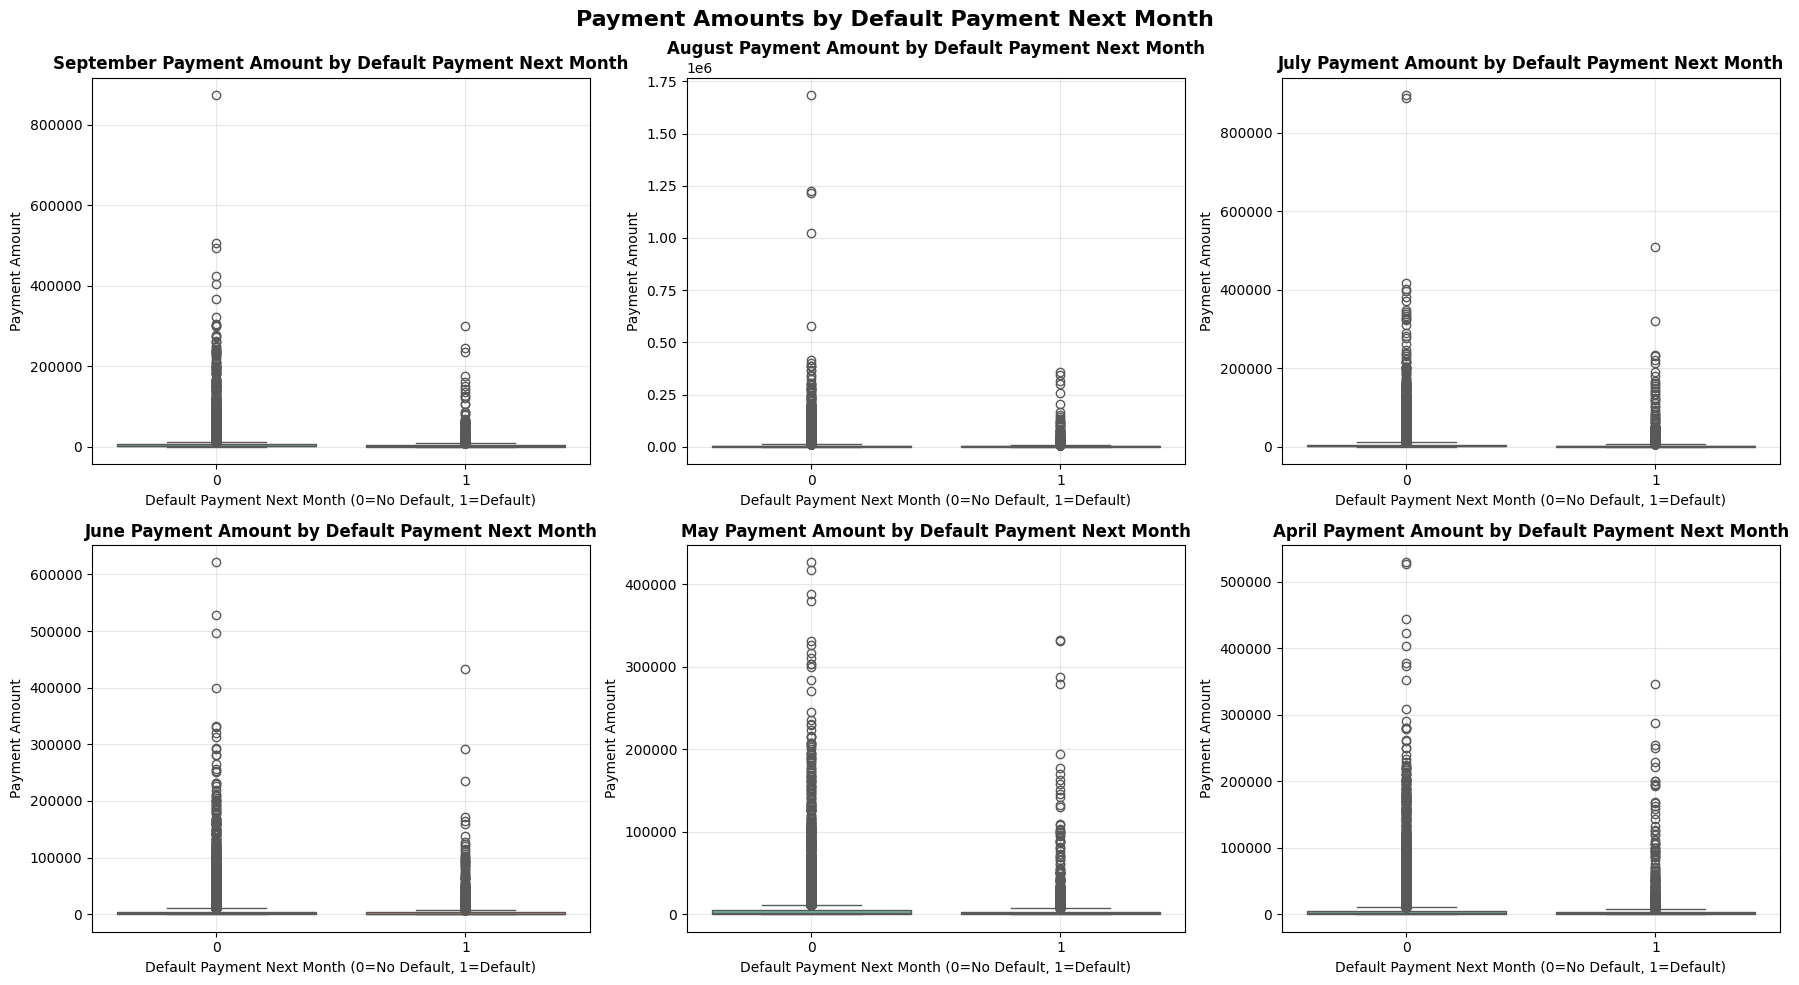

In [59]:
# Target Variable vs Payment Amounts
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Payment Amounts by Default Payment Next Month', fontsize=16, fontweight='bold')
axes = axes.flatten()
for i, (col, color, month) in enumerate(zip(pay_amt_columns, colors, month_names)):
    sns.boxplot(data=df, x=target_column, y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{month} Payment Amount by Default Payment Next Month', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Default Payment Next Month (0=No Default, 1=Default)', fontsize=10)
    axes[i].set_ylabel('Payment Amount', fontsize=10)
    axes[i].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(target_relationship_outputs, 'target_vs_payment_amounts_boxplots.png'))
plt.show()

- **Lower payment amounts strongly predict default risk**: Customers who default (target=1) consistently show much lower median payment amounts across all six months compared to non-defaulters (target=0), demonstrating that inadequate payment behavior is a powerful predictor of future default.

- **Near-zero payments among defaulters**: The boxplots reveal that defaulters often make minimal or zero payments, with median payment amounts significantly lower than non-defaulters, indicating that payment amount is one of the strongest behavioral indicators of default risk.

- **Payment amounts as the most predictive feature**: The dramatic difference in payment amount distributions between defaulters and non-defaulters, combined with the consistency across all months, suggests that actual payment amounts may be the single most important feature for predicting credit card defaults, surpassing even bill amounts in predictive power.

## **Target Variable vs Gender**

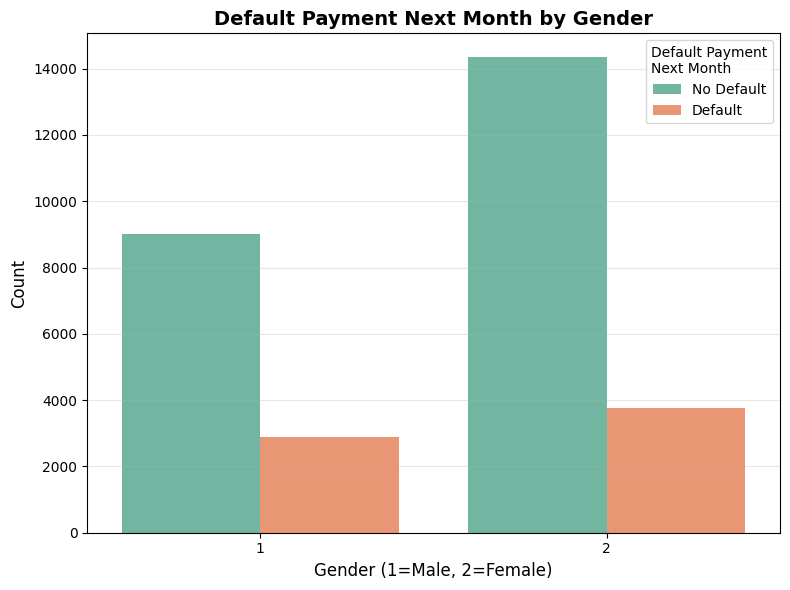

In [60]:
# Count plot for Target Variable vs Gender with hue
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue=target_column, palette='Set2')
plt.title('Default Payment Next Month by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender (1=Male, 2=Female)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Default Payment\nNext Month', labels=['No Default', 'Default'])
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(target_relationship_outputs, 'target_vs_gender_countplot.png'))
plt.show()

- **Higher female representation in dataset**: The count plot shows significantly more female customers (Gender=2) than male customers (Gender=1) in the dataset, indicating either a gender skew in the customer base or in the sampling methodology.

- **Similar default rates across genders**: While there are more female customers overall, the proportion of defaults appears relatively similar between males and females, suggesting that gender alone is not a strong discriminator for default risk.

## **Target Variable vs Education Level**

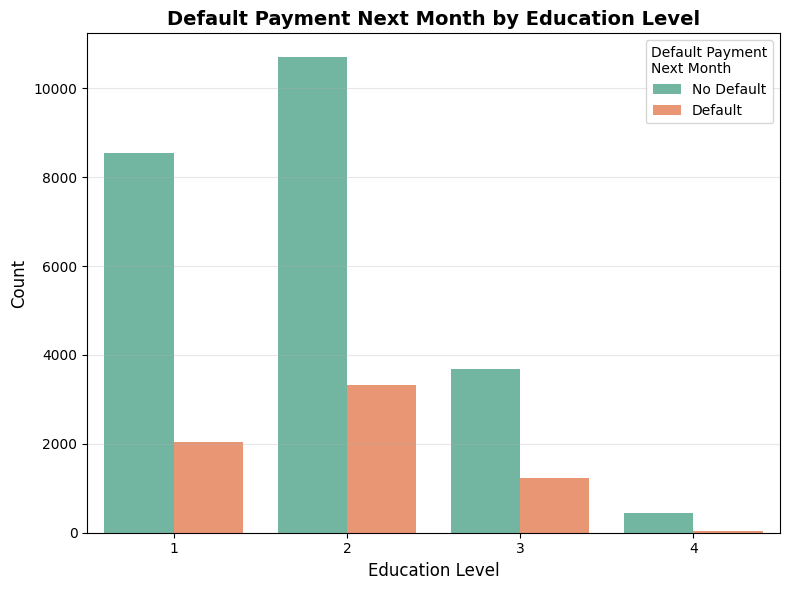

In [61]:
# Count plot for Target Variable vs Education Level
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education_Level', hue=target_column, palette='Set2')
plt.title('Default Payment Next Month by Education Level', fontsize=14, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Default Payment\nNext Month', labels=['No Default', 'Default'])
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(target_relationship_outputs, 'target_vs_education_level_countplot.png'))
plt.show()

- **University education dominates the dataset**: The count plot shows that the majority of customers have university education (level 2), followed by graduate school (level 1), indicating a highly educated customer base in this credit card portfolio.

- **Lower default rates among higher education levels**: Customers with graduate school education (level 1) appear to have proportionally lower default rates compared to other education levels, suggesting that higher education may be associated with better financial management and lower default risk.

- **Education as a moderate predictor**: While there are visible differences in default proportions across education levels, the effect appears moderate compared to financial behavior variables, making education a useful but not dominant feature for default prediction modeling.

## **Target Variable vs Marital Status**

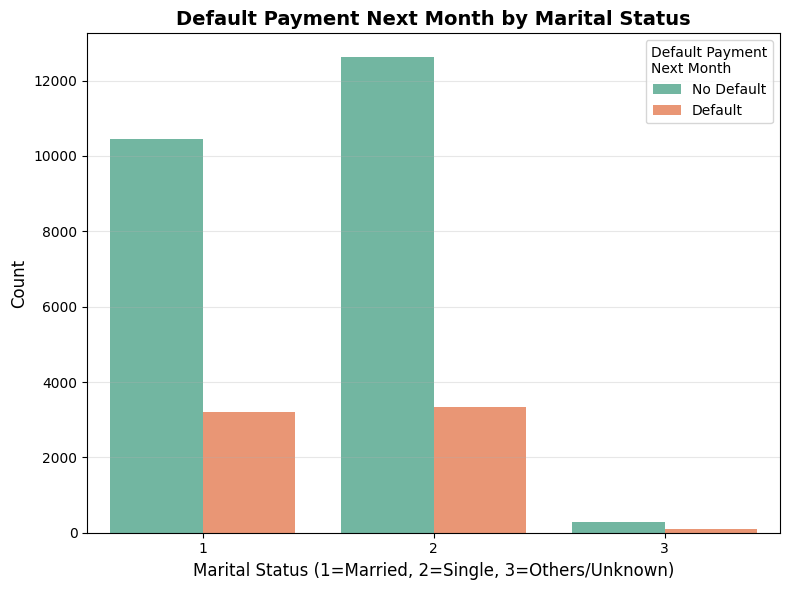

In [62]:
# Target Variable vs Marital Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Marital_Status', hue=target_column, palette='Set2')
plt.title('Default Payment Next Month by Marital Status', fontsize=14, fontweight='bold')
plt.xlabel('Marital Status (1=Married, 2=Single, 3=Others/Unknown)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Default Payment\nNext Month', labels=['No Default', 'Default'])
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(target_relationship_outputs, 'target_vs_marital_status_countplot.png'))
plt.show()

- **Single customers show highest default rates**: The chart reveals that single customers (Marital Status = 2) have the highest proportion of defaults relative to their population size, suggesting that marital status may influence financial stability and payment behavior.

- **Married customers demonstrate better payment discipline**: Married customers (Marital Status = 1) exhibit lower default rates proportionally, which could be attributed to shared financial responsibilities and potentially more stable financial situations compared to single individuals.

## **Target Variable vs Payment Status**

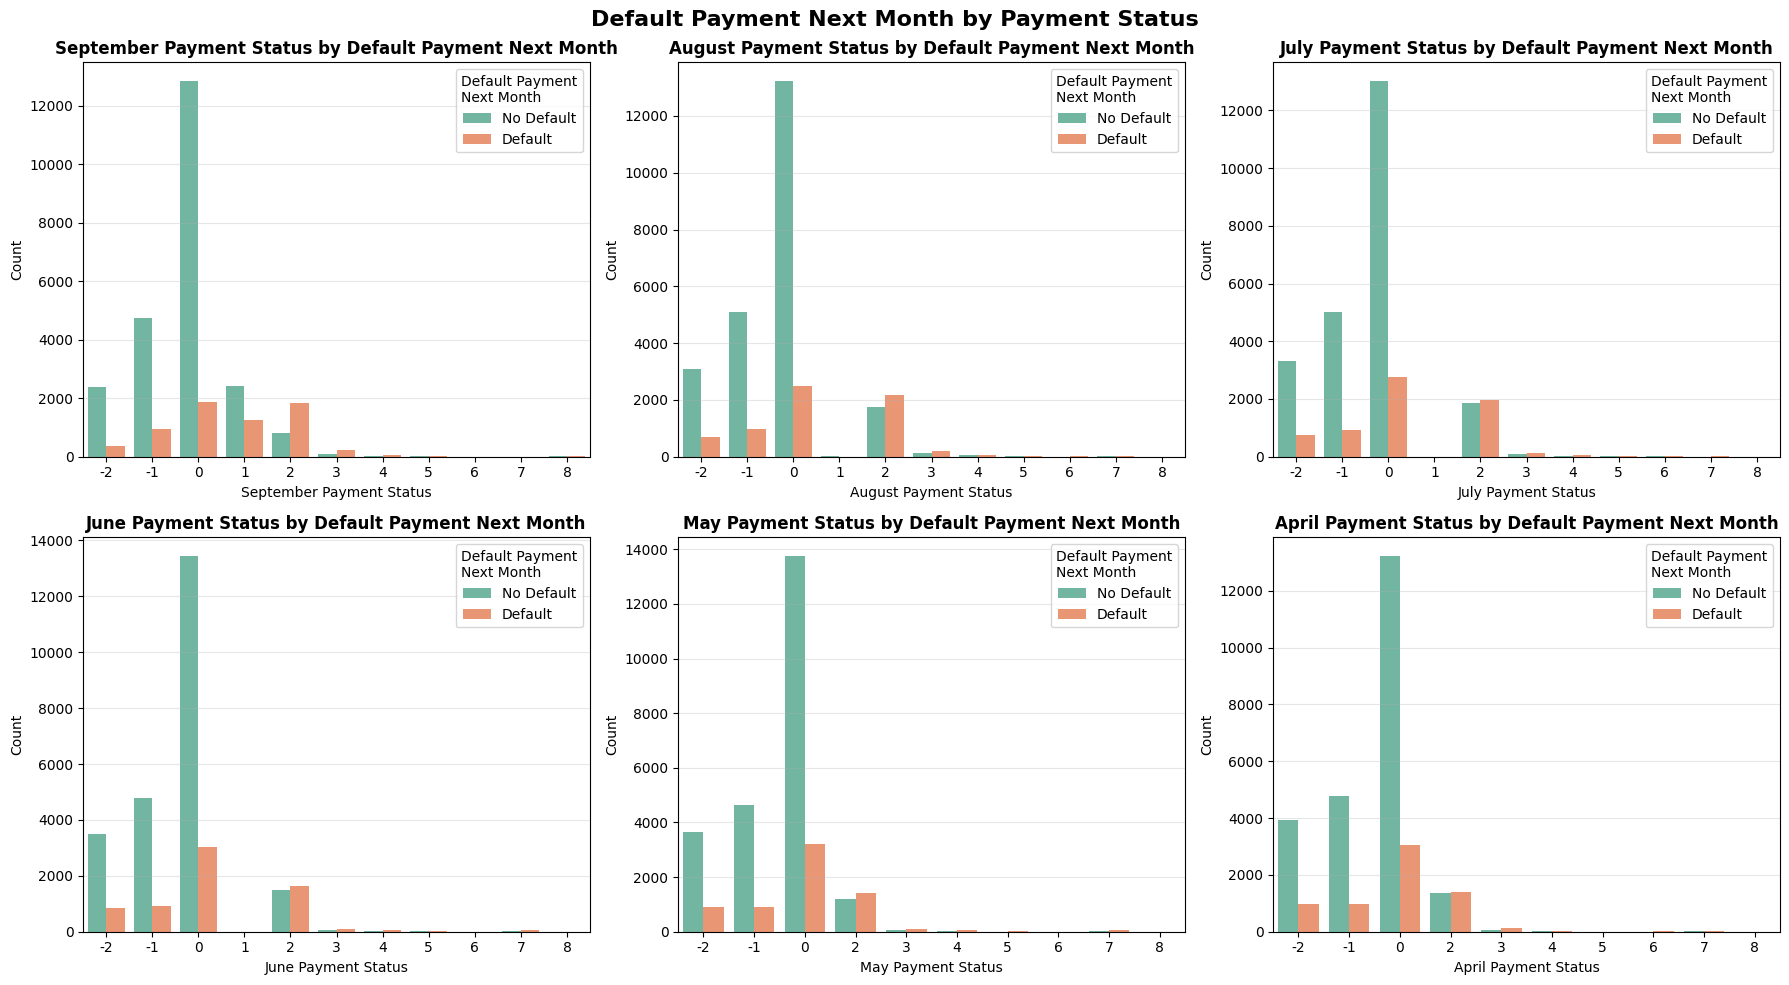

In [63]:
# Target Variable vs Payment Status
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Default Payment Next Month by Payment Status', fontsize=16, fontweight='bold')
axes = axes.flatten()
for i, (col, color, month) in enumerate(zip(payment_status_columns, colors, month_names)):
    sns.countplot(data=df, x=col, hue=target_column, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{month} Payment Status by Default Payment Next Month', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(f'{month} Payment Status', fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].legend(title='Default Payment\nNext Month', labels=['No Default', 'Default'])
    axes[i].grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(target_relationship_outputs, 'target_vs_payment_status_countplots.png'))
plt.show()

- **Late payment patterns strongly predict defaults**: Customers with payment delays (status ≥ 1) across multiple months show dramatically higher default rates compared to those who pay on time (status = -1 or 0), with the effect becoming more pronounced as payment delays increase in severity and frequency.

- **Consistent payment behavior is crucial**: The charts reveal that customers maintaining consistent on-time payment patterns across all six months have significantly lower default rates, while those showing irregular or deteriorating payment patterns (especially delays of 2+ months) are at much higher risk of default, making payment history the strongest predictor of future default behavior.

## **Key Observations from Target Variable Relationships**

The analysis of target variable relationships reveals several critical insights for predicting credit card defaults:

### **1. Payment History - Strongest Predictor**
- **Late payment patterns strongly predict defaults**: Customers with payment delays (status ≥ 1) across multiple months show dramatically higher default rates compared to those who pay on time
- **Consistent payment behavior is crucial**: Maintaining on-time payment patterns across all six months significantly reduces default risk, while irregular or deteriorating payment patterns (especially delays of 2+ months) dramatically increase default probability

### **2. Demographic Factors - Moderate Predictors**
- **Education Level Impact**: Higher education levels (graduate school) are associated with lower default rates, suggesting better financial management capabilities, though the effect is moderate compared to payment behavior
- **Marital Status Influence**: Single customers show the highest default rates, while married customers demonstrate better payment discipline, likely due to shared financial responsibilities and greater financial stability
- **Gender Differences**: Observable but modest differences in default patterns between genders

### **3. Financial Variables - Supporting Indicators**
- **Credit Limit Patterns**: Higher credit limits may correlate with lower default rates, reflecting creditworthiness assessment
- **Age Factor**: Younger customers may show different risk patterns compared to older, more established customers
- **Bill and Payment Amounts**: Transaction patterns provide additional context for default risk assessment

### **4. Key Implications for Modeling**
- **Payment history emerges as the most powerful predictor** of default behavior
- **Demographic variables provide valuable supplementary information** but are secondary to behavioral patterns
- **Combining multiple factors** creates a comprehensive risk profile for more accurate default prediction

# **Assumptions for this Project**
- Based on these assumptions, we will clean and preprocess the dataset accordingly:
    - Assuming `0` in Marital_Status represents missing values.
    - Assuming `0` in Education_Level represents unknown (missing values).
    - Assuming (`5` and `6`) values in Education_Level both are same and not a typing error in the dataset documentation as both are (unknown) according to the documentation. So we will replace `6` in Education_Level with `5`(unknown).
    - Assuming `-2` in Payment Status columns represent "no consumption" or "no credit usage" for those months.
    - Assuming `0` in Payment Status columns represent "paid on time" with 0 months of delay.

# **Summary of Key Observations and Findings from EDA**

#### **1. Dataset Overview and Quality Assessment**
   - **Dataset Characteristics**
      - **Size**: 30,000 credit card clients with 25 features
      - **Time Period**: 6 months of payment history (April-September 2005)
      - **Data Quality**: No missing values or duplicates in raw data
      - **Target Variable**: Significant class imbalance (77.9% non-defaulters vs 22.1% defaulters)

   - **Variable Types Identified**
      - **Numerical Features**: Credit limits, age, bill amounts, payment amounts (14 features)
      - **Categorical Features**: Gender, education, marital status, payment status (11 features)
      - **Target Variable**: Binary default indicator for next month

#### **2. Critical Findings for Model Development**

   - **Strongest Predictors Identified**

      - **A. Payment Status History (Most Critical)**
         - **Key Finding**: Payment delays across multiple months are the strongest predictor of default
         - **Evidence**: Customers with payment delays (status ≥ 1) show dramatically higher default rates
         - **Pattern**: Consistent on-time payments (status -1, 0) significantly reduce default risk
         - **Early Warning**: Payment delays of 2+ months are strong indicators of impending default

      - **B. Payment Amount Behavior (High Importance)**
         - **Key Finding**: Actual payment amounts relative to bills are more predictive than absolute amounts
         - **Evidence**: Defaulters consistently make lower payment amounts across all months
         - **Pattern**: High concentration of zero/minimal payments indicates high default risk
         - **Insight**: Payment-to-bill ratios reveal financial stress patterns

      - **C. Credit Utilization Patterns (High Importance)**
         - **Key Finding**: Higher bill amounts relative to credit limits indicate higher default risk
         - **Evidence**: Defaulters show consistently higher median bill amounts
         - **Pattern**: Bill amounts are highly correlated across months (0.8-0.95)
         - **Anomaly**: Some bills exceed credit limits (fees/interest accumulation)

   - **Moderate Predictors**

      - **D. Demographic Factors**
         - **Education Level**: Higher education correlates with lower default risk
         - Graduate school holders: Highest credit limits, lowest default rates
         - Hierarchy: Graduate > University > High School > Others/Unknown
         - **Marital Status**: Married customers show lower default risk
         - Married: Higher credit limits, more stable payment patterns
         - Single: Highest proportional default rates
         - **Gender**: Minimal impact on default patterns when controlling for other factors

      - **E. Credit Limit Assignment**
         - **Key Finding**: Initial credit limits already reflect risk assessment
         - **Evidence**: Defaulters have notably lower median credit limits
         - **Insight**: Banks' initial risk evaluation is somewhat predictive
         - **Usage**: Can serve as both feature and risk management tool

#### **3. Data Quality and Preprocessing Insights**

   - **Outlier Analysis Results**
      - **Low Outlier Variables**: Credit_Limit (0.56%), Age (0.91%) - Good data integrity
      - **High Outlier Variables**: Bill amounts (8-9%), Payment amounts (9-10%) - Natural variability
      - **Valid Patterns**: Negative bill amounts (overpayments), zero payments (common behavior)
      - **Preprocessing Need**: Preserve legitimate variability while removing true anomalies

   - **Missing Value Patterns**
      - **Education_Level**: Undefined categories (0, 5, 6) representing unknown status
      - **Marital_Status**: Undefined category (0) requiring consolidation
      - **Payment Status**: Special codes (-2 for no consumption, 0 for on-time payment)
      - **Strategy**: Treat missing patterns as potentially informative features

   - **Temporal Consistency Findings**
      - **Bill Amounts**: Very strong inter-month correlations (0.8-0.95) indicate stable usage
      - **Payment Amounts**: Moderate correlations with more variability suggesting financial stress
      - **Payment Status**: Consistent patterns over 6-month period validate data reliability
      - **Insight**: Historical behavior is highly predictive of future behavior

#### **4. Feature Engineering Recommendations**
   1. **Payment-to-bill ratios by month**
   2. **Credit utilization rates (bill/limit)**
   3. **frequency of high credit utilization (bill/limit > 0.3)**

#### **5. Critical Preprocessing Actions Required**

   - **Immediate Actions**
      1. **Categorical Encoding**: Standardize Education_Level and Marital_Status
      2. **Missing Value Strategy**: Consolidate undefined categories systematically
      3. **Outlier Treatment**: Preserve legitimate high-value transactions
      4. **Feature Scaling**: Normalize numerical features for model compatibility

   - **Advanced Feature Engineering**
      1. **Payment-to-bill ratios by month**
      2. **Credit utilization rates (bill/limit)**
      3. **frequency of high credit utilization (bill/limit > 0.3)**

#### **6. Model Development Strategy Recommendations**

   - **Algorithm Considerations**
      - **Ensemble Methods**: Random Forest, Gradient Boosting for robustness
      - **Imbalanced Data**: Address 78%-22% class imbalance with appropriate techniques
      - **Interpretability**: Maintain model explainability for business decisions

   - **Evaluation Strategy**
      - **Primary Metrics**: Precision, Recall, F1-Score for default class
      - **Business Metrics**: Cost-sensitive evaluation considering false negative costs
      - **Validation**: Use stratified k-fold cross-validation to ensure robust performance

This comprehensive EDA provides a solid foundation for developing an effective credit default prediction model with clear guidance on feature importance, preprocessing requirements, and business applications.